# Imports and Initialization

In [1]:
import cftime
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import dask
import pickle

import netCDF4

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pylab as plb
import matplotlib.image as imag

# from cbrain.imports import *
# from cbrain.cam_constants import *
# from cbrain.utils import *
# from cbrain.layers import *
# from cbrain.data_generator import DataGenerator
# from cbrain.climate_invariant import *
# from cbrain.climate_invariant_utils import *

import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_memory_growth(physical_devices[1], True)
tf.config.experimental.set_memory_growth(physical_devices[2], True)

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from tensorflow import math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# import tensorflow_probability as tfp

2023-06-02 11:51:17.904027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fz = 15
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

In [3]:
path_folder = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/June2022_CI_Runs/'
path_repeat = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/June2022_CI_Runs/specificNN_m4k_repeat//spehum_version_0_False/'

In [4]:
path_Jerry_2022_08_04 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_04_Jerry_Runs/'

In [6]:
path_Jerry_rmodel0 = path_Jerry_2022_08_04+'/m4k/relative/rmodel0/AndKua_aqua_rmodel0.cam2.h1.0000-0'
path_Jerry_rmodel1 = path_Jerry_2022_08_04+'/m4k/relative/rmodel1/AndKua_aqua_rmodel1.cam2.h1.0000-0'

In [7]:
path_Jerry_2022_07_27 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_07_29_Jerry_Runs/'
pathJ01_0 = path_Jerry_2022_07_27+'model0/AndKua_aqua_model0.cam2.h1.0000-0'
pathJ01_1 = path_Jerry_2022_07_27+'model1/AndKua_aqua_model1.cam2.h1.0000-0'

In [8]:
path_Jerry_2022_08_01 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_01_Jerry_Runs/'
pathJL2_0 = path_Jerry_2022_08_01+'model6/AndKua_aqua_model6.cam2.h1.000'

In [9]:
path_Jerry_2022_08_03 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_03_Jerry_Runs/'
pathJL2_1 = path_Jerry_2022_08_03+'model7/AndKua_aqua_model7.cam2.h1.000'

In [10]:
path_Jerry_2022_08_12 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/'
# Automatically create list of paths from subdirectories in path_Jerry_2022_08_12
# Find all subdirectories in path_Jerry_2022_08_12
path_list = []
for root, dirs, files in os.walk(path_Jerry_2022_08_12):
    for name in dirs:
        path_list.append(os.path.join(root, name))
# Eliminate all the path names containing 'keras_matrices'
path_list = [path for path in path_list if 'keras_matrices' not in path]
# Eliminate all entries of the list that do not contain 'model'
path_list = [path for path in path_list if 'model' in path]

In [28]:
# Print the entire list path_list in one column
# with open('path_list.txt', 'w') as f:
#     for item in path_list:
#         print("%s\n" % item)

Load run as `xarray` Dataset

In [10]:
JRH_0run = xr.open_mfdataset(path_Jerry_rmodel0+'*',combine='nested',concat_dim='time')

OSError: no files to open

In [11]:
JRH_1run = xr.open_mfdataset(path_Jerry_rmodel1+'*',combine='nested',concat_dim='time')

OSError: no files to open

In [12]:
JL2_0run = xr.open_mfdataset(pathJL2_0+'*.nc',combine='nested',concat_dim='time')

OSError: no files to open

In [13]:
JL2_1run = xr.open_mfdataset(pathJL2_1+'*.nc',combine='nested',concat_dim='time')

OSError: no files to open

In [14]:
J01_0run = xr.open_mfdataset(pathJ01_0+'*.nc',combine='nested',concat_dim='time')
J01_1run = xr.open_mfdataset(pathJ01_1+'*.nc',combine='nested',concat_dim='time')

OSError: no files to open

In [5]:
Sungrun = xr.open_mfdataset(path_repeat+'AndKua_aqua_spe0False_.cam2.h1.0000-01-0*.nc',
                            combine='nested',concat_dim='time')

In [ ]:
SPRef_m4k = xr.open_mfdataset(path_folder+'sp'+'_'+'m4k'+'/A*h1*.nc',
                          combine='nested',concat_dim='time')

In [6]:

SPRef_0k = xr.open_mfdataset(path_folder+'sp'+'_'+'0k'+'/A*h1*.nc',
                          combine='nested',concat_dim='time')
SPRef_p4k = xr.open_mfdataset(path_folder+'sp'+'_'+'p4k'+'/A*h1*.nc',
                          combine='nested',concat_dim='time')

In [73]:
SPtraj_m4k = {}; SPtraj_0k = {}; SPtraj_p4k = {}

SPtraj_m4k['Q_trajectory'] = np.mean(SPRef_m4k['NNQBP'].values-MeanClim_m4k['Q'],axis=(1,2,3))
SPtraj_m4k['T_trajectory'] = np.mean(SPRef_m4k['NNTBP'].values-MeanClim_m4k['T'],axis=(1,2,3))
SPtraj_m4k['Q_profile'] = np.mean(SPRef_m4k['NNQBP'].values-MeanClim_m4k['Q'],axis=(0,2,3))
SPtraj_m4k['T_profile'] = np.mean(SPRef_m4k['NNTBP'].values-MeanClim_m4k['T'],axis=(0,2,3))

SPtraj_0k['Q_trajectory'] = np.mean(SPRef_0k['NNQBP'].values-MeanClim_m4k['Q'],axis=(1,2,3))
SPtraj_0k['T_trajectory'] = np.mean(SPRef_0k['NNTBP'].values-MeanClim_m4k['T'],axis=(1,2,3))
SPtraj_0k['Q_profile'] = np.mean(SPRef_0k['NNQBP'].values-MeanClim_m4k['Q'],axis=(0,2,3))
SPtraj_0k['T_profile'] = np.mean(SPRef_0k['NNTBP'].values-MeanClim_m4k['T'],axis=(0,2,3))

SPtraj_p4k['Q_trajectory'] = np.mean(SPRef_p4k['NNQBP'].values-MeanClim_m4k['Q'],axis=(1,2,3))
SPtraj_p4k['T_trajectory'] = np.mean(SPRef_p4k['NNTBP'].values-MeanClim_m4k['T'],axis=(1,2,3))
SPtraj_p4k['Q_profile'] = np.mean(SPRef_p4k['NNQBP'].values-MeanClim_m4k['Q'],axis=(0,2,3))
SPtraj_p4k['T_profile'] = np.mean(SPRef_p4k['NNTBP'].values-MeanClim_m4k['T'],axis=(0,2,3))

Text(0, 0.5, 'Specific humidity bias (kg/kg)')

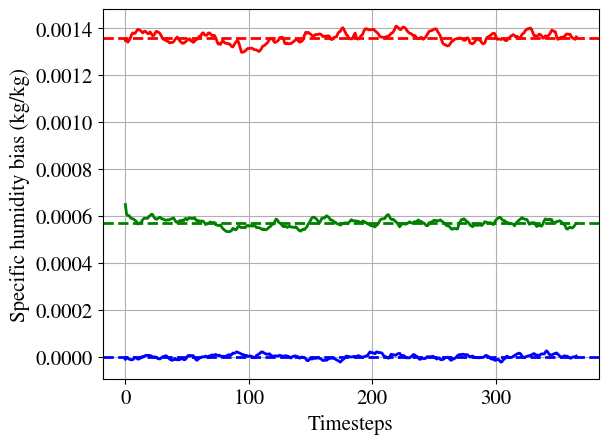

In [80]:
plt.plot(SPtraj_m4k['Q_trajectory'],'b')
plt.axhline(y=np.mean(SPtraj_m4k['Q_trajectory']),linestyle='--',color='b')
plt.plot(SPtraj_0k['Q_trajectory'],'g')
plt.axhline(y=np.mean(SPtraj_0k['Q_trajectory']),linestyle='--',color='g')
plt.plot(SPtraj_p4k['Q_trajectory'],'r')
plt.axhline(y=np.mean(SPtraj_p4k['Q_trajectory']),linestyle='--',color='r')
plt.grid()

plt.xlabel('Timesteps')
plt.ylabel('Specific humidity bias (kg/kg)')

Text(0, 0.5, 'Temperature bias (kg/kg)')

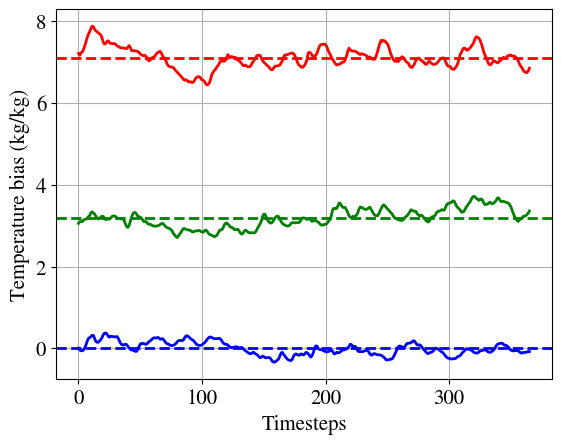

In [82]:
plt.plot(SPtraj_m4k['T_trajectory'],'b')
plt.axhline(y=np.mean(SPtraj_m4k['T_trajectory']),linestyle='--',color='b')
plt.plot(SPtraj_0k['T_trajectory'],'g')
plt.axhline(y=np.mean(SPtraj_0k['T_trajectory']),linestyle='--',color='g')
plt.plot(SPtraj_p4k['T_trajectory'],'r')
plt.axhline(y=np.mean(SPtraj_p4k['T_trajectory']),linestyle='--',color='r')
plt.grid()

plt.xlabel('Timesteps')
plt.ylabel('Temperature bias (kg/kg)')

In [124]:
path_list[0]

'/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_1'

In [130]:
# Create a simname_list from path_list that only keeps the characters after the last /
# Then keep the characters after Jerry_Runs/ and before the next /
simname_list = []
for path in path_list:
    simname_list.append(path.split('Jerry_Runs/')[-1].split('/')[0]+'_'+path.split('/')[-1])

In [131]:
simname_list

['p4k_rmodel10_1',
 'p4k_rmodel10_2',
 'p4k_rmodel7_3',
 'p4k_rmodel6_4',
 'p4k_rmodel7_4',
 'p4k_rmodel6_3',
 'p4k_rmodel10_5',
 'p4k_rmodel6_1',
 'p4k_rmodel7_1',
 'p4k_rmodel10_4',
 'p4k_rmodel6_2',
 'p4k_rmodel7_5',
 'p4k_rmodel6_5',
 'p4k_rmodel7_2',
 'p4k_rmodel10_3',
 'p4k_model6_3',
 'p4k_model7_4',
 'p4k_model6_4',
 'p4k_model7_3',
 'p4k_model7_2',
 'p4k_model6_5',
 'p4k_model7_5',
 'p4k_model6_2',
 'p4k_model7_1',
 'p4k_model6_1',
 '0k_model7_5',
 '0k_model6_2',
 '0k_model7_2',
 '0k_model6_5',
 '0k_model6_1',
 '0k_model7_1',
 '0k_model6_4',
 '0k_model7_3',
 '0k_model6_3',
 '0k_model7_4',
 '0k_rmodel7_1',
 '0k_rmodel6_1',
 '0k_rmodel7_2',
 '0k_rmodel10_3',
 '0k_rmodel6_5',
 '0k_rmodel7_5',
 '0k_rmodel10_4',
 '0k_rmodel6_2',
 '0k_rmodel10_1',
 '0k_rmodel6_3',
 '0k_rmodel10_5',
 '0k_rmodel7_4',
 '0k_rmodel6_4',
 '0k_rmodel10_2',
 '0k_rmodel7_3',
 'm4k_model6_2',
 'm4k_model7_5',
 'm4k_model6_5',
 'm4k_model7_2',
 'm4k_model6_1',
 'm4k_model7_1',
 'm4k_model7_3',
 'm4k_model6_4',

In [132]:
# Now load all the simulations in path_list
sim_list = {}
for ipath,path in enumerate(path_list):
    print('path = ',path)
    sim_list[simname_list[ipath]] = xr.open_mfdataset(path+'/*h1*.nc',combine='nested',
    concat_dim='time', engine='netcdf4')

path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_1
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_2
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_3
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_4
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_4
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_3
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_5
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_1
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_1
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_4
path =  /DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08

In [41]:
path_list[0:10]

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_4']

In [42]:
path_list[10:20]

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel6_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel10_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model6_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model6_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_2']

In [43]:
path_list[20:40]

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model6_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model6_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model6_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model6_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model6_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model6_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_1',
 '/DFS-L/DATA/pritchard/tbe

In [44]:
path_list[40:60]

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel10_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel6_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel10_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel6_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel10_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel6_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel10_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel7_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/specific/model6_2',
 '/DFS-L/DATA/pri

In [45]:
path_list[60:]

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel6_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel10_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel7_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel6_3',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel10_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel10_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel6_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel7_2',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/m4k/relative/rmodel6_5',
 '/DFS-

# Drift statistics & time to crash for each simulation

## One simulation

In [15]:
sim_list.keys()

dict_keys(['rmodel10_1', 'rmodel10_2', 'rmodel7_3', 'rmodel6_4', 'rmodel7_4', 'rmodel6_3', 'rmodel10_5', 'rmodel6_1', 'rmodel7_1', 'rmodel10_4', 'rmodel6_2', 'rmodel7_5', 'rmodel6_5', 'rmodel7_2', 'rmodel10_3', 'model6_3', 'model7_4', 'model6_4', 'model7_3', 'model7_2', 'model6_5', 'model7_5', 'model6_2', 'model7_1', 'model6_1'])

### Time to crash

In [51]:
# First develop diagnostics on a simple simulation
test_sim = sim_list['rmodel10_1']

In [52]:
# From the time coordinate of test_sim, measure the simulation's total time
# in days and assign it to test_sim_time
test_sim_time = test_sim.time[-1].values-test_sim.time[0].values
# Now convert test_sim_time to days
test_sim_time = test_sim_time.total_seconds()/86400

In [53]:
test_sim_time

13.0625

### Now calculate the drift statistics of the simulation

Averaging over (lat,lon,p) provides the drift's trajectory while averaging over (t,lat,lon) provides the drift's profile

In these previous scripts, MeanClim refers to the reference climate in m4k

In [54]:
test_sim_drift = {}
test_sim_drift['Q_trajectory'] = np.mean(test_sim['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
test_sim_drift['T_trajectory'] = np.mean(test_sim['NNTBP'].values-MeanClim['T'],axis=(1,2,3))
test_sim_drift['Q_profile'] = np.mean(test_sim['NNQBP'].values-MeanClim['Q'],axis=(0,2,3))
test_sim_drift['T_profile'] = np.mean(test_sim['NNTBP'].values-MeanClim['T'],axis=(0,2,3))

### Repeat for all simulations

In [133]:
# Dictionary of the drifts of all simulations
sim_drift = {}
for simname in simname_list:
    sim_drift[simname] = {}

In [134]:
for isim,simname in enumerate(simname_list):
    print(isim,simname)
    sim = sim_list[simname]
    sim_drift[simname]['time2crash'] = (sim.time[-1].values-sim.time[0].values).total_seconds()/86400
    sim_drift[simname]['Q_trajectory'] = np.mean(sim['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
    sim_drift[simname]['T_trajectory'] = np.mean(sim['NNTBP'].values-MeanClim['T'],axis=(1,2,3))
    sim_drift[simname]['Q_profile'] = np.mean(sim['NNQBP'].values-MeanClim['Q'],axis=(0,2,3))
    sim_drift[simname]['T_profile'] = np.mean(sim['NNTBP'].values-MeanClim['T'],axis=(0,2,3))

0 p4k_rmodel10_1
1 p4k_rmodel10_2
2 p4k_rmodel7_3
3 p4k_rmodel6_4
4 p4k_rmodel7_4
5 p4k_rmodel6_3
6 p4k_rmodel10_5
7 p4k_rmodel6_1
8 p4k_rmodel7_1
9 p4k_rmodel10_4
10 p4k_rmodel6_2
11 p4k_rmodel7_5
12 p4k_rmodel6_5
13 p4k_rmodel7_2
14 p4k_rmodel10_3
15 p4k_model6_3
16 p4k_model7_4
17 p4k_model6_4
18 p4k_model7_3
19 p4k_model7_2
20 p4k_model6_5
21 p4k_model7_5
22 p4k_model6_2
23 p4k_model7_1
24 p4k_model6_1
25 0k_model7_5
26 0k_model6_2
27 0k_model7_2
28 0k_model6_5
29 0k_model6_1
30 0k_model7_1
31 0k_model6_4
32 0k_model7_3
33 0k_model6_3
34 0k_model7_4
35 0k_rmodel7_1
36 0k_rmodel6_1
37 0k_rmodel7_2
38 0k_rmodel10_3
39 0k_rmodel6_5
40 0k_rmodel7_5
41 0k_rmodel10_4
42 0k_rmodel6_2
43 0k_rmodel10_1
44 0k_rmodel6_3
45 0k_rmodel10_5
46 0k_rmodel7_4
47 0k_rmodel6_4
48 0k_rmodel10_2
49 0k_rmodel7_3
50 m4k_model6_2
51 m4k_model7_5
52 m4k_model6_5
53 m4k_model7_2
54 m4k_model6_1
55 m4k_model7_1
56 m4k_model7_3
57 m4k_model6_4
58 m4k_model7_4
59 m4k_model6_3
60 m4k_rmodel6_4
61 m4k_rmodel10_1


# Load reduced data HERE

In [7]:
# Save the simdrift dictionary in a pickle file
# path_SPCAM_PHYS = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
# pickle.dump(sim_drift,open(path_SPCAM_PHYS+'2023_05_12_sim_drift.pkl','wb'))
# path_SPCAM_PHYS = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
# pickle.dump(sim_drift,open(path_SPCAM_PHYS+'2023_06_01_sim_drift.pkl','wb'))

In [8]:
# Save path_name and sim_name_list in a pickle file
# pickle.dump([path_list,simname_list],open(path_SPCAM_PHYS+'2023_05_12_path_simname_list.pkl','wb'))
# pickle.dump([path_list,simname_list],open(path_SPCAM_PHYS+'2023_06_01_path_simname_list.pkl','wb'))

In [9]:
# Save SPdrift in a pickle file
# pickle.dump(SPdrift,open(path_SPCAM_PHYS+'2023_05_12_SPdrift.pkl','wb'))

In [10]:
# Save SPtraj in a pickle file
# pickle.dump([SPtraj_m4k,SPtraj_0k,SPtraj_p4k],open(path_SPCAM_PHYS+'2023_05_12_SPtraj.pkl','wb'))

In [98]:
# Load data from pickle files
path_SPCAM_PHYS = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
sim_drift = pickle.load(open(path_SPCAM_PHYS+'2023_06_01_sim_drift.pkl','rb'))
tmp = pickle.load(open(path_SPCAM_PHYS+'2023_06_01_path_simname_list.pkl','rb'))
path_list = tmp[0]
simname_list = tmp[1]
SPdrift = pickle.load(open(path_SPCAM_PHYS+'2023_05_12_SPdrift.pkl','rb'))
tmp = pickle.load(open(path_SPCAM_PHYS+'2023_05_12_SPtraj.pkl','rb'))
SPtraj_m4k = tmp[0]
SPtraj_0k = tmp[1]
SPtraj_p4k = tmp[2]

In [99]:
# Optionally eliminate all entries of the list whose path contains 'rmodel10' as Jerry did not run qmodel10
# path_list = [path for path in path_list if 'rmodel10' not in path]
# # Repeat for simname_list
# simname_list = [simname for simname in simname_list if 'rmodel10' not in simname]

/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'log10(Q_trajectory)')

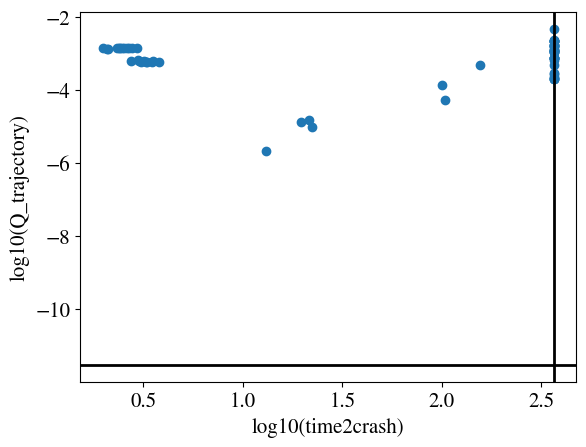

In [100]:
# Scatter the mean 'Q_trajectory' of all keys vs. the inverse time2crash
# Create a list of the time to crash
time2crash_list = []
for simname in simname_list:
    time2crash_list.append(sim_drift[simname]['time2crash'])
# Create a list of the mean 'Q_trajectory'
Q_trajectory_list = []
for simname in simname_list:
    Q_trajectory_list.append(np.mean(sim_drift[simname]['Q_trajectory']))
# Scatter the mean 'Q_trajectory' of all keys vs. the inverse time2crash
plt.scatter(np.log10(time2crash_list),np.log10(Q_trajectory_list))
# Add horizontal line with the mean of the SP Q_trajectory as a reference
plt.axhline(y=np.log10(np.mean(SPdrift['Q'])),color='k')
# Add vertical line for simulations that ran a full year as a reference
plt.axvline(x=np.log10(365),color='k')

plt.xlabel('log10(time2crash)')
plt.ylabel('log10(Q_trajectory)')

In [18]:
# For all simulations, plot Q trajectory as a function of T trajectory
# and assign colors based on the simulation characteristics

# First extract the simulations in m4k
Qtraj_list_m4k = []; Ttraj_list_m4k = []; simname_list_m4k = []; 
regularization_list_m4k = []; RHorQ_list_m4k = []; 
# If m4K in path name, then add the Qtrj, Ttrj and simname to the list
for ipath,path in enumerate(path_list):
    if 'm4k' in path:
        Qtraj_list_m4k.append(sim_drift[simname_list[ipath]]['Q_trajectory'])
        Ttraj_list_m4k.append(sim_drift[simname_list[ipath]]['T_trajectory'])
        simname_list_m4k.append(simname_list[ipath])
        regularization_list_m4k.append(10*(int(simname_list[ipath].split('_')[-1])-1))
        # For RHorQ, assign "1" if "relative" is in the path, 0 otherwise
        if 'relative' in path:
            RHorQ_list_m4k.append(1)
        else:
            RHorQ_list_m4k.append(0)

# Repeat for 0k
Qtraj_list_0k = []; Ttraj_list_0k = []; simname_list_0k = [];
regularization_list_0k = []; RHorQ_list_0k = []; 
# If 0K in path name, then add the Qtrj, Ttrj and simname to the list
for ipath,path in enumerate(path_list):
    if '0k' in path:
        Qtraj_list_0k.append(sim_drift[simname_list[ipath]]['Q_trajectory'])
        Ttraj_list_0k.append(sim_drift[simname_list[ipath]]['T_trajectory'])
        simname_list_0k.append(simname_list[ipath])
        regularization_list_0k.append(10*(int(simname_list[ipath].split('_')[-1])-1))
        # For RHorQ, assign "1" if "relative" is in the path, 0 otherwise
        if 'relative' in path:
            RHorQ_list_0k.append(1)
        else:
            RHorQ_list_0k.append(0)

# Repeat for p4k
Qtraj_list_p4k = []; Ttraj_list_p4k = []; simname_list_p4k = [];
regularization_list_p4k = []; RHorQ_list_p4k = []; 
# If p4K in path name, then add the Qtrj, Ttrj and simname to the list
for ipath,path in enumerate(path_list):
    if 'p4k' in path:
        Qtraj_list_p4k.append(sim_drift[simname_list[ipath]]['Q_trajectory'])
        Ttraj_list_p4k.append(sim_drift[simname_list[ipath]]['T_trajectory'])
        simname_list_p4k.append(simname_list[ipath])
        regularization_list_p4k.append(10*(int(simname_list[ipath].split('_')[-1])-1))
        # For RHorQ, assign "1" if "relative" is in the path, 0 otherwise
        if 'relative' in path:
            RHorQ_list_p4k.append(1)
        else:
            RHorQ_list_p4k.append(0)


/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CI/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CI/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


Text(0.5, 1.0, 'p4k')

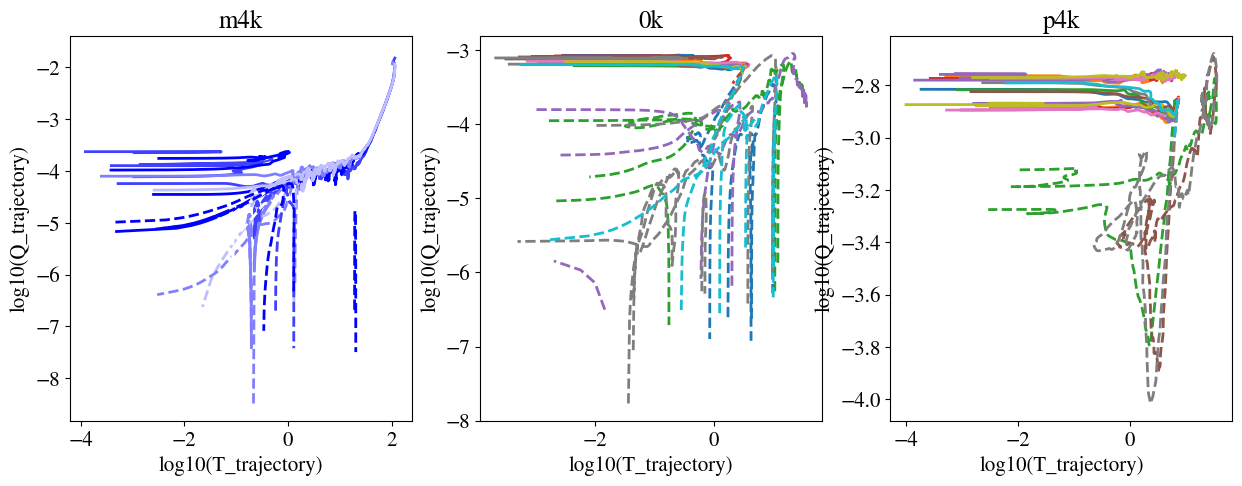

In [19]:
# Create a figure with 3 subplots all in one row
fig,ax = plt.subplots(1,3,figsize=(15,5))

# First subplot is for m4k
# Make linestyle '--' if RHorQ=1, '-' otherwise
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_m4k,Qtraj_list_m4k,RHorQ_list_m4k,regularization_list_m4k):
    if RHorQ == 1: linestyle = '--'
    else: linestyle = '-'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/40*np.array([1,1,0])
    ax[0].plot(np.log10(Ttraj),np.log10(Qtraj),linestyle=linestyle,color=color)
ax[0].set_xlabel('log10(T_trajectory)')
ax[0].set_ylabel('log10(Q_trajectory)')
ax[0].set_title('m4k')

# Second subplot is for 0k
for Ttraj,Qtraj,RHorQ in zip(Ttraj_list_0k,Qtraj_list_0k,RHorQ_list_0k):
    if RHorQ == 1: linestyle = '--'
    else: linestyle = '-'
    ax[1].plot(np.log10(Ttraj),np.log10(Qtraj),linestyle=linestyle)
ax[1].set_xlabel('log10(T_trajectory)')
ax[1].set_ylabel('log10(Q_trajectory)')
ax[1].set_title('0k')

# Third subplot is for p4k
for Ttraj,Qtraj,RHorQ in zip(Ttraj_list_p4k,Qtraj_list_p4k,RHorQ_list_p4k):
    if RHorQ == 1: linestyle = '--'
    else: linestyle = '-'
    ax[2].plot(np.log10(Ttraj),np.log10(Qtraj),linestyle=linestyle)
ax[2].set_xlabel('log10(T_trajectory)')
ax[2].set_ylabel('log10(Q_trajectory)')
ax[2].set_title('p4k')


Text(0.5, 1.0, 'p4k')

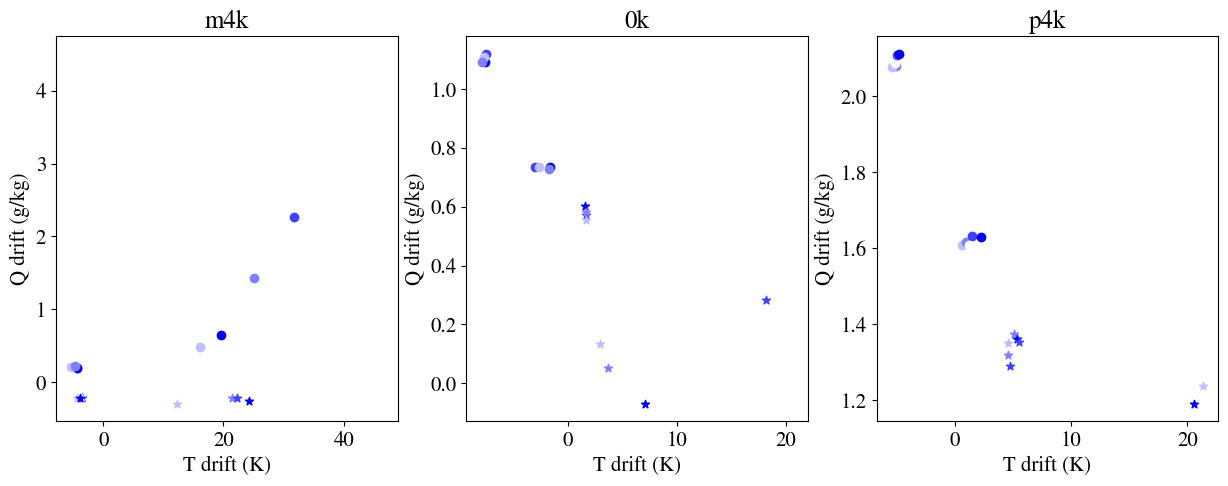

In [20]:
# Create a figure with 3 subplots all in one row
fig,ax = plt.subplots(1,3,figsize=(15,5))

# First subplot is for m4k
# Marker is star if RHorQ=1, circle otherwise
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_m4k,Qtraj_list_m4k,RHorQ_list_m4k,regularization_list_m4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/40*np.array([1,1,0])
    ax[0].scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax[0].set_xlabel('T drift (K)')
ax[0].set_ylabel('Q drift (g/kg)')
ax[0].set_title('m4k')

# Second subplot is for 0k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_0k,Qtraj_list_0k,RHorQ_list_0k,regularization_list_0k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/40*np.array([1,1,0])
    ax[1].scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax[1].set_xlabel('T drift (K)')
ax[1].set_ylabel('Q drift (g/kg)')
ax[1].set_title('0k')

# Third subplot is for p4k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_p4k,Qtraj_list_p4k,RHorQ_list_p4k,regularization_list_p4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/40*np.array([1,1,0])
    ax[2].scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax[2].set_xlabel('T drift (K)')
ax[2].set_ylabel('Q drift (g/kg)')
ax[2].set_title('p4k')


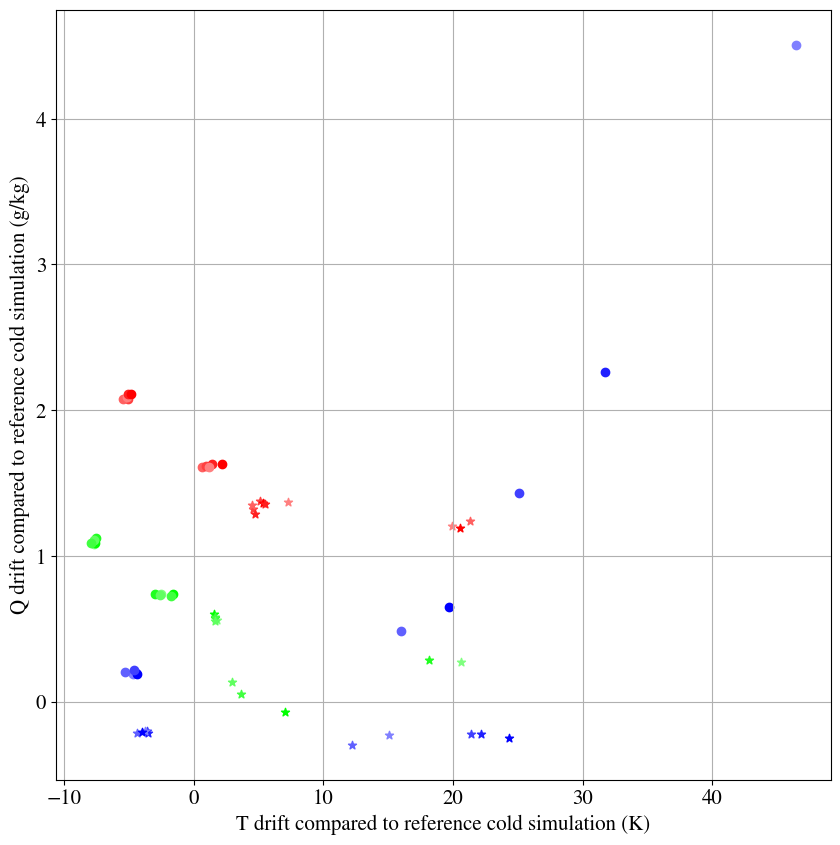

In [24]:
# Put all simulations on the same plot
fig,ax = plt.subplots(1,1,figsize=(10,10))

# First subplot is for m4k
# Marker is star if RHorQ=1, circle otherwise
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_m4k,Qtraj_list_m4k,RHorQ_list_m4k,regularization_list_m4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/80*np.array([1,1,0])
    ax.scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax.set_xlabel('T drift (K)')
ax.set_ylabel('Q drift (g/kg)')

# Second subplot is for 0k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_0k,Qtraj_list_0k,RHorQ_list_0k,regularization_list_0k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,1,0])+regularization/80*np.array([1,0,1])
    ax.scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax.set_xlabel('T drift (K)')
ax.set_ylabel('Q drift (g/kg)')

# Third subplot is for p4k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_p4k,Qtraj_list_p4k,RHorQ_list_p4k,regularization_list_p4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([1,0,0])+regularization/80*np.array([0,1,1])
    ax.scatter(np.mean(Ttraj),1e3*np.mean(Qtraj),marker=marker,color=color)
ax.set_xlabel('T drift compared to reference cold simulation (K)')
ax.set_ylabel('Q drift compared to reference cold simulation (g/kg)')

ax.grid()

In [55]:
istart = 24

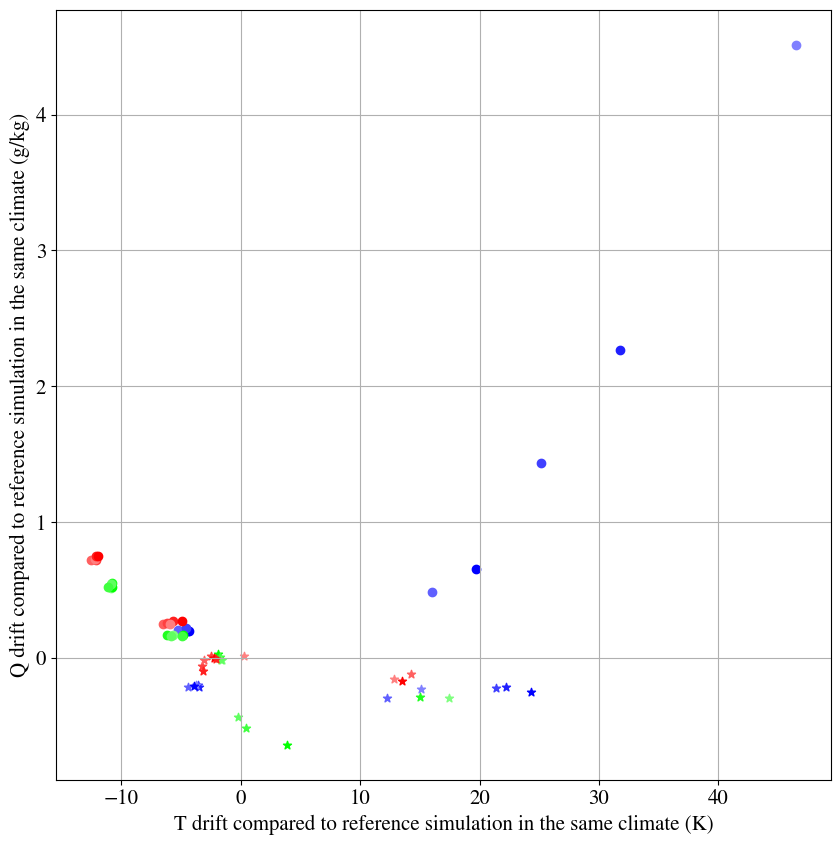

In [56]:
# Put all simulations on the same plot
fig,ax = plt.subplots(1,1,figsize=(10,10))

# First subplot is for m4k
# Marker is star if RHorQ=1, circle otherwise
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_m4k,Qtraj_list_m4k,RHorQ_list_m4k,regularization_list_m4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,0,1])+regularization/80*np.array([1,1,0])
    ax.scatter(np.mean(Ttraj[istart:]),1e3*np.mean(Qtraj[istart:]),marker=marker,color=color)
ax.set_xlabel('T drift (K)')
ax.set_ylabel('Q drift (g/kg)')

# Second subplot is for 0k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_0k,Qtraj_list_0k,RHorQ_list_0k,regularization_list_0k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([0,1,0])+regularization/80*np.array([1,0,1])
    # Use 0k as a reference instead of m4k
    ax.scatter(np.mean(Ttraj[istart:])-np.mean(SPtraj_0k['T_trajectory']-SPtraj_m4k['T_trajectory']),
    1e3*(np.mean(Qtraj[istart:])-np.mean(SPtraj_0k['Q_trajectory']-SPtraj_m4k['Q_trajectory'])),
    marker=marker,color=color)
ax.set_xlabel('T drift (K)')
ax.set_ylabel('Q drift (g/kg)')

# Third subplot is for p4k
for Ttraj,Qtraj,RHorQ,regularization in zip(Ttraj_list_p4k,Qtraj_list_p4k,RHorQ_list_p4k,regularization_list_p4k):
    if RHorQ == 1: marker = '*'
    else: marker = 'o'
    # Make color darker if regularization is higher
    color = np.array([1,0,0])+regularization/80*np.array([0,1,1])
    # Use p4k as a reference instead of m4k
    ax.scatter(np.mean(Ttraj[istart:])-np.mean(SPtraj_p4k['T_trajectory']-SPtraj_m4k['T_trajectory']),
    1e3*(np.mean(Qtraj[istart:])-np.mean(SPtraj_p4k['Q_trajectory']-SPtraj_m4k['Q_trajectory'])),
    marker=marker,color=color)
ax.set_xlabel('T drift compared to reference simulation in the same climate (K)')
ax.set_ylabel('Q drift compared to reference simulation in the same climate (g/kg)')

ax.grid()

In [26]:
# Find all the paths containing the string 'model7_1'
path_model7_1 = [path for path in path_list if 'model7_1' in path]
# Repeat for simname_list
simname_model7_1 = [simname for simname in simname_list if 'model7_1' in simname]

In [28]:
# Extract the simulations in the list containing the string 'model7_1'
Qtraj_list_m71 = []; Ttraj_list_m71 = []; simname_list_m71 = []; 
regularization_list_m71 = []; RHorQ_list_m71 = []; 
for ipath,path in enumerate(path_list):
    if path in path_model7_1:
        Qtraj_list_m71.append(sim_drift[simname_list[ipath]]['Q_trajectory'])
        Ttraj_list_m71.append(sim_drift[simname_list[ipath]]['T_trajectory'])
        simname_list_m71.append(simname_list[ipath])
        regularization_list_m71.append(10*(int(simname_list[ipath].split('_')[-1])-1))
        # For RHorQ, assign "1" if "relative" is in the path, 0 otherwise
        if 'relative' in path:
            RHorQ_list_m71.append(1)
        else:
            RHorQ_list_m71.append(0)
    

In [31]:
RHorQ_list_m71

[1, 0, 0, 1, 0, 1]

In [32]:
for Qtraj in zip(Qtraj_list_m71):
    print(np.std(Qtraj))

0.0003157972
0.00014221408
5.9918122e-05
0.00015468027
0.0020771543
0.00013054415


Text(0, 0.5, 'Specific humidity bias (kg/kg)')

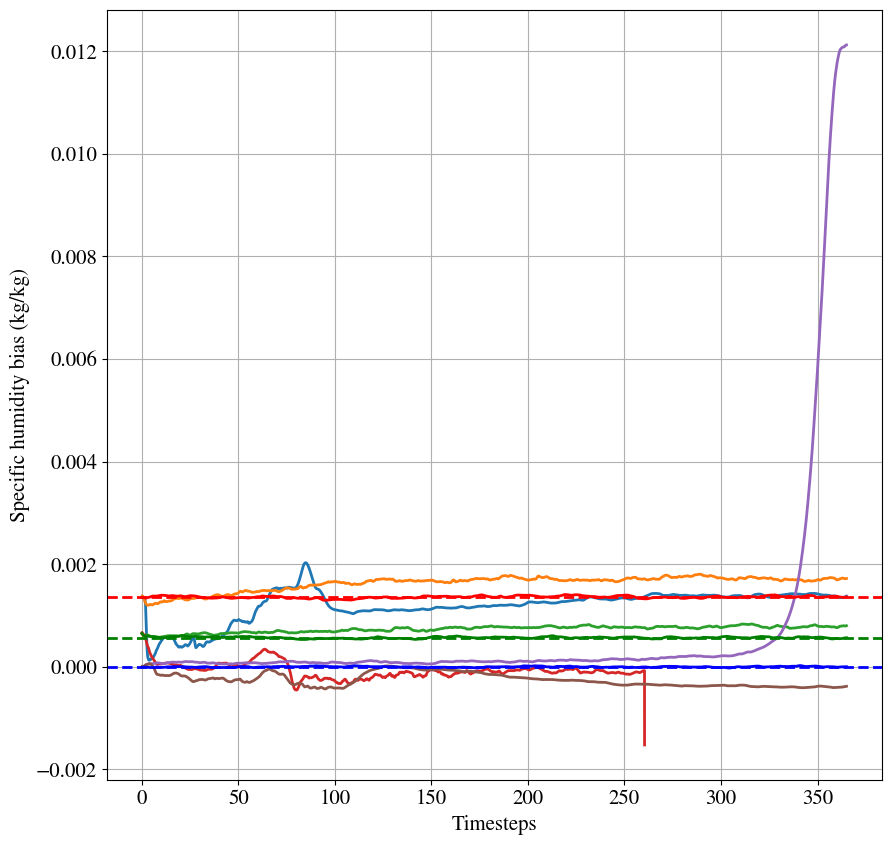

In [35]:
# Plot all of the trajectories in Qtraj_list_m71
fig,ax = plt.subplots(1,1,figsize=(10,10))

for Qtraj in zip(Qtraj_list_m71):
    ax.plot(np.arange(len(Qtraj[0]))/48,Qtraj[0])

# Add the SP references
ax.plot(SPtraj_m4k['Q_trajectory'],'b')
ax.axhline(y=np.mean(SPtraj_m4k['Q_trajectory']),linestyle='--',color='b')
ax.plot(SPtraj_0k['Q_trajectory'],'g')
ax.axhline(y=np.mean(SPtraj_0k['Q_trajectory']),linestyle='--',color='g')
ax.plot(SPtraj_p4k['Q_trajectory'],'r')
ax.axhline(y=np.mean(SPtraj_p4k['Q_trajectory']),linestyle='--',color='r')
ax.grid()

ax.set_xlabel('Timesteps')
ax.set_ylabel('Specific humidity bias (kg/kg)')

## Q and T trajectories

In [164]:
# Wrap the previous cell in a function that takes the model name and plots the Qtraj and the Ttrajectory
# istart indicates the first timestep to plot the trajectory
def plot_Qtraj_Ttraj(modelname,day_start=2,day_end=100):
    '''
    1. Find all the paths containing the string modelname
    2. Extract the simulations in the list containing the string modelname
    3. Create a figure with two square subplots
    4. Plot all of the trajectories in Qtraj_list_modelname in a subplot
    5. Plot all of the trajectories in Ttrajectory_list_modelname in a second subplot
    '''
    # Round day_start and day_end to the nearest integer
    day_start = int(day_start); day_end = int(day_end)
    # Calculate the istart and iend indices from the day_start and day_end
    istart = day_start*48; iend = day_end*48

    # Find all the paths containing the string modelname
    path_modelname = [path for path in path_list if modelname in path]
    # Repeat for simname_list
    simname_modelname = [simname for simname in simname_list if modelname in simname]

    # Extract the simulations in the list containing the string modelname
    Qtraj_list_modelname = []; Ttraj_list_modelname = []; simname_list_modelname = [];
    regularization_list_modelname = []; RHorQ_list_modelname = []; clim_list_modelname = [];
    Qprofile_list_modelname = []; Tprofile_list_modelname = [];
    for ipath,path in enumerate(path_list):
        if path in path_modelname:
            Qtraj_list_modelname.append(sim_drift[simname_list[ipath]]['Q_trajectory'])
            Ttraj_list_modelname.append(sim_drift[simname_list[ipath]]['T_trajectory'])
            Qprofile_list_modelname.append(sim_drift[simname_list[ipath]]['Q_profile'])
            Tprofile_list_modelname.append(sim_drift[simname_list[ipath]]['T_profile'])
            simname_list_modelname.append(simname_list[ipath])
            regularization_list_modelname.append(10*(int(simname_list[ipath].split('_')[-1])-1))
            # For RHorQ, assign "1" if "relative" is in the path, 0 otherwise
            if 'relative' in path:
                RHorQ_list_modelname.append(1)
            else:
                RHorQ_list_modelname.append(0)
            # For clim, assign "0" if "m4k" is in the path, 1 if "0k" is in the path, 2 if "p4k" is in the path
            if 'm4k' in path:
                clim_list_modelname.append(0)
            elif '0k' in path:
                clim_list_modelname.append(1)
            elif 'p4k' in path:
                clim_list_modelname.append(2)

    # Plot all of the trajectories in Qtraj_list_modelname
    fig,ax = plt.subplots(2,2,figsize=(20,20))

    for Qtraj,RHorQ,clim in zip(Qtraj_list_modelname,RHorQ_list_modelname,clim_list_modelname):
        if RHorQ == 1: linestyle = ':'
        else: linestyle = '-'
        if clim == 0: color = 'b'
        elif clim == 1: color = 'g'
        elif clim == 2: color = 'r'
        
        ax[0,0].plot(istart/48+np.arange(len(Qtraj[istart:iend]))/48,Qtraj[istart:iend],
        linestyle=linestyle,color=color)
    
    # Add the SP references
    ax[0,0].plot(SPtraj_m4k['Q_trajectory'][day_start:day_end],'b')
    ax[0,0].axhline(y=np.mean(SPtraj_m4k['Q_trajectory'][day_start:day_end]),linestyle='--',color='b')
    ax[0,0].plot(SPtraj_0k['Q_trajectory'][day_start:day_end],'g')
    ax[0,0].axhline(y=np.mean(SPtraj_0k['Q_trajectory'][day_start:day_end]),linestyle='--',color='g')
    ax[0,0].plot(SPtraj_p4k['Q_trajectory'][day_start:day_end],'r')
    ax[0,0].axhline(y=np.mean(SPtraj_p4k['Q_trajectory'][day_start:day_end]),linestyle='--',color='r')
    ax[0,0].grid()

    ax[0,0].set_xlabel('Days')
    ax[0,0].set_ylabel('Specific humidity bias (kg/kg)')
    ax[0,0].set_ylim((-0.001,0.0025))

    # Plot all of the trajectories in Ttraj_list_modelname
    for Ttraj,RHorQ,clim in zip(Ttraj_list_modelname,RHorQ_list_modelname,clim_list_modelname):
        if RHorQ == 1: linestyle = ':'
        else: linestyle = '-'
        if clim == 0: color = 'b'
        elif clim == 1: color = 'g'
        elif clim == 2: color = 'r'
        
        ax[0,1].plot(istart/48+np.arange(len(Ttraj[istart:iend]))/48,Ttraj[istart:iend],
        linestyle=linestyle,color=color)

    # Add the SP references
    ax[0,1].plot(SPtraj_m4k['T_trajectory'][day_start:day_end],'b')
    ax[0,1].axhline(y=np.mean(SPtraj_m4k['T_trajectory'][day_start:day_end]),linestyle='--',color='b')
    ax[0,1].plot(SPtraj_0k['T_trajectory'][day_start:day_end],'g')
    ax[0,1].axhline(y=np.mean(SPtraj_0k['T_trajectory'][day_start:day_end]),linestyle='--',color='g')
    ax[0,1].plot(SPtraj_p4k['T_trajectory'][day_start:day_end],'r')
    ax[0,1].axhline(y=np.mean(SPtraj_p4k['T_trajectory'][day_start:day_end]),linestyle='--',color='r')
    ax[0,1].grid()

    ax[0,1].set_xlabel('Days')
    ax[0,1].set_ylabel('Temperature bias (K)')
    ax[0,1].set_ylim((-10,40))

    # Plot the profiles
    # Q profile
    for Qprof,RHorQ,clim in zip(Qprofile_list_modelname,RHorQ_list_modelname,clim_list_modelname):
        if RHorQ == 1: linestyle = ':'
        else: linestyle = '-'
        if clim == 0: color = 'b'
        elif clim == 1: color = 'g'
        elif clim == 2: color = 'r'

        ax[1,0].plot(Qprof,SPRef_m4k.lev.values,linestyle=linestyle,color=color)
    
    ax[1,0].axhline(y=SPRef_m4k.lev.values[12],linestyle='--',color='k')
    ax[1,0].invert_yaxis()
    ax[1,0].set_xlabel('Specific humidity bias (kg/kg)')
    ax[1,0].set_ylabel('Pressure (hPa)')
    ax[1,0].set_xlim((-0.001,0.005))
    ax[1,0].grid()

    # T profile
    for Tprof,RHorQ,clim in zip(Tprofile_list_modelname,RHorQ_list_modelname,clim_list_modelname):
        if RHorQ == 1: linestyle = ':'
        else: linestyle = '-'
        if clim == 0: color = 'b'
        elif clim == 1: color = 'g'
        elif clim == 2: color = 'r'

        ax[1,1].plot(Tprof,SPRef_m4k.lev.values,linestyle=linestyle,color=color)

    ax[1,1].axhline(y=SPRef_m4k.lev.values[12],linestyle='--',color='k')
    ax[1,1].invert_yaxis()
    ax[1,1].set_xlabel('Temperature bias (K)')
    ax[1,1].set_ylabel('Pressure (hPa)')
    ax[1,1].set_xlim((-10,40))
    ax[1,1].grid()

    # Add a title to the figure
    fig.suptitle(modelname)

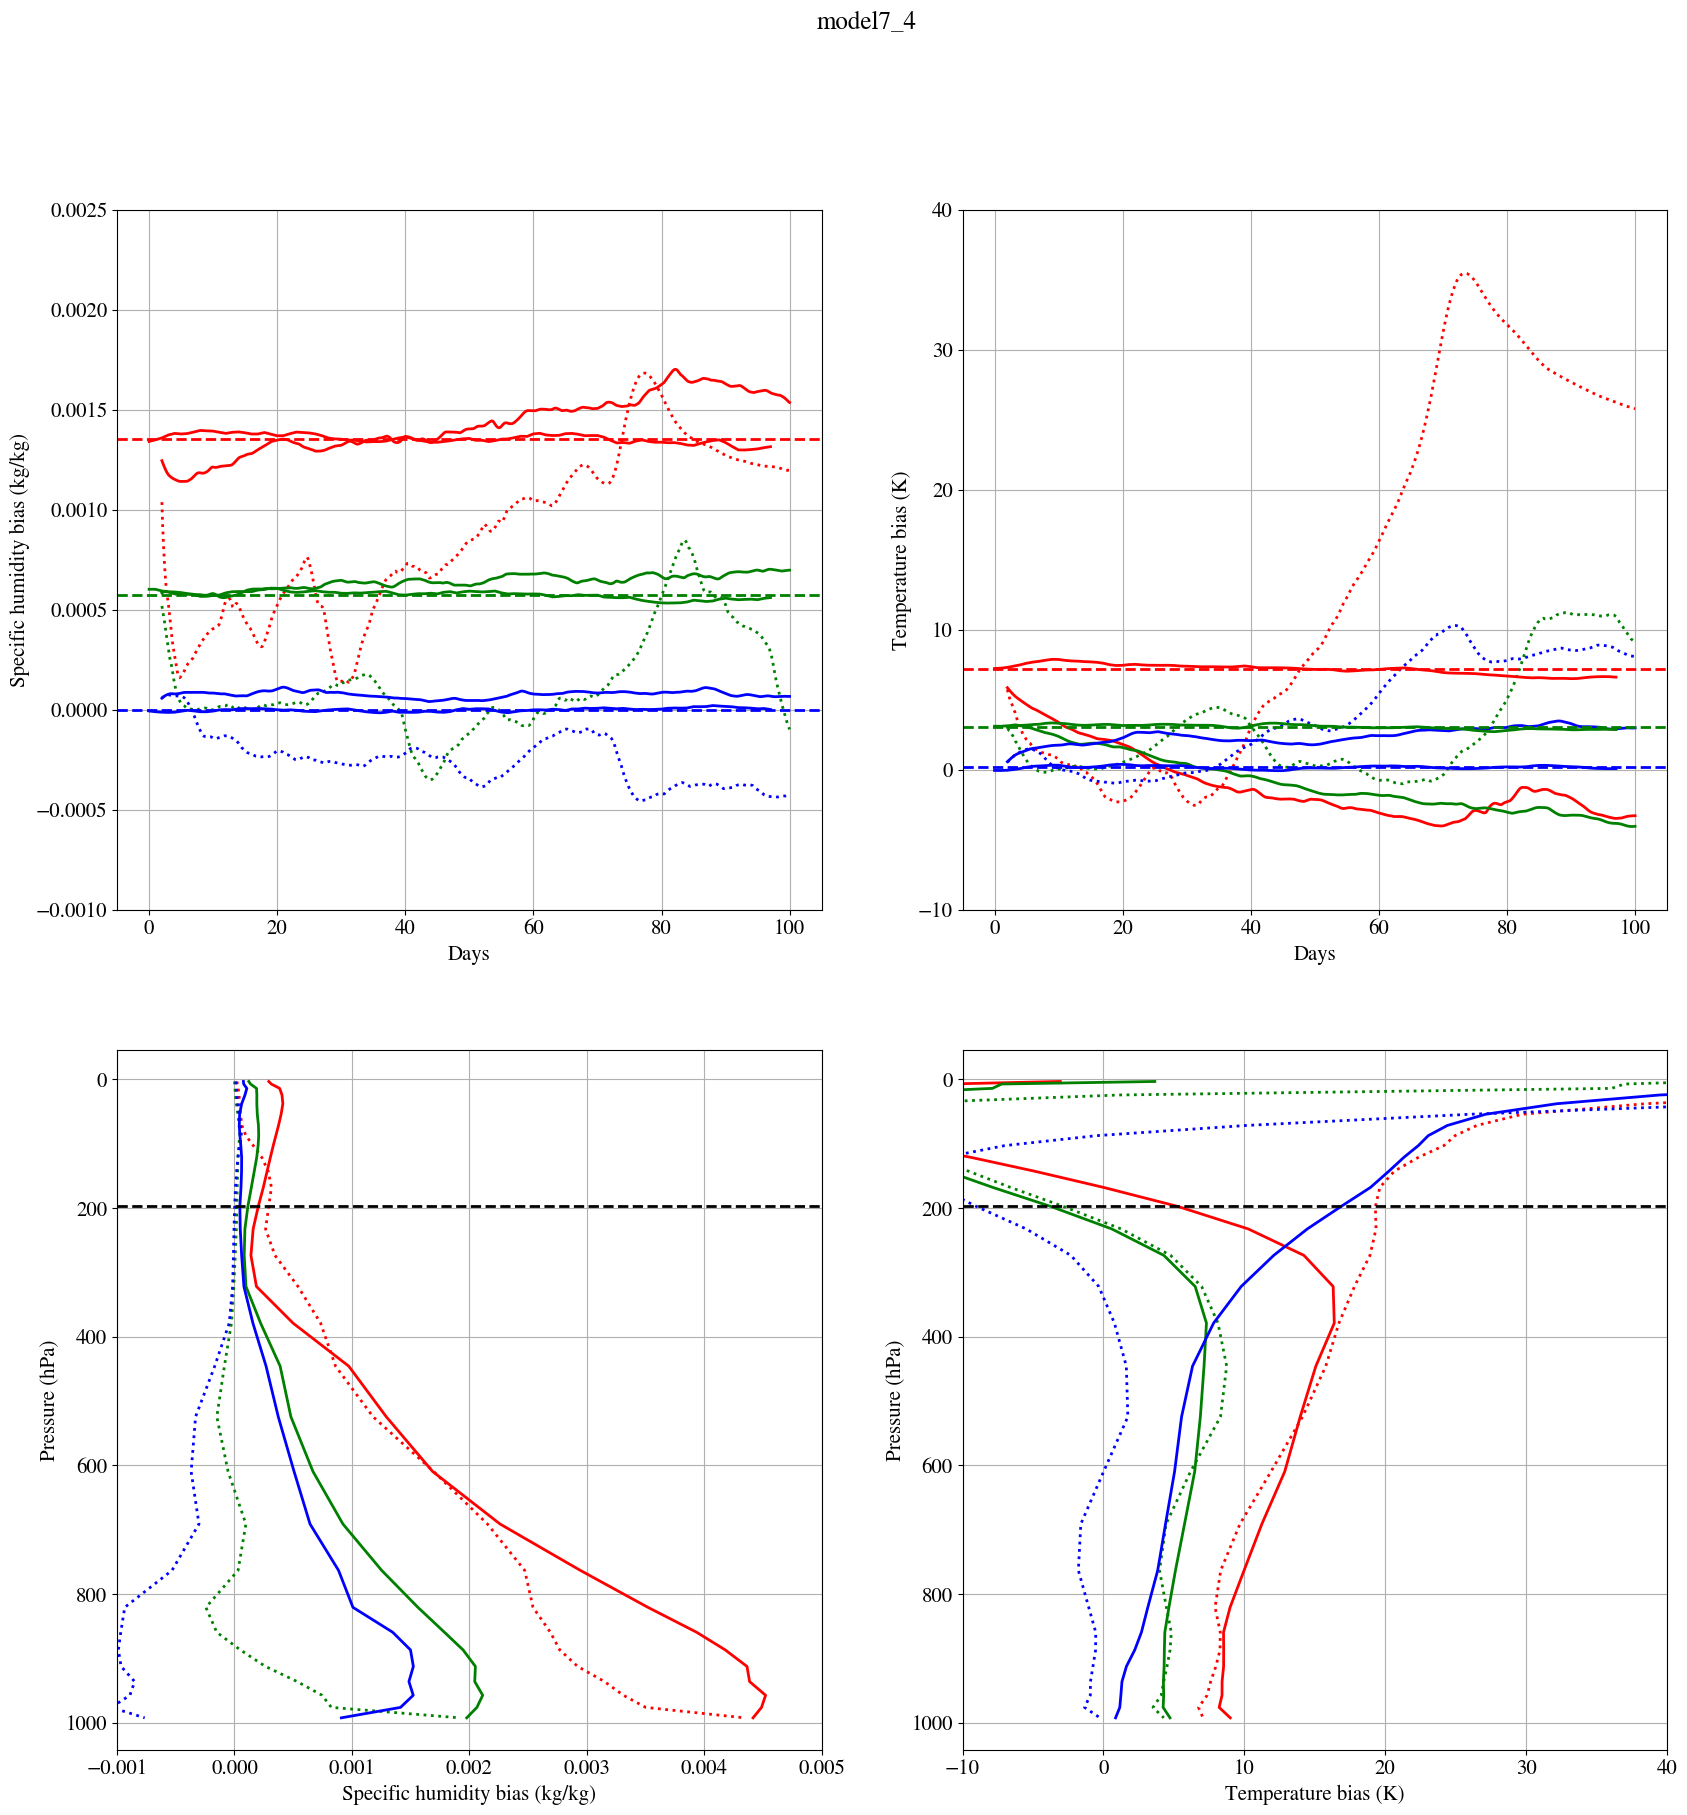

In [175]:
plot_Qtraj_Ttraj('model7_4',day_end=100)

# Only consider the "chosen" simulations 7_1, 7_4, 7_5

In [176]:
# Create a list chosenpath_list from path_list
# keeping only the paths that have '7_1', '7_4', or '7_5' in them
chosenpath_list = []
for path in path_list:
    if '7_1' in path or '7_4' in path or '7_5' in path:
        chosenpath_list.append(path)

In [177]:
chosenpath_list

['/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/relative/rmodel7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/p4k/specific/model7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_5',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/specific/model7_4',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel7_1',
 '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/2022_08_12_Jerry_Runs/0k/relative/rmodel7_5',
 '/DFS-L/DATA/pritcha

In [ ]:
# Now load all the simulations in path_list
chosensim_list = {}
for ipath,path in enumerate(chosenpath_list):
    print('path = ',path)
    chosensim_list[chosensimname_list[ipath]] = xr.open_mfdataset(path+'/*h1*.nc',combine='nested',
    concat_dim='time', engine='netcdf4')

## Calculation

In [66]:
MeanClim_m4k = {}; MeanClim_0k = {}; MeanClim_p4k = {};
MeanClim_noS = {};

In [67]:
MeanClim_m4k['Q'] = np.mean(SPRef_m4k['NNQBP'].values,axis=0)
MeanClim_m4k['T'] = np.mean(SPRef_m4k['NNTBP'].values,axis=0)

MeanClim_0k['Q'] = np.mean(SPRef_0k['NNQBP'].values,axis=0)
MeanClim_0k['T'] = np.mean(SPRef_0k['NNTBP'].values,axis=0)

MeanClim_p4k['Q'] = np.mean(SPRef_p4k['NNQBP'].values,axis=0)
MeanClim_p4k['T'] = np.mean(SPRef_p4k['NNTBP'].values,axis=0)

In [28]:
MeanClim_noS['Q'] = np.mean(SPRef['NNQBP'][:,12:,:,:].values,axis=0)
MeanClim_noS['T'] = np.mean(SPRef['NNTBP'][:,12:,:,:].values,axis=0)

In [29]:
datetimeindex = SPRef['time'].values
new_datetime = []
for i,cfdat in enumerate(datetimeindex):
    new_datetime.append(
        np.datetime64(
        '%04.0f'%cfdat.year+'-'+'%02.0f'%cfdat.month+'-'+
        '%02.0f'%cfdat.day+' '+'%02.0f'%cfdat.hour+':'+
        '%02.0f'%cfdat.minute+':'+'%02.0f'%cfdat.second)
    )
new_datetime = np.array(new_datetime)
xt = []
for date in new_datetime:
    xt.append(np.timedelta64(date-new_datetime[0],'D'))
xt = np.float32(np.array(xt))

In [30]:
SPdrift = {}; Sundrift = {}; J01_0drift = {}; JL2_0drift = {}; JL2_1drift = {}

In [34]:
J01_1drift = {}; JL2_0drift_noS = {}; RHdrift = {}; RH1drift = {}

## Global Average and Drift

In [31]:
SPdrift['Q'] = np.mean(SPRef['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
SPdrift['T'] = np.mean(SPRef['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [20]:
RHdrift['Q'] = np.mean(JRH_0run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
RHdrift['T'] = np.mean(JRH_0run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [26]:
RH1drift['Q'] = np.mean(JRH_1run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
RH1drift['T'] = np.mean(JRH_1run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [18]:
JL2_0drift['Q'] = np.mean(JL2_0run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
JL2_0drift['T'] = np.mean(JL2_0run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [19]:
JL2_1drift['Q'] = np.mean(JL2_1run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
JL2_1drift['T'] = np.mean(JL2_1run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [ ]:
Sundrift['Q'] = np.mean(Sungrun['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
Sundrift['T'] = np.mean(Sungrun['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [13]:
J01_0drift['Q'] = np.mean(J01_0run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
J01_0drift['T'] = np.mean(J01_0run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [14]:
J01_1drift['Q'] = np.mean(J01_1run['NNQBP'].values-MeanClim['Q'],axis=(1,2,3))
J01_1drift['T'] = np.mean(J01_1run['NNTBP'].values-MeanClim['T'],axis=(1,2,3))

In [62]:
JL2_0drift_noS['Q'] = np.mean(JL2_0run['NNQBP'][:,12:,:,:].values-MeanClim_noS['Q'],axis=(1,2,3))
JL2_0drift_noS['T'] = np.mean(JL2_0run['NNTBP'][:,12:,:,:].values-MeanClim_noS['T'],axis=(1,2,3))

In [18]:
x_30min = np.linspace(1/48,1000,48*1000)

Text(0.5, 1.0, 'Temperature Drift')

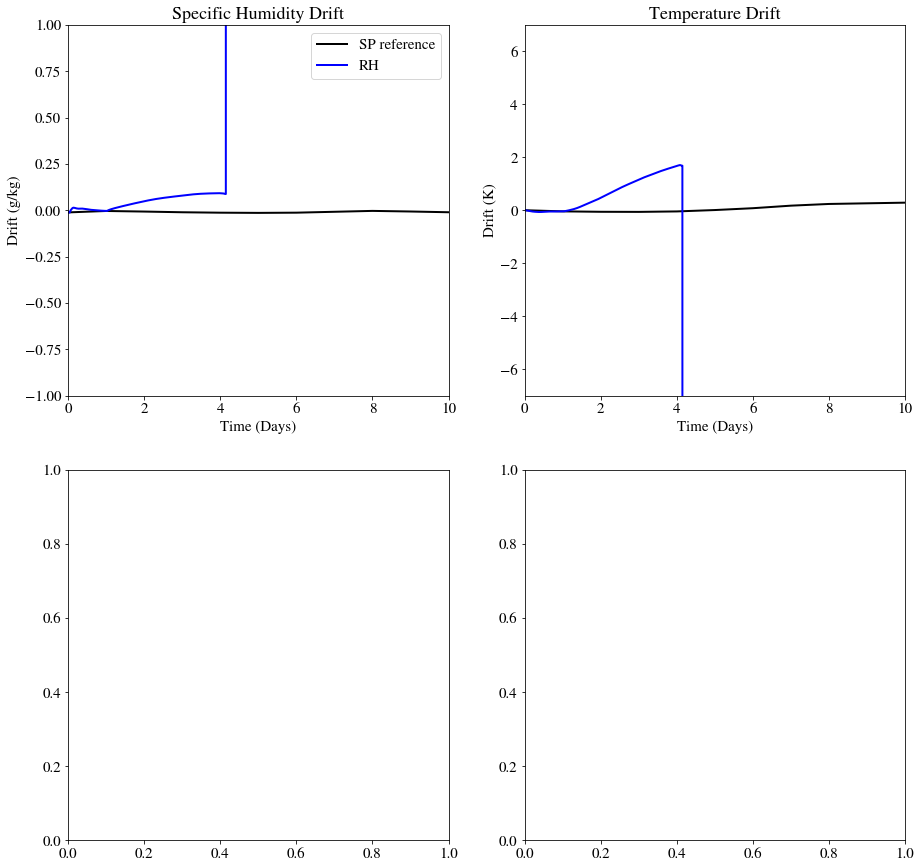

In [35]:
drift = RH1drift
label0 = 'RH'
# drift2 = JL2_1drift
# label1 = 'standard L2'
# drift = JL2_0drift 
# label0 = 'strong L2'

drift_noS = JL2_0drift_noS

fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].plot(xt,1e3*SPdrift['Q'],color='k',label='SP reference')
ax[0,0].plot(x_30min[:len(drift['Q'])],1e3*drift['Q'],color='b',label=label0)
#ax[0,0].plot(x_30min[:len(drift2['Q'])],1e3*drift2['Q'],color='g',label=label1)
ax[0,0].set_xlim((0,10))
ax[0,0].set_ylim((-1,1))
ax[0,0].set_xlabel('Time (Days)')
ax[0,0].set_ylabel('Drift (g/kg)')
ax[0,0].set_title('Specific Humidity Drift')
ax[0,0].legend()

ax[0,1].plot(xt,SPdrift['T'],color='k')
ax[0,1].plot(x_30min[:len(drift['T'])],drift['T'],color='b')
#ax[0,1].plot(x_30min[:len(drift2['T'])],drift2['T'],color='g')
ax[0,1].set_xlim((0,10))
ax[0,1].set_ylim((-7,7))
ax[0,1].set_xlabel('Time (Days)')
ax[0,1].set_ylabel('Drift (K)')
ax[0,1].set_title('Temperature Drift')

# ax[1,0].plot(xt,1e3*SPdrift['Q'],color='k',label='SP reference')
# ax[1,0].plot(x_30min[:len(drift_noS['Q'])],1e3*drift_noS['Q'],color='b',label=label0)
# #ax[1,0].set_xlim((5,6.25))
# ax[1,0].set_ylim((-0.1,1))
# ax[1,0].set_xlabel('Time (Days)')
# ax[1,0].set_ylabel('Drift excluding 0-200hPa (g/kg)')

# ax[1,1].plot(xt,SPdrift['T'],color='k')
# ax[1,1].plot(x_30min[:len(drift_noS['T'])],drift_noS['T'],color='b')
# #ax[1,1].set_xlim((5,6.25))
# #ax[1,1].set_ylim((-7,7))
# ax[1,1].set_xlabel('Time (Days)')
# ax[1,1].set_ylabel('Drift excluding 0-200 hPa (K)')

In [47]:
run = JL2_0run

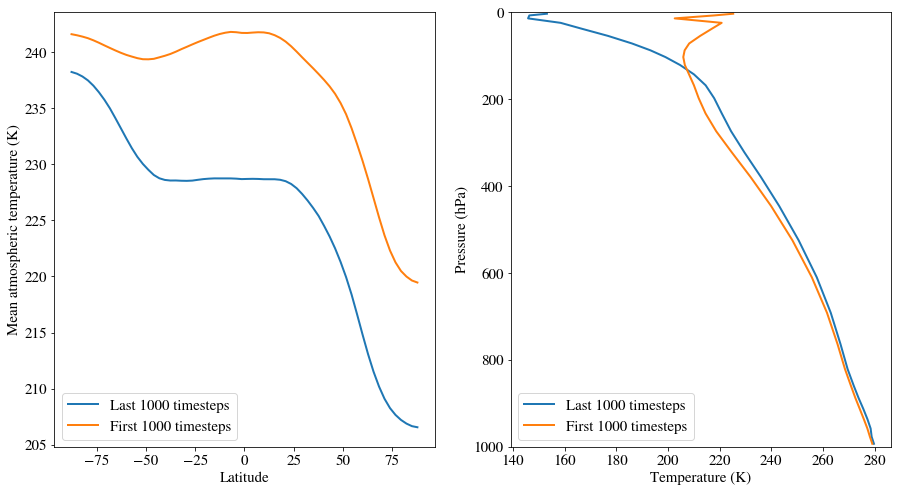

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(run['NNTBP'][-1000:,:,:,:],axis=(0,1,3)),label='Last 1000 timesteps')
ax[0].plot(run['lat'],np.mean(run['NNTBP'][:1000,:,:,:],axis=(0,1,3)),label='First 1000 timesteps')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('Mean atmospheric temperature (K)')

ax[1].plot(np.mean(run['NNTBP'][-1000:,:,:,:],axis=(0,2,3)),run['lev'],label='Last 1000 timesteps')
ax[1].plot(np.mean(run['NNTBP'][:1000,:,:,:],axis=(0,2,3)),run['lev'],label='First 1000 timesteps')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('Temperature (K)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

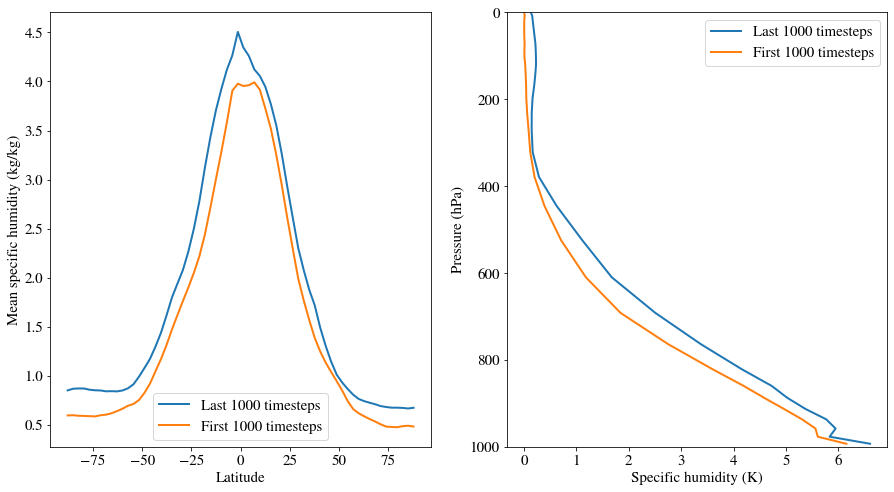

In [65]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(1e3*run['NNQBP'][-1000:,:,:,:],axis=(0,1,3)),label='Last 1000 timesteps')
ax[0].plot(run['lat'],np.mean(1e3*run['NNQBP'][:1000,:,:,:],axis=(0,1,3)),label='First 1000 timesteps')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('Mean specific humidity (kg/kg)')

ax[1].plot(np.mean(1e3*run['NNQBP'][-1000:,:,:,:],axis=(0,2,3)),run['lev'],label='Last 1000 timesteps')
ax[1].plot(np.mean(1e3*run['NNQBP'][:1000,:,:,:],axis=(0,2,3)),run['lev'],label='First 1000 timesteps')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('Specific humidity (K)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

## Map of drift (continents don't exist & only for localization purposes)

In [12]:
vmin0 = -20
vmax0 = 20
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [13]:
ilev = 29

The near-surface drifts to warmer and warmer temperatures until it drops down suddenly right before the crash

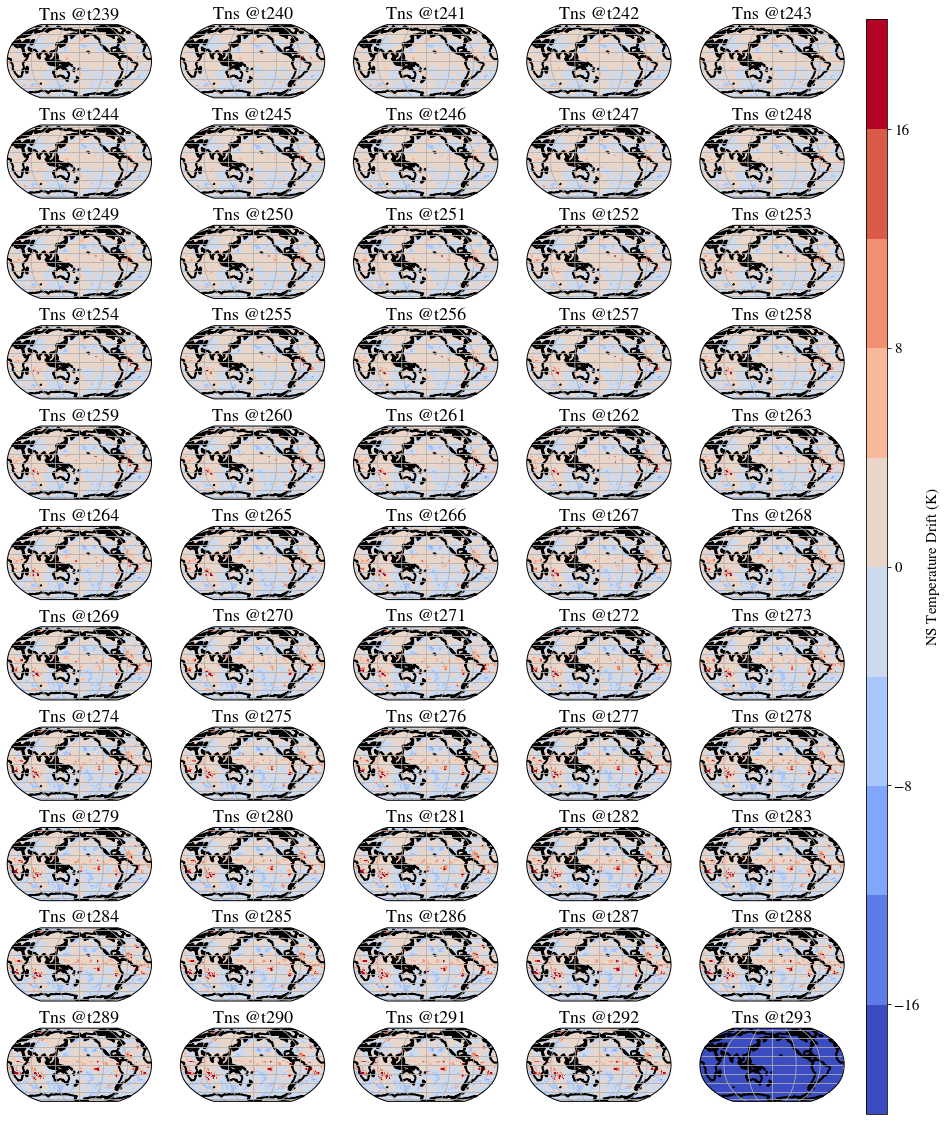

In [14]:
fig, ax = plt.subplots(11,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,20))

for iplot in range(55):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = Sungrun['NNTBP'][iplot+239,-1,:,:].values-MeanClim['T'][-1,:,:]
    imag = ax[irow,icol].pcolormesh(Sungrun['lon'],Sungrun['lat'], toplot,
                                transform=ccrs.PlateCarree(),
                               cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('Tns @t'+str(iplot+239),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="NS Temperature Drift "+r'$\left(\mathrm{K}\right)$', cax=cbar_ax)

## Zoom in on a drifting sub-region at the center of the map

In [15]:
ilon_min = 72
ilon_max = 100
ilat_min = 20
ilat_max = 40

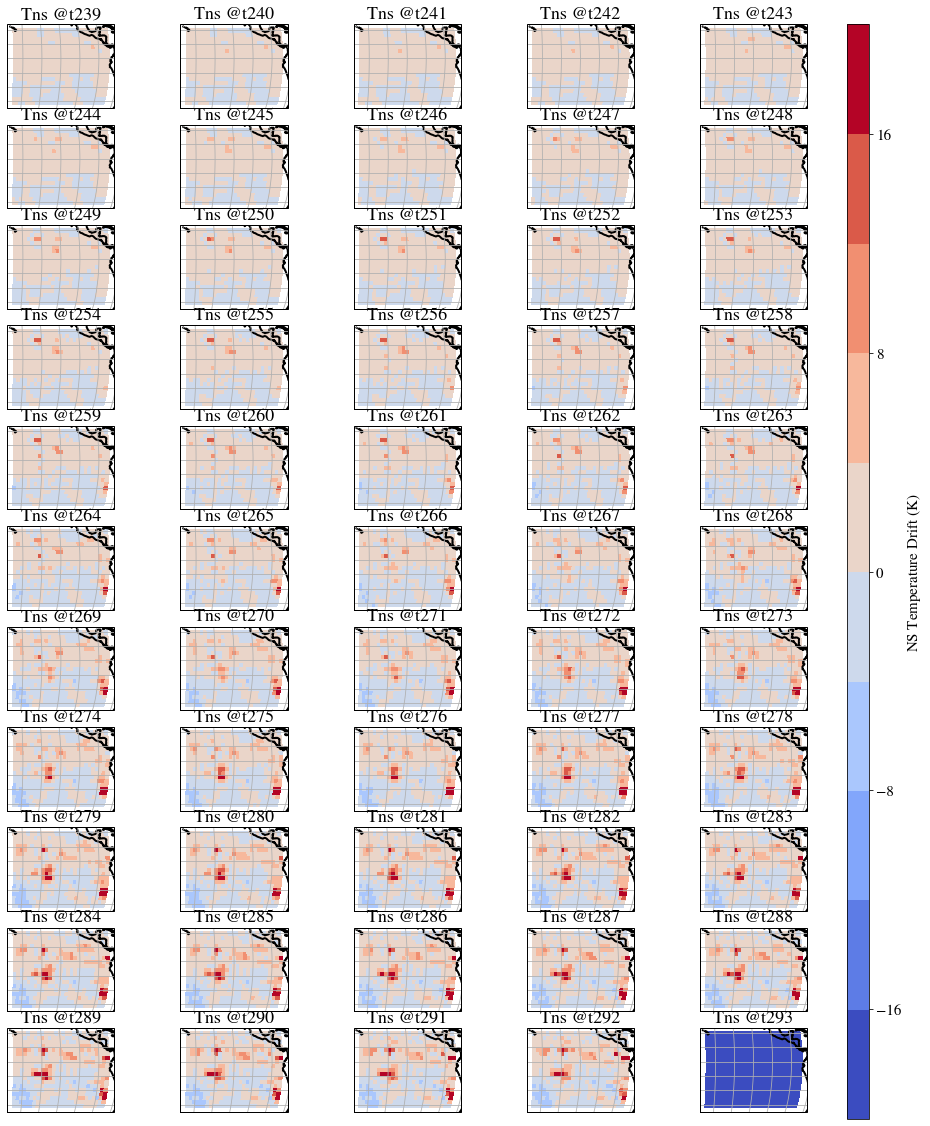

In [16]:
fig, ax = plt.subplots(11,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,20))

for iplot in range(55):
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = Sungrun['NNTBP'][iplot+239,-1,ilat_min:ilat_max,ilon_min:ilon_max].values-\
    MeanClim['T'][-1,ilat_min:ilat_max,ilon_min:ilon_max]
    imag = ax[irow,icol].pcolormesh(Sungrun['lon'][ilon_min:ilon_max],
                                    Sungrun['lat'][ilat_min:ilat_max],
                                    toplot,
                                transform=ccrs.PlateCarree(),
                               cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('Tns @t'+str(iplot+239),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="NS Temperature Drift "+r'$\left(\mathrm{K}\right)$', cax=cbar_ax)

# Check consistency between online tendencies and offline NN predictions

## Load Jerry's model

In [17]:
path_Jerry = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/AdaptedPreprocessing/Jerry_Bridges/'
path_J_h5 = ['specifich5/spehum','relativeh5/relhum']
path_J_norm = ['specific64/','relative64/']
path_J_loss = ['/fast/jerryl9/pythonNotebooks/forTom/AdaptedPreprocessing/specificHistory.txt',
              '/fast/jerryl9/pythonNotebooks/forTom/AdaptedPreprocessing/relativeHistory.txt']

path_div = [path_Jerry+path_J_norm[0]+'inp_div_Specific64.txt',
           path_Jerry+path_J_norm[1]+'inp_div_Relative64.txt']
path_sub = [path_Jerry+path_J_norm[0]+'inp_sub_Specific64.txt',
           path_Jerry+path_J_norm[1]+'inp_sub_Relative64.txt']
path_out = [path_Jerry+path_J_norm[0]+'out_scale_Specific64.txt',
            path_Jerry+path_J_norm[1]+'out_scale_Relative64.txt']

In [18]:
Inp_name = ['Q','RH']

MODELJ = {}

for iinput,inp in enumerate(path_J_h5):
    MODELJ[Inp_name[iinput]] = {}
    for dropout in range(5):
        MODELJ[Inp_name[iinput]][dropout] = {}
        for BN in (['True','False']):
            MODELJ[Inp_name[iinput]][dropout][BN] = \
            load_model(path_Jerry+inp+'_version_'+str(dropout)+'_'+BN+'.h5',compile=False)

In [19]:
## Load normalization and loss files for Jerry's case

SUB = {}; DIV = {}; OUT = {}

for iinp in range(2):
    DIV[iinp] = (pd.read_csv(path_div[iinp], sep=" ", header=None).values)[:,0]
    SUB[iinp] = (pd.read_csv(path_sub[iinp], sep=" ", header=None).values)[:,0]
    OUT[iinp] = (pd.read_csv(path_out[iinp], sep=" ", header=None).values)[:,0]

In [20]:
model = MODELJ['Q'][0]['False']

## Make predictions on "zoomed-in" map

Plot "True" heating tendency

In [21]:
vmin0 = -2e-4
vmax0 = 2e-4
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [22]:
dT_dt_tru = {}

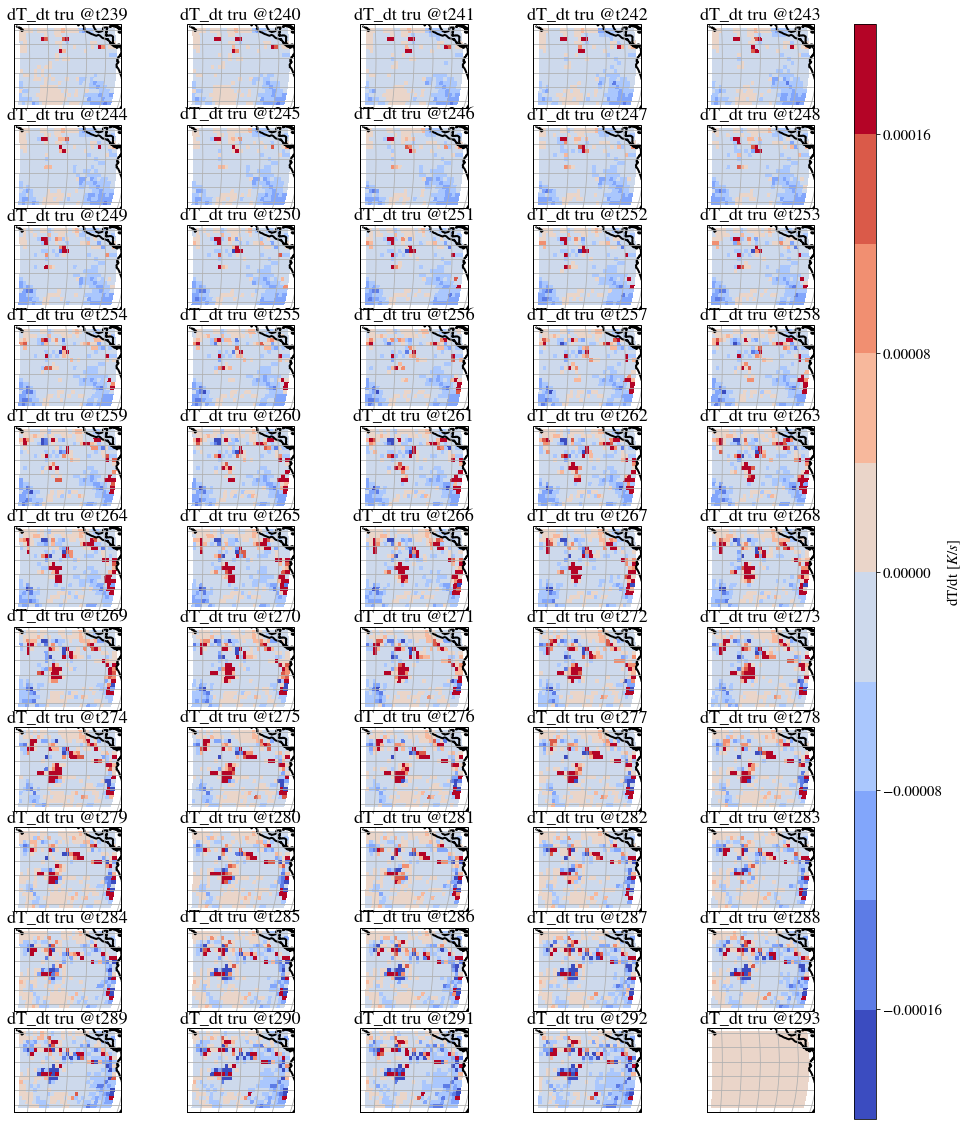

In [23]:
fig, ax = plt.subplots(11,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,20))

for iplot in range(55):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    dT_dt_tru[iplot] = Sungrun['TPHYSTND'][iplot+239,-1,ilat_min:ilat_max,ilon_min:ilon_max].values
    imag = ax[irow,icol].pcolormesh(Sungrun['lon'][ilon_min:ilon_max],
                                    Sungrun['lat'][ilat_min:ilat_max],
                                    dT_dt_tru[iplot],
                                transform=ccrs.PlateCarree(),
                                    cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('dT_dt tru @t'+str(iplot+239),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="dT/dt "+r'$\left[K/s\right]$', cax=cbar_ax)

In [24]:
dT_dt_tru[0].shape

(20, 28)

Make predictions

In [25]:
dT_dt = np.zeros((294,30,20,28))
dQ_dt = np.zeros((294,30,20,28))

In [26]:
for it in range(294):
    T = Sungrun['NNTBP'][it,:,ilat_min:ilat_max,ilon_min:ilon_max].values
    Q = Sungrun['NNQBP'][it,:,ilat_min:ilat_max,ilon_min:ilon_max].values
    PS = Sungrun['NNPS'][it,ilat_min:ilat_max,ilon_min:ilon_max].values
    S0 = Sungrun['SOLIN'][it,ilat_min:ilat_max,ilon_min:ilon_max].values
    SHF = Sungrun['NNSHF'][it,ilat_min:ilat_max,ilon_min:ilon_max].values
    LHF = Sungrun['NNLHF'][it,ilat_min:ilat_max,ilon_min:ilon_max].values
    
    T_norm = (T.T-SUB[0][:30])/DIV[0][:30]
    Q_norm = (Q.T-SUB[0][30:60])/DIV[0][30:60]
    PS_norm = np.expand_dims((PS.T-SUB[0][60])/DIV[0][60],axis=2)
    S0_norm = np.expand_dims((S0.T-SUB[0][61])/DIV[0][61],axis=2)
    SHF_norm = np.expand_dims((SHF.T-SUB[0][62])/DIV[0][62],axis=2)
    LHF_norm = np.expand_dims((LHF.T-SUB[0][63])/DIV[0][63],axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp)
    dT_dt[it,:,:,:] = np.reshape((oup[:,:30]/OUT[0][:30]).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dt[it,:,:,:] = np.reshape((oup[:,30:60]/OUT[0][30:60]).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

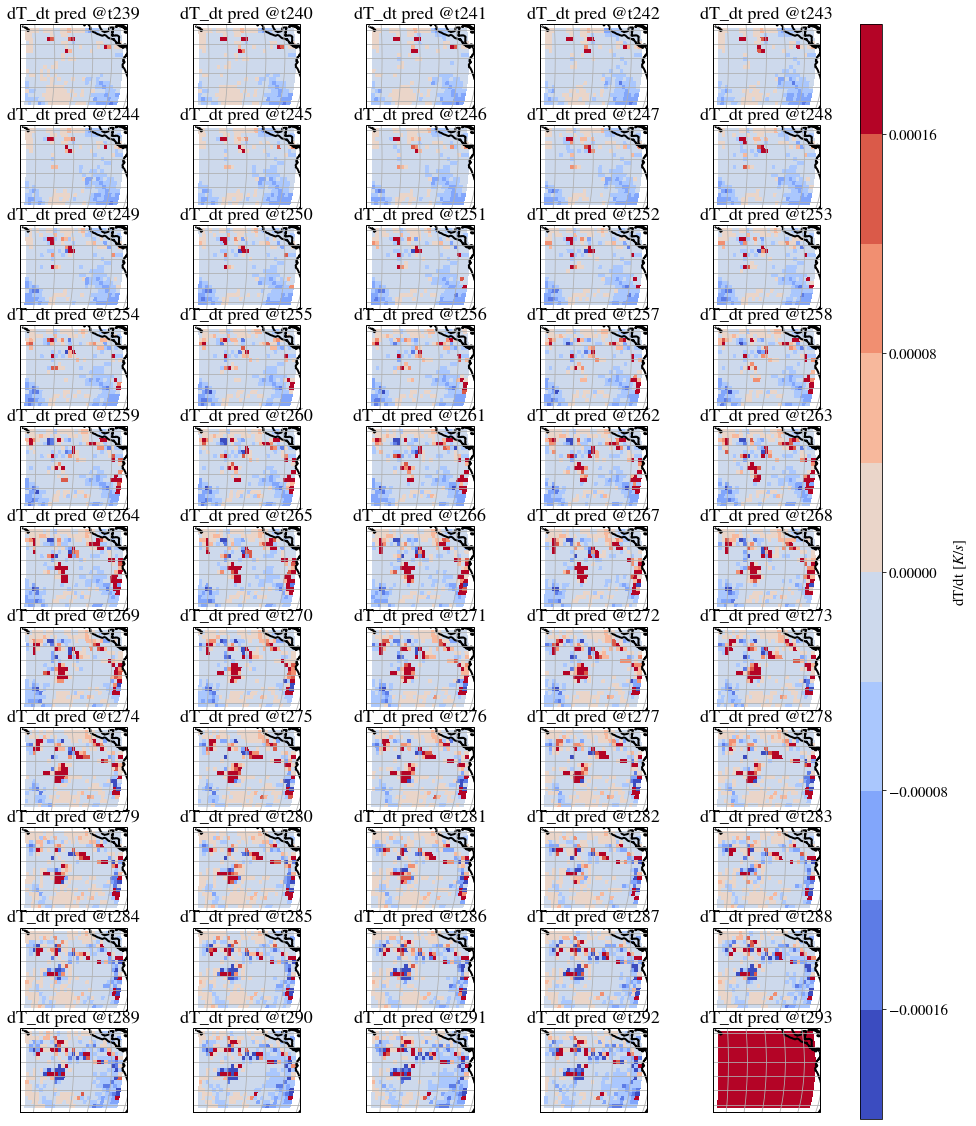

In [27]:
fig, ax = plt.subplots(11,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,20))

for iplot in range(55):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = dT_dt[iplot+239,-1,:,:]
    imag = ax[irow,icol].pcolormesh(Sungrun['lon'][ilon_min:ilon_max],
                                    Sungrun['lat'][ilat_min:ilat_max],
                                    toplot,
                                transform=ccrs.PlateCarree(),cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('dT_dt pred @t'+str(iplot+239),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="dT/dt "+r'$\left[K/s\right]$', cax=cbar_ax)

Plot difference between predictions and online values

In [28]:
vmin0 = -1e-6
vmax0 = 1e-6
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

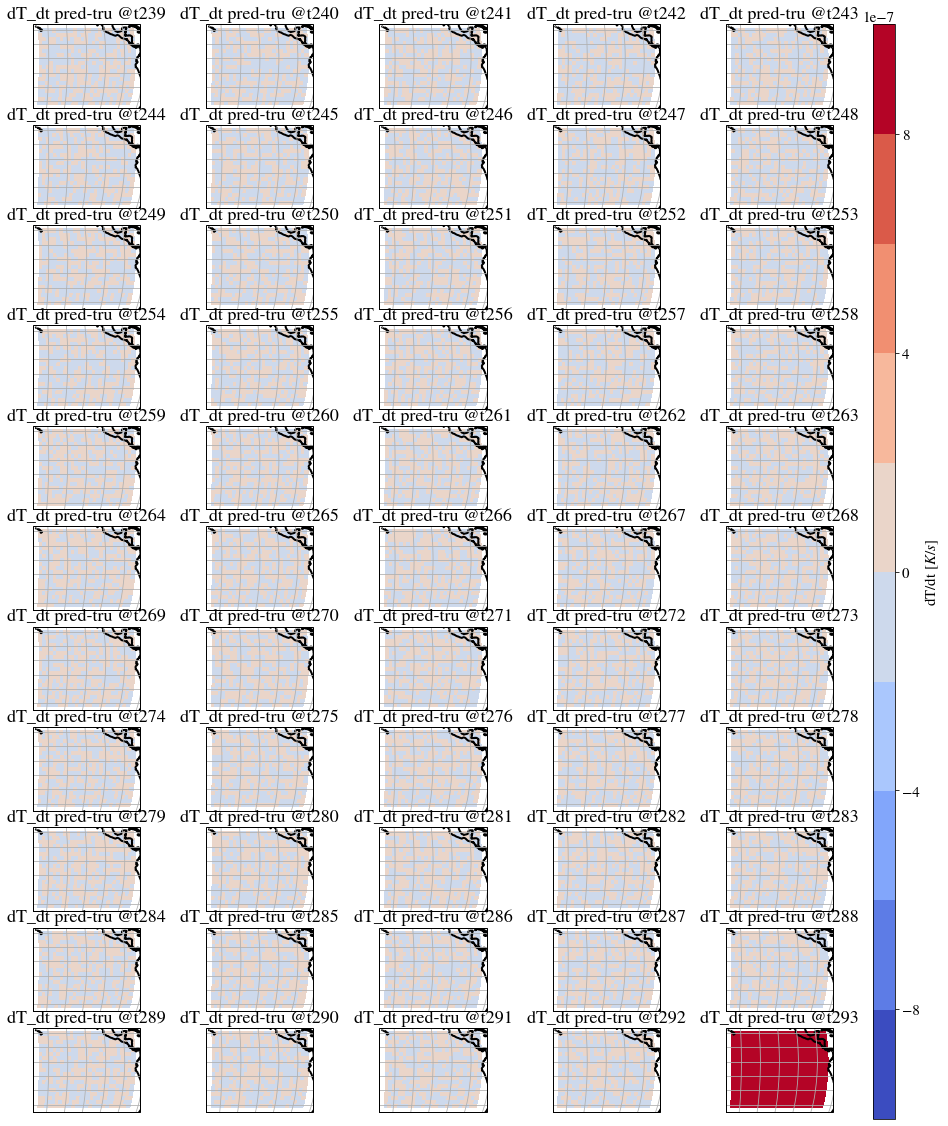

In [29]:
fig, ax = plt.subplots(11,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,20))

for iplot in range(55):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = dT_dt[iplot+239,-1,:,:]-Sungrun['TPHYSTND'][iplot+239,-1,ilat_min:ilat_max,ilon_min:ilon_max].values
    imag = ax[irow,icol].pcolormesh(Sungrun['lon'][ilon_min:ilon_max],
                                    Sungrun['lat'][ilat_min:ilat_max],
                                    toplot,
                                transform=ccrs.PlateCarree(),cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('dT_dt pred-tru @t'+str(iplot+239),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="dT/dt "+r'$\left[K/s\right]$', cax=cbar_ax)

In [30]:
mae = np.mean(np.abs(dT_dt-Sungrun['TPHYSTND'][:,:,ilat_min:ilat_max,ilon_min:ilon_max].values),axis=(2,3))
std_t = np.std(Sungrun['TPHYSTND'][:-1,:,ilat_min:ilat_max,ilon_min:ilon_max].values,axis=(1,2,3))
std_z = np.std(Sungrun['TPHYSTND'][:-1,:,ilat_min:ilat_max,ilon_min:ilon_max].values,axis=(0,2,3))
lev = Sungrun['lev'].values

Text(0.5, 1.0, 'MAE between offline NN and online TPHYSTND [std]')

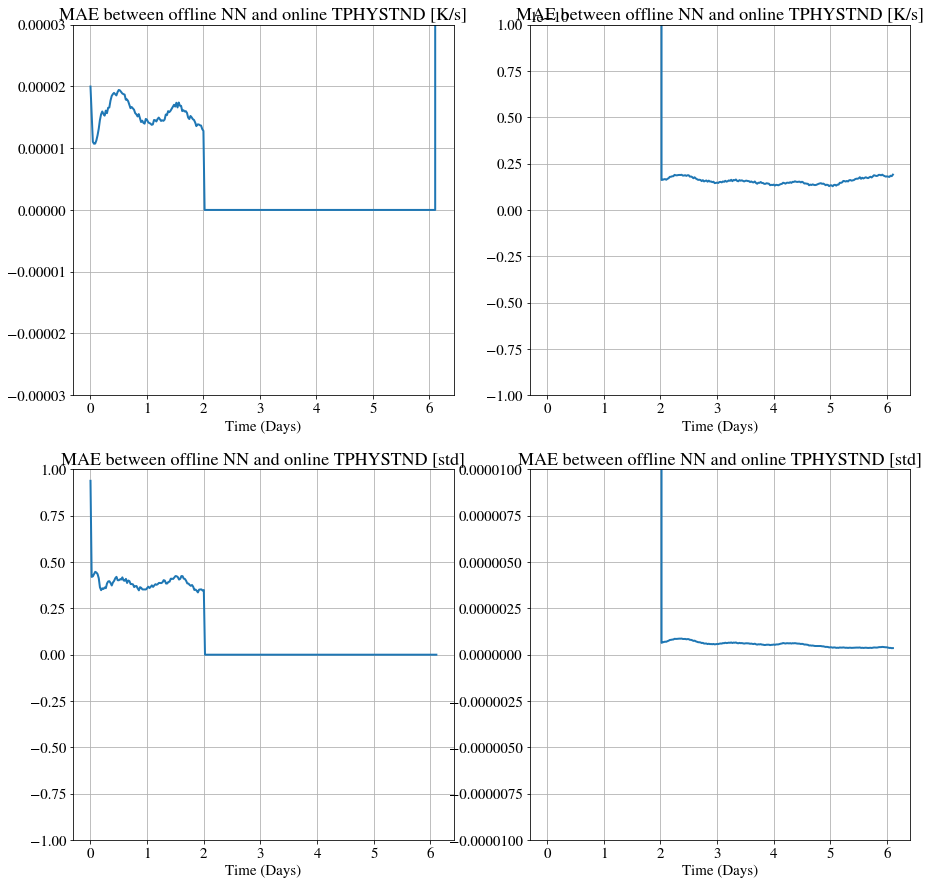

In [31]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].plot(xt[:mae.shape[0]]/48,np.mean(mae,axis=1))
ax[0,0].set_ylim((-3e-5,3e-5))
ax[0,0].grid()
ax[0,0].set_xlabel('Time (Days)')
ax[0,0].set_title('MAE between offline NN and online TPHYSTND [K/s]')

ax[0,1].plot(xt[:mae.shape[0]-1]/48,np.mean(mae[:-1],axis=1))
ax[0,1].set_ylim((-1e-10,1e-10))
ax[0,1].grid()
ax[0,1].set_xlabel('Time (Days)')
ax[0,1].set_title('MAE between offline NN and online TPHYSTND [K/s]')

ax[1,0].plot(xt[:mae.shape[0]-1]/48,np.mean(mae[:-1],axis=1)/std_t)
ax[1,0].set_ylim((-1,1))
ax[1,0].grid()
ax[1,0].set_xlabel('Time (Days)')
ax[1,0].set_title('MAE between offline NN and online TPHYSTND [std]')

ax[1,1].plot(xt[:mae.shape[0]-1]/48,np.mean(mae[:-1],axis=1)/std_t)
ax[1,1].set_ylim((-1e-5,1e-5))
ax[1,1].grid()
ax[1,1].set_xlabel('Time (Days)')
ax[1,1].set_title('MAE between offline NN and online TPHYSTND [std]')

Text(0.5, 1.0, 'MAE between offline NN and online TPHYSTND [std]')

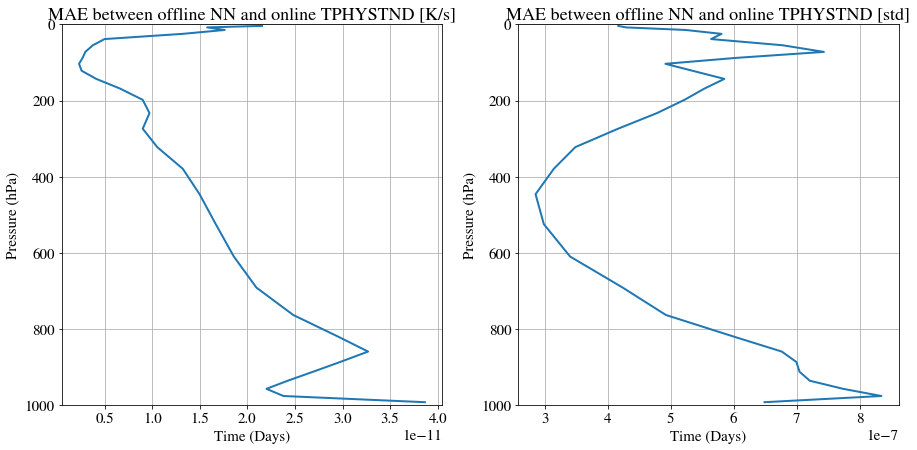

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(np.mean(mae[96:-1,:],axis=0),lev)
ax[0].set_ylim((1000,0))
ax[0].grid()
ax[0].set_xlabel('Time (Days)')
ax[0].set_ylabel('Pressure (hPa)')
ax[0].set_title('MAE between offline NN and online TPHYSTND [K/s]')

ax[1].plot(np.mean(mae[96:-1,:],axis=0)/std_z,lev)
ax[1].set_ylim((1000,0))
ax[1].grid()
ax[1].set_xlabel('Time (Days)')
ax[1].set_ylabel('Pressure (hPa)')
ax[1].set_title('MAE between offline NN and online TPHYSTND [std]')

There's really no difference after coupling (happening at 48hours) and before the blowup (last timestep), so the online wiring seems to be working well for this region. Let's check the consistency globally.

## Checking global consistency of dT/dt and dq/dt

### Make global predictions

In [33]:
dT_dt_prd = np.zeros((294,30,64,128))
dQ_dt_prd = np.zeros((294,30,64,128))

In [34]:
for it in range(294):
    
    print(it,'          ',end='\r')
    
    T = Sungrun['NNTBP'][it,:,:,:].values
    Q = Sungrun['NNQBP'][it,:,:,:].values
    PS = Sungrun['NNPS'][it,:,:].values
    S0 = Sungrun['SOLIN'][it,:,:].values
    SHF = Sungrun['NNSHF'][it,:,:].values
    LHF = Sungrun['NNLHF'][it,:,:].values
    
    T_norm = (T.T-SUB[0][:30])/DIV[0][:30]
    Q_norm = (Q.T-SUB[0][30:60])/DIV[0][30:60]
    PS_norm = np.expand_dims((PS.T-SUB[0][60])/DIV[0][60],axis=2)
    S0_norm = np.expand_dims((S0.T-SUB[0][61])/DIV[0][61],axis=2)
    SHF_norm = np.expand_dims((SHF.T-SUB[0][62])/DIV[0][62],axis=2)
    LHF_norm = np.expand_dims((LHF.T-SUB[0][63])/DIV[0][63],axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp)
    dT_dt_prd[it,:,:,:] = np.reshape((oup[:,:30]/OUT[0][:30]).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dt_prd[it,:,:,:] = np.reshape((oup[:,30:60]/OUT[0][30:60]).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

### dT/dt

In [35]:
mae_global = np.mean(np.abs(dT_dt_prd-Sungrun['TPHYSTND'].values),axis=(2,3))
STD_t = np.std(Sungrun['TPHYSTND'][:-1,:,:,:].values,axis=(1,2,3))
STD_z = np.std(Sungrun['TPHYSTND'][:-1,:,:,:].values,axis=(0,2,3))

Text(0.5, 1.0, 'MAE between off/on TPHYSTND [std]')

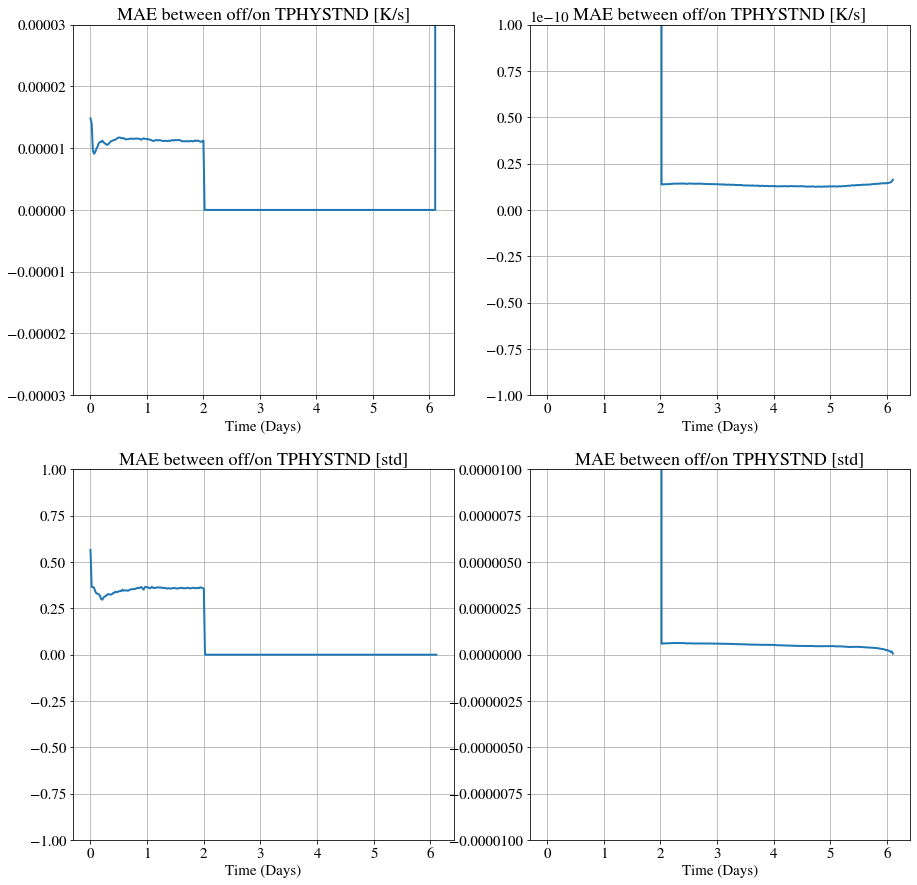

In [36]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].plot(xt[:mae_global.shape[0]]/48,np.mean(mae_global,axis=1))
ax[0,0].set_ylim((-3e-5,3e-5))
ax[0,0].grid()
ax[0,0].set_xlabel('Time (Days)')
ax[0,0].set_title('MAE between off/on TPHYSTND [K/s]')

ax[0,1].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1))
ax[0,1].set_ylim((-1e-10,1e-10))
ax[0,1].grid()
ax[0,1].set_xlabel('Time (Days)')
ax[0,1].set_title('MAE between off/on TPHYSTND [K/s]')

ax[1,0].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1)/STD_t)
ax[1,0].set_ylim((-1,1))
ax[1,0].grid()
ax[1,0].set_xlabel('Time (Days)')
ax[1,0].set_title('MAE between off/on TPHYSTND [std]')

ax[1,1].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1)/STD_t)
ax[1,1].set_ylim((-1e-5,1e-5))
ax[1,1].grid()
ax[1,1].set_xlabel('Time (Days)')
ax[1,1].set_title('MAE between off/on TPHYSTND [std]')

Text(0.5, 1.0, 'MAE between offline NN and online TPHYSTND [std]')

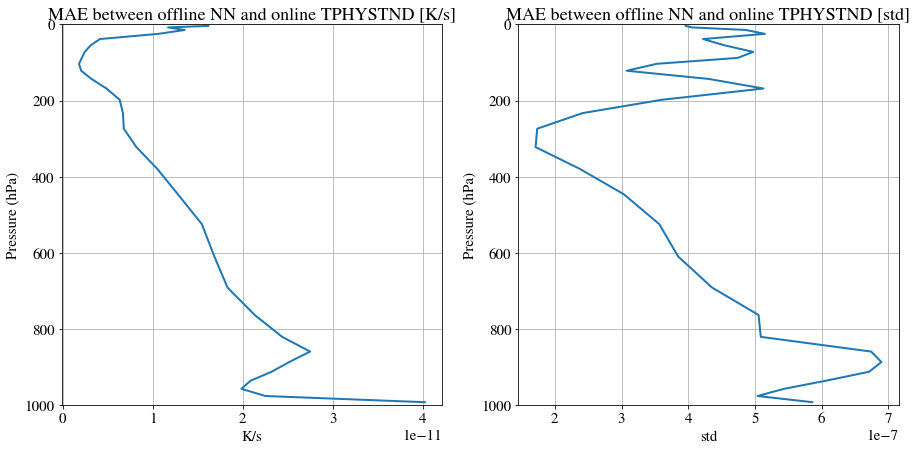

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(np.mean(mae_global[96:-1,:],axis=0),lev)
ax[0].set_ylim((1000,0))
ax[0].grid()
ax[0].set_xlabel('K/s')
ax[0].set_ylabel('Pressure (hPa)')
ax[0].set_title('MAE between offline NN and online TPHYSTND [K/s]')

ax[1].plot(np.mean(mae_global[96:-1,:],axis=0)/STD_z,lev)
ax[1].set_ylim((1000,0))
ax[1].grid()
ax[1].set_xlabel('std')
ax[1].set_ylabel('Pressure (hPa)')
ax[1].set_title('MAE between offline NN and online TPHYSTND [std]')

### dq/dt

In [38]:
mae_global = np.mean(np.abs(dQ_dt_prd-Sungrun['PHQ'].values),axis=(2,3))
STD_t = np.std(Sungrun['PHQ'][:-1,:,:,:].values,axis=(1,2,3))
STD_z = np.std(Sungrun['PHQ'][:-1,:,:,:].values,axis=(0,2,3))

/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


Text(0.5, 1.0, 'MAE off/on PHQ [std]')

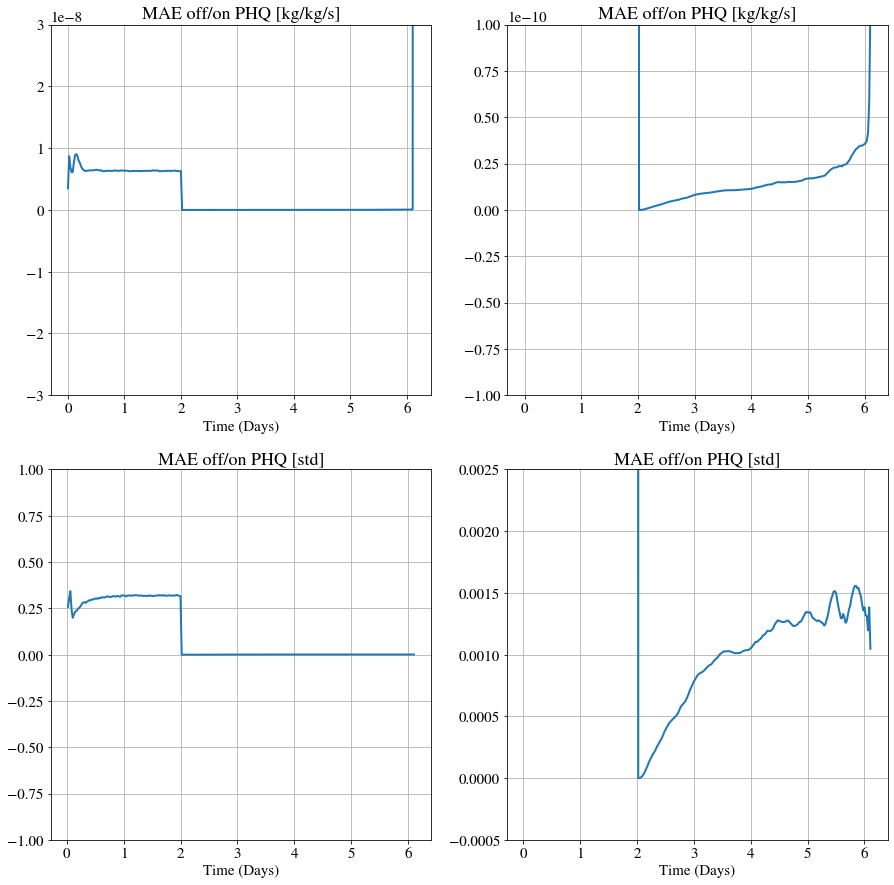

In [39]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].plot(xt[:mae_global.shape[0]]/48,np.mean(mae_global,axis=1))
ax[0,0].set_ylim((-3e-8,3e-8))
ax[0,0].grid()
ax[0,0].set_xlabel('Time (Days)')
ax[0,0].set_title('MAE off/on PHQ [kg/kg/s]')

ax[0,1].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1))
ax[0,1].set_ylim((-1e-10,1e-10))
ax[0,1].grid()
ax[0,1].set_xlabel('Time (Days)')
ax[0,1].set_title('MAE off/on PHQ [kg/kg/s]')

ax[1,0].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1)/STD_t)
ax[1,0].set_ylim((-1,1))
ax[1,0].grid()
ax[1,0].set_xlabel('Time (Days)')
ax[1,0].set_title('MAE off/on PHQ [std]')

ax[1,1].plot(xt[:mae_global.shape[0]-1]/48,np.mean(mae_global[:-1],axis=1)/STD_t)
ax[1,1].set_ylim((-0.5e-3,2.5e-3))
ax[1,1].grid()
ax[1,1].set_xlabel('Time (Days)')
ax[1,1].set_title('MAE off/on PHQ [std]')

Text(0.5, 1.0, 'MAE between offline NN and online PHQ [std]')

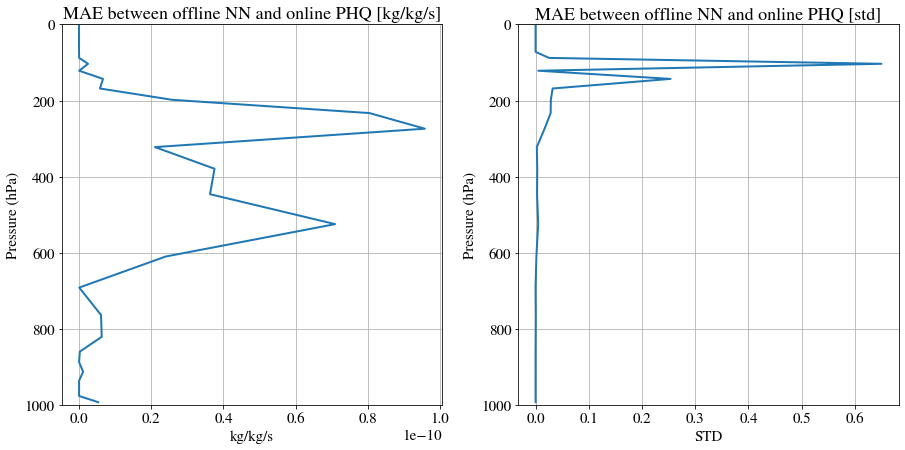

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(np.mean(mae_global[96:-1,:],axis=0),lev)
ax[0].set_ylim((1000,0))
ax[0].grid()
ax[0].set_xlabel('kg/kg/s')
ax[0].set_ylabel('Pressure (hPa)')
ax[0].set_title('MAE between offline NN and online PHQ [kg/kg/s]')

ax[1].plot(np.mean(mae_global[96:-1,:],axis=0)/STD_z,lev)
ax[1].set_ylim((1000,0))
ax[1].grid()
ax[1].set_xlabel('STD')
ax[1].set_ylabel('Pressure (hPa)')
ax[1].set_title('MAE between offline NN and online PHQ [std]')

Conclusion: While inconsistencies in dT/dt are minimal, inconsistencies in dq/dt are large enough that they can represent up to 0.3-0.6std in the upper atmosphere (given the very small variance at these levels)

We now explore whether the drift can be traced back to:   
- Offline predictions that are overly large   
- or this small "wiring" inconsistency

# Tracking the origin of the drift

## Calculate dT/dt and dq/dt anomalies compared to SP ref

SPRef does not have TPHYSTND, so we'll take the first two days of the simulation (during which SP is coupled) to estimate the "baseline" tendencies

In [41]:
TPHYSTND_ref = np.mean(Sungrun['TPHYSTND'][:96,:,:,:].values,axis=0)
PHQ_ref = np.mean(Sungrun['PHQ'][:96,:,:,:].values,axis=0)
T_ref = np.mean(Sungrun['NNTBP'][:96,:,:,:].values,axis=0)
Q_ref = np.mean(Sungrun['NNQBP'][:96,:,:,:].values,axis=0)

In [42]:
TPHYSTND_ano = Sungrun['TPHYSTND'].values-TPHYSTND_ref
PHQ_ano = Sungrun['PHQ'].values-PHQ_ref
# TPHYSTND_ano = dT_dt_prd-TPHYSTND_ref
# PHQ_ano = dQ_dt_prd-PHQ_ref
T_ano = Sungrun['NNTBP'].values-T_ref
Q_ano = Sungrun['NNQBP'].values-Q_ref

## Start with daily-averaged vertical profiles

In [43]:
dTdt_ano_day = np.zeros((6,30))
dQdt_ano_day = np.zeros((6,30))
T_ano_day = np.zeros((6,30))
Q_ano_day = np.zeros((6,30))

In [44]:
for iday in range(6):
    dTdt_ano_day[iday,:] = np.mean(TPHYSTND_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))
    dQdt_ano_day[iday,:] = np.mean(PHQ_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))
    T_ano_day[iday,:] = np.mean(T_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))
    Q_ano_day[iday,:] = np.mean(Q_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))

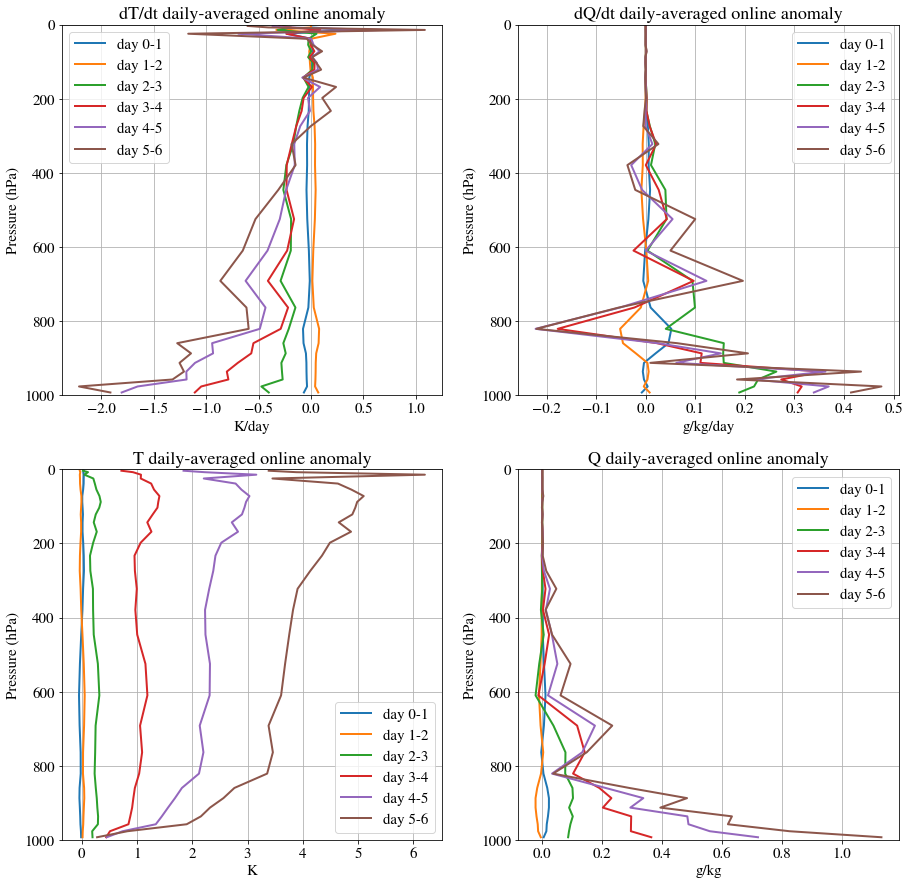

In [45]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for iday in range(6):
    ax[0,0].plot(24*3600*dTdt_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for iday in range(6):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
ax[0,1].legend()

for iday in range(6):
    ax[1,0].plot(T_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for iday in range(6):
    ax[1,1].plot(1e3*Q_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

- The NN-predicted TPHYSTND mostly has a stabilizing effect except for the second level starting from the top where the NN seems to be driving an anomaly at ~1K/day, which is the observed drift       
- However, on the PHQ side, the NN is amplifying the anomaly at more than ~0.2g/kg/day, which is enough to explain the climate drift    

## Would Tom's NN have led to the same lower-tropospheric Q + stratospheric T instability?

### Load Tom's models

In [46]:
path_data = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
path_array = {}
path_array['cold'] = [path_data+'2021_03_18_O3_TRAIN_M4K_shuffle.nc',
                      path_data+'2021_03_18_O3_VALID_M4K.nc',
                      path_data+'2021_03_18_O3_TEST_M4K.nc']
path_array['hot'] = [path_data+'2021_03_18_O3_TRAIN_P4K_shuffle.nc',
                     path_data+'2021_03_18_O3_VALID_P4K.nc',
                     path_data+'2021_03_18_O3_TEST_P4K.nc']
path_array['both'] = [path_data+'2022_04_18_TRAIN_M4K_P4K_shuffle.nc',
                      path_data+'2022_04_18_VALID_M4K_P4K.nc',
                      path_data+'2022_04_18_TEST_M4K_P4K.nc']
path_array['medium'] = [path_data+'2021_01_24_O3_TRAIN_shuffle.nc',
                        path_data+'2021_01_24_O3_VALID.nc',
                        path_data+'2021_01_24_O3_TEST.nc']
path_Tom = ['/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2021_04_26_NN.hdf5',
            '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2021_06_13_NN_RH.hdf5']
path_input_norm = path_data + '2021_01_24_NORM_O3_small.nc'
path_norm_RH = path_data + '2021_02_01_NORM_O3_RH_small.nc'
scale_dict = pickle.load(open(path_data+'009_Wm2_scaling.pkl','rb'))
scale_dict_RH = scale_dict.copy()
scale_dict_RH['RH'] = 0.01*L_S/G, # Arbitrary 0.1 factor as specific humidity is generally below 2%
path_train_RH = path_data + '2021_01_24_O3_small_shuffle.nc'
path_norm_BMSE = path_data + '2021_06_16_NORM_BMSE_small.nc'
path_train_BMSE = path_data + '2021_06_16_BMSE_small_shuffle.nc'
path_norm_LHF_nsDELQ = path_data + '2021_02_01_NORM_O3_LHF_nsDELQ_small.nc'
path_train_LHF_nsDELQ = path_data + '2021_02_01_O3_LHF_nsQ_small_shuffle.nc'
in_vars = ['QBP','TBP','PS','SOLIN','SHFLX','LHFLX'] # We take the large-scale climate state as inputs
out_vars = ['PHQ','TPHYSTND','QRL','QRS'] # and we output the response of clouds/storms to these climate conditions

In [47]:
model_tom = load_model(path_Tom[0],compile=False)

In [50]:
def train_gen_rescaling(input_rescaling,path_norm,path_train,scale_dict):
    return DataGeneratorCI(
        data_fn = path_train,
        input_vars = input_rescaling,
        output_vars = out_vars,
        norm_fn = path_norm,
        input_transform = ('mean', 'maxrs'),
        output_transform = scale_dict)

In [51]:
train_gen_norm = train_gen_rescaling(['QBP','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX'],
                                    path_input_norm,path_array['cold'][0],scale_dict)

In [52]:
sub = train_gen_norm.input_transform.sub
div = train_gen_norm.input_transform.div

In [53]:
subQ = sub[:30]; divQ = div[:30]
subT = sub[30:60]; divT = div[30:60]
subPS = sub[60]; divPS = div[60]
subS0 = sub[61]; divS0 = div[61]
subSHF = sub[62]; divSHF = div[62]
subLHF = sub[63]; divLHF = div[63]

### Make global predictions

In [54]:
dT_dtom_prd = np.zeros((294,30,64,128))
dQ_dtom_prd = np.zeros((294,30,64,128))

In [73]:
for it in range(294):
    
    print(it,'          ',end='\r')
    
    T = Sungrun['NNTBP'][it,:,:,:].values
    Q = Sungrun['NNQBP'][it,:,:,:].values
    PS = Sungrun['NNPS'][it,:,:].values
    S0 = Sungrun['SOLIN'][it,:,:].values
    SHF = Sungrun['NNSHF'][it,:,:].values
    LHF = Sungrun['NNLHF'][it,:,:].values
    
    T_norm = (T.T-subT)/divT
    Q_norm = (Q.T-subQ)/divQ
    PS_norm = np.expand_dims((PS.T-subPS)/divPS,axis=2)
    S0_norm = np.expand_dims((S0.T-subS0)/divS0,axis=2)
    SHF_norm = np.expand_dims((SHF.T-subSHF)/divSHF,axis=2)
    LHF_norm = np.expand_dims((LHF.T-subLHF)/divLHF,axis=2)
    
    inp = np.concatenate((Q_norm,T_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model_tom.predict_on_batch(inp)
    dT_dtom_prd[it,:,:,:] = np.reshape((oup[:,30:60]/scale_dict['TPHYSTND']).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dtom_prd[it,:,:,:] = np.reshape((oup[:,:30]/scale_dict['PHQ']).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

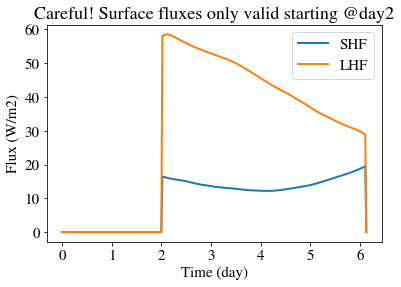

In [57]:
plt.plot(xt[:294]/48,np.mean(Sungrun['NNSHF'].values,axis=(1,2)),label='SHF')
plt.plot(xt[:294]/48,np.mean(Sungrun['NNLHF'].values,axis=(1,2)),label='LHF')
plt.legend();
plt.xlabel('Time (day)')
plt.ylabel('Flux (W/m2)')
plt.title('Careful! Surface fluxes only valid starting @day2');

### Calculate daily anomalies

In [74]:
TPHYSTNDtom_ano = dT_dtom_prd-TPHYSTND_ref
PHQtom_ano = dQ_dtom_prd-PHQ_ref

In [75]:
dTdtom_ano_day = np.zeros((6,30))
dQdtom_ano_day = np.zeros((6,30))

In [76]:
for iday in range(6):
    dTdtom_ano_day[iday,:] = np.mean(TPHYSTNDtom_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))
    dQdtom_ano_day[iday,:] = np.mean(PHQtom_ano[48*iday:48*(iday+1),:,:,:],axis=(0,2,3))

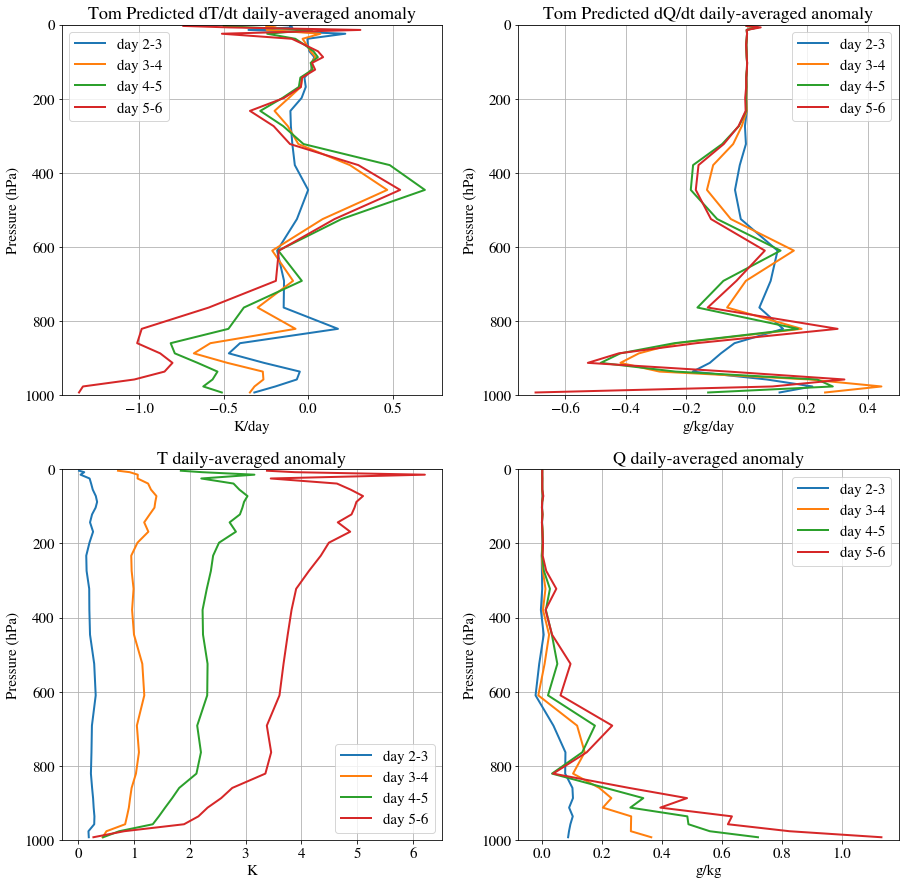

In [82]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for iday in np.arange(2,6):
    ax[0,0].plot(24*3600*dTdtom_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('Tom Predicted dT/dt daily-averaged anomaly')
ax[0,0].legend()

for iday in np.arange(2,6):
    ax[0,1].plot(1e3*24*3600*dQdtom_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('Tom Predicted dQ/dt daily-averaged anomaly')
ax[0,1].legend()

for iday in np.arange(2,6):
    ax[1,0].plot(T_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged anomaly')
ax[1,0].legend()

for iday in np.arange(2,6):
    ax[1,1].plot(1e3*Q_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1))
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged anomaly')
ax[1,1].legend()

It looks like the response is indeed quite different: No amplification of the stratospheric T anomaly & overall drying effect to counteract the moist anomaly rather than amplifying it. So this was likely an unstable lower-tropospheric mode of Jerry's network, potentially linked to the little weight that Jerry's loss has on lower-tropospheric moisture. 

Let's plot the two anomalies together to confirm:

In [101]:
cmap = ['lime','mediumturquoise','mediumblue','k']

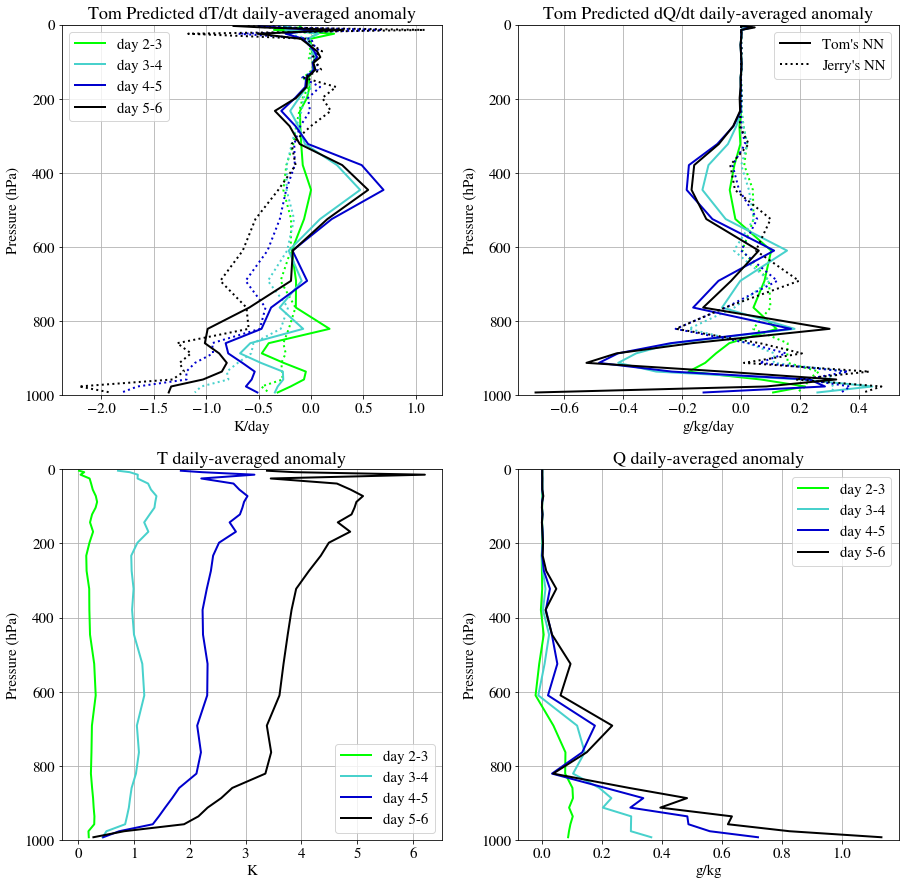

In [105]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for iday in np.arange(2,6):
    ax[0,0].plot(24*3600*dTdtom_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1),color=cmap[iday-2])
    ax[0,0].plot(24*3600*dTdt_ano_day[iday,:],lev,linestyle=':',color=cmap[iday-2])
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('Tom Predicted dT/dt daily-averaged anomaly')
ax[0,0].legend()

for iday in np.arange(2,6):
    if iday==5:
        label_tom = "Tom's NN"; label_jerry = "Jerry's NN"
    else: label_tom = ''; label_jerry = '';
    LIN = ax[0,1].plot(1e3*24*3600*dQdtom_ano_day[iday,:],lev,label=label_tom,color=cmap[iday-2])
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[iday,:],lev,label=label_jerry,linestyle=':',color=cmap[iday-2])
    
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('Tom Predicted dQ/dt daily-averaged anomaly')
ax[0,1].legend()

for iday in np.arange(2,6):
    ax[1,0].plot(T_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1),color=cmap[iday-2])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged anomaly')
ax[1,0].legend()

for iday in np.arange(2,6):
    ax[1,1].plot(1e3*Q_ano_day[iday,:],lev,label='day '+str(iday)+'-'+str(iday+1),color=cmap[iday-2])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged anomaly')
ax[1,1].legend()

# Repeat analysis for Jerry's preliminary runs

## Debugging first RH runs of August 4th 2022

### Initialization

In [28]:
path_folder = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/June2022_CI_Runs/'
path_repeat = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/June2022_CI_Runs/specificNN_m4k_repeat//spehum_version_0_False/'
path_Jerry = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/AdaptedPreprocessing/Jerry_Bridges/'
path_J_h5 = ['specifich5/spehum','relativeh5/relhum']
path_J_norm = ['specific64/','relative64/']
path_J_loss = ['/fast/jerryl9/pythonNotebooks/forTom/AdaptedPreprocessing/specificHistory.txt',
              '/fast/jerryl9/pythonNotebooks/forTom/AdaptedPreprocessing/relativeHistory.txt']
path_div = [path_Jerry+path_J_norm[0]+'inp_div_Specific64.txt',
           path_Jerry+path_J_norm[1]+'inp_div_Relative64.txt']
path_sub = [path_Jerry+path_J_norm[0]+'inp_sub_Specific64.txt',
           path_Jerry+path_J_norm[1]+'inp_sub_Relative64.txt']
path_out = [path_Jerry+path_J_norm[0]+'out_scale_Specific64.txt',
            path_Jerry+path_J_norm[1]+'out_scale_Relative64.txt']
path_txt = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/TXT_DATA/'
path_sub_tom = path_txt + 'inp_sub_Specificm4K.txt'
path_div_tom = path_txt + 'inp_div_Specificm4K.txt'
path_out_tom = path_txt + 'out_scale_Specificm4K.txt'

path_data = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
path_array = {}
path_array['cold'] = [path_data+'2021_03_18_O3_TRAIN_M4K_shuffle.nc',
                      path_data+'2021_03_18_O3_VALID_M4K.nc',
                      path_data+'2021_03_18_O3_TEST_M4K.nc']
path_array['hot'] = [path_data+'2021_03_18_O3_TRAIN_P4K_shuffle.nc',
                     path_data+'2021_03_18_O3_VALID_P4K.nc',
                     path_data+'2021_03_18_O3_TEST_P4K.nc']
path_array['both'] = [path_data+'2022_04_18_TRAIN_M4K_P4K_shuffle.nc',
                      path_data+'2022_04_18_VALID_M4K_P4K.nc',
                      path_data+'2022_04_18_TEST_M4K_P4K.nc']
path_array['medium'] = [path_data+'2021_01_24_O3_TRAIN_shuffle.nc',
                        path_data+'2021_01_24_O3_VALID.nc',
                        path_data+'2021_01_24_O3_TEST.nc']
path_Tom = ['/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2021_04_26_NN.hdf5',
            '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2021_06_13_NN_RH.hdf5']
path_input_norm = path_data + '2021_01_24_NORM_O3_small.nc'
path_norm_RH = path_data + '2021_02_01_NORM_O3_RH_small.nc'
scale_dict = pickle.load(open(path_data+'009_Wm2_scaling.pkl','rb'))
scale_dict_RH = scale_dict.copy()
scale_dict_RH['RH'] = 0.01*L_S/G, # Arbitrary 0.1 factor as specific humidity is generally below 2%
path_train_RH = path_data + '2021_01_24_O3_small_shuffle.nc'
path_norm_BMSE = path_data + '2021_06_16_NORM_BMSE_small.nc'
path_train_BMSE = path_data + '2021_06_16_BMSE_small_shuffle.nc'
path_norm_LHF_nsDELQ = path_data + '2021_02_01_NORM_O3_LHF_nsDELQ_small.nc'
path_train_LHF_nsDELQ = path_data + '2021_02_01_O3_LHF_nsQ_small_shuffle.nc'
in_vars = ['QBP','TBP','PS','SOLIN','SHFLX','LHFLX'] # We take the large-scale climate state as inputs
out_vars = ['PHQ','TPHYSTND','QRL','QRS'] # and we output the response of clouds/storms to these climate conditions
path_1year = path_data + '2022_08_01_TRAIN_M4K_First_Year.nc'
path_8months = path_data + '2022_08_01_TRAIN_M4K_First_Eight_Months.nc'
path_RH = [path_data+'2022_08_03_TRAIN_For_Jerry_RH_m4K.nc',path_data+'2022_08_03_VALID_For_Jerry_RH_m4K.nc']

In [29]:
in_vars = ['TBP','RH','PS','SOLIN','SHFLX','LHFLX'] # We take the large-scale climate state as inputs
out_vars = ['TPHYSTND','PHQ'] # and we output the response of clouds/storms to these climate conditions

def Generator_singleDS(path,rescaling=None):
    
    in_vars = ['TBP','RH','PS','SOLIN','SHFLX','LHFLX'] # We take the large-scale climate state as inputs
    out_vars = ['TPHYSTND','PHQ'] # and we output the response of clouds/storms to these climate conditionspath_input_norm = path_data + '2021_01_24_NORM_O3_small.nc'
    scale_dict = pickle.load(open(path_data+'009_Wm2_scaling.pkl','rb'))
    
    if rescaling=='CI':
        gen = DataGeneratorCI(
        data_fn = path,
        input_vars = in_vars,
        output_vars = out_vars,
        norm_fn = path_norm_RH,
        batch_size=8192,
        input_transform = ('mean', 'maxrs'),
        output_transform = scale_dict,
        Qscaling = 'RH',
        Tscaling = 'BMSE',
        LHFscaling = 'LHF_nsDELQ',
        hyam=hyam, hybm=hybm, # Arrays to define mid-levels of hybrid vertical coordinate
        inp_sub_Qscaling=train_gen_RH.input_transform.sub, # What to subtract from RH inputs
        inp_div_Qscaling=train_gen_RH.input_transform.div, # What to divide RH inputs by
        inp_sub_Tscaling=train_gen_BMSE.input_transform.sub,
        inp_div_Tscaling=train_gen_BMSE.input_transform.div,
        inp_sub_LHFscaling=train_gen_LHF_nsDELQ.input_transform.sub,
        inp_div_LHFscaling=train_gen_LHF_nsDELQ.input_transform.div
        ) 
    else:
        gen = DataGeneratorCI(
        data_fn = path,
        input_vars = in_vars,
        output_vars = out_vars,
        norm_fn = path_norm_RH,
        batch_size=8192,
        input_transform = ('mean', 'maxrs'),
        output_transform = scale_dict
        )

    return gen 



In [30]:
TrainRHgen = Generator_singleDS(path_RH[0])
ValidRHgen = Generator_singleDS(path_RH[1])

In [31]:
def RHTom(T,qv,P0,PS,hyam,hybm):
    R = 287
    Rv = 461
    p = np.reshape(np.outer(hyam*P0,PS**0)+np.outer(hybm,PS),qv.shape)

    return Rv*p*qv/(R*esat(T))
def esat(T):
    T0 = 273.16
    T00 = 253.16
    omega = np.maximum(0,np.minimum(1,(T-T00)/(T0-T00)))

    return (T>T0)*eliq(T)+(T<T00)*eice(T)+(T<=T0)*(T>=T00)*(omega*eliq(T)+(1-omega)*eice(T))
def eliq(T):
    a_liq = np.array([-0.976195544e-15,-0.952447341e-13,0.640689451e-10,0.206739458e-7,0.302950461e-5,0.264847430e-3,0.142986287e-1,0.443987641,6.11239921]);
    c_liq = -80
    T0 = 273.16
    return 100*np.polyval(a_liq,np.maximum(c_liq,T-T0))
def eice(T):
    a_ice = np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,0.602588177e-7,0.615021634e-5,0.420895665e-3,0.188439774e-1,0.503160820,6.11147274]);
    c_ice = np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07])
    T0 = 273.16
    return (T>c_ice[0])*eliq(T)+\
(T<=c_ice[0])*(T>c_ice[1])*100*np.polyval(a_ice,T-T0)+\
(T<=c_ice[1])*100*(c_ice[3]+np.maximum(c_ice[2],T-T0)*(c_ice[4]+np.maximum(c_ice[2],T-T0)*c_ice[5]))

In [ ]:
def polyval(coefficients, x):
    total = 0
    for coeff in range(len(coefficients)):
        total = total + coefficients[-(coeff+1)]*(x**coeff)
    return np.float32(total)

def eliq(T):
    a_liq = np.float32(np.array([-0.976195544e-15,-0.952447341e-13,\
                                 0.640689451e-10,\
                      0.206739458e-7,0.302950461e-5,0.264847430e-3,\
                      0.142986287e-1,0.443987641,6.11239921]));
    c_liq = np.float32(-80.0)
    T0 = np.float32(273.16)
    return np.float32(100.0)*polyval(a_liq,np.maximum(c_liq,T-T0))

def eiceOriginal(T):
    a_ice = np.float32(np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,\
                      0.602588177e-7,0.615021634e-5,0.420895665e-3,\
                      0.188439774e-1,0.503160820,6.11147274]));
    c_ice = np.float32(np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07]))
    T0 = np.float32(273.16)
    return np.transpose(np.where(T>c_ice[0],eliq(T),\
                   np.transpose(np.where(T<=c_ice[1],np.float32(100.0)*(c_ice[3]+np.maximum(c_ice[2],T-T0)*\
                   (c_ice[4]+np.maximum(c_ice[2],T-T0)*c_ice[5])),\
                           np.float32(100.0)*polyval(a_ice,T-T0)))))

def eice(T):
    a_ice = np.float32(np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,\
                      0.602588177e-7,0.615021634e-5,0.420895665e-3,\
                      0.188439774e-1,0.503160820,6.11147274]));
    c_ice = np.float32(np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07]))
    T0 = np.float32(273.16)
    return np.where(T>c_ice[0],eliq(T),\
                   np.where(T<=c_ice[1],np.float32(100.0)*(c_ice[3]+np.maximum(c_ice[2],T-T0)*\
                   (c_ice[4]+np.maximum(c_ice[2],T-T0)*c_ice[5])),\
                           np.float32(100.0)*polyval(a_ice,T-T0)))

def esatOriginal(T):
    T0 = np.float32(273.16)
    T00 = np.float32(253.16)
    omtmp = (T-T00)/(T0-T00)
    omega = np.maximum(np.float32(0.0),np.minimum(np.float32(1.0),omtmp))
    return np.transpose(np.where(T>T0,eliq(T),np.transpose(np.where(T<T00,eice(T),(omega*eliq(T)+(1-omega)*eice(T))))))

def esat(T):
    T0 = np.float32(273.16)
    T00 = np.float32(253.16)
    omtmp = (T-T00)/(T0-T00)
    omega = np.maximum(np.float32(0.0),np.minimum(np.float32(1.0),omtmp))
    return np.where(T>T0,eliq(T),np.where(T<T00,eice(T),(omega*eliq(T)+(1-omega)*eice(T))))

def qv(T,RH,P0,PS,hyam,hybm):

    R = np.float32(287.0)
    Rv = np.float32(461.0)
    p = P0 * hyam + PS[:, None] * hybm # Total pressure (Pa)

    T = np.float32(T)
    RH = np.float32(RH)
    p = np.float32(p)

    return R*esat(T)*RH/(Rv*p)
    # DEBUG 1
    # return esat(T)

def RHJerry(T,qv,P0,PS,hyam,hybm):
    R = np.float32(287.0)
    Rv = np.float32(461.0)
    #p = P0 * hyam + PS[:, None] * hybm # Total pressure (Pa)

    p = np.reshape(np.outer(hyam*P0,PS**0)+np.outer(hybm,PS),qv.shape)
    T = np.float32(T)
    qv = np.float32(qv)
    p = np.float32(p)
    
    return Rv*p*qv/(R*esat(T))

In [32]:
save_name = '2022_08_03_NN_RH_m4K'
save_name1 = '2022_08_08_NN_RH_CLR_m4K'
path_HDF5 = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/HDF5_DATA/'
path_model = path_HDF5+save_name+'.hdf5'
path_model1 = path_HDF5+save_name1+'.hdf5'

In [33]:
model = load_model(path_model)
model.load_weights(path_model1)

In [291]:
TrainRHgen[0][0].shape

(8192, 64)

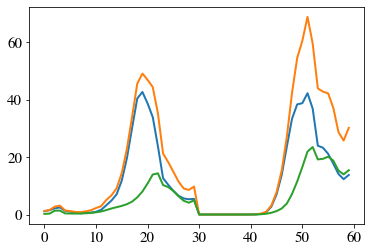

In [36]:
plt.plot(np.std(model.predict_on_batch(TrainRHgen[0][0]).numpy(),axis=0))
plt.plot(np.std(TrainRHgen[0][1],axis=0))
plt.plot(np.mean(np.abs(model.predict_on_batch(TrainRHgen[0][0]).numpy()-TrainRHgen[0][1]),axis=0))

### Make offline predictions and check consistency of RH implementation

In [37]:
run = JRH_1run

In [38]:
path_txt = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/TXT_DATA/'
path_sub = path_txt + 'inp_sub_Relativem4K.txt'
path_div = path_txt + 'inp_div_Relativem4K.txt'
path_out = path_txt + 'out_scale_Relativem4K.txt'

In [39]:
DIVT = (pd.read_csv(path_div, sep=" ", header=None).values)[:,0]
SUBT = (pd.read_csv(path_sub, sep=" ", header=None).values)[:,0]
OUTT = (pd.read_csv(path_out, sep=" ", header=None).values)[:,0]

In [40]:
sub = TrainRHgen.input_transform.sub
div = TrainRHgen.input_transform.div
subQ = sub[30:60]; divQ = div[30:60]
subT = sub[:30]; divT = div[:30]
subPS = sub[60]; divPS = div[60]
subS0 = sub[61]; divS0 = div[61]
subSHF = sub[62]; divSHF = div[62]
subLHF = sub[63]; divLHF = div[63]

In [41]:
dT_dtom_prd = np.zeros((run['NNTBP'].shape[0],30,64,128))
dQ_dtom_prd = np.zeros((run['NNTBP'].shape[0],30,64,128))

In [42]:
### Make global predictions

for it in range(300):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    RH0 = RHTom(T,Q,P0,PS,hyam,hybm)
    #RH1 = RHJerry(T,Q,P0,PS,hyam,hybm)

    T_norm = (T.T-subT)/divT
    Q_norm = (RH0.T-subQ)/divQ
    PS_norm = np.expand_dims((PS.T-subPS)/divPS,axis=2)
    S0_norm = np.expand_dims((S0.T-subS0)/divS0,axis=2)
    SHF_norm = np.expand_dims((SHF.T-subSHF)/divSHF,axis=2)
    LHF_norm = np.expand_dims((LHF.T-subLHF)/divLHF,axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dtom_prd[it,:,:,:] = np.reshape((oup[:,:30]/scale_dict['TPHYSTND']).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dtom_prd[it,:,:,:] = np.reshape((oup[:,30:60]/scale_dict['PHQ']).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

IndexError: Index is not smaller than dimension 200 >= 200

In [299]:
dT_dtJ_prd = np.zeros((run['NNTBP'].shape[0],30,64,128))
dQ_dtJ_prd = np.zeros((run['NNTBP'].shape[0],30,64,128))

In [311]:
### Make global predictions

for it in range(300):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    #RH0 = RHTom(T,Q,P0,PS,hyam,hybm)
    RH1 = RHJerry(T,Q,P0,PS,hyam,hybm)

    T_norm = (T.T-subT)/divT
    Q_norm = (RH1.T-subQ)/divQ
    PS_norm = np.expand_dims((PS.T-subPS)/divPS,axis=2)
    S0_norm = np.expand_dims((S0.T-subS0)/divS0,axis=2)
    SHF_norm = np.expand_dims((SHF.T-subSHF)/divSHF,axis=2)
    LHF_norm = np.expand_dims((LHF.T-subLHF)/divLHF,axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dtJ_prd[it,:,:,:] = np.reshape((oup[:,:30]/scale_dict['TPHYSTND']).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dtJ_prd[it,:,:,:] = np.reshape((oup[:,30:60]/scale_dict['PHQ']).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [97]:
istart = 48
iend = 58

Text(0.5, 0.98, 'Timestep 48 to 58')

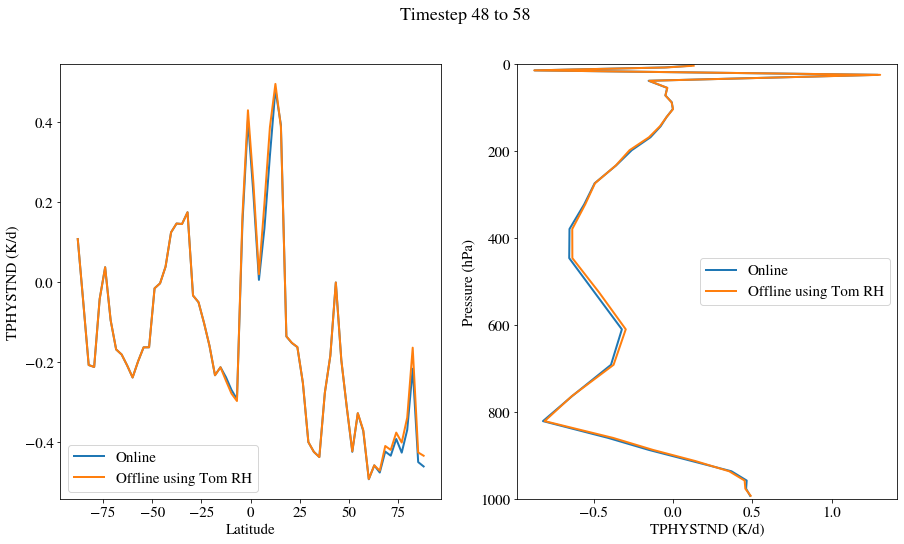

In [98]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
#ax[0].plot(run['lat'],np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('TPHYSTND (K/d)')

ax[1].plot(np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
#ax[1].plot(np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('TPHYSTND (K/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

Text(0.5, 0.98, 'Timestep 48 to 58')

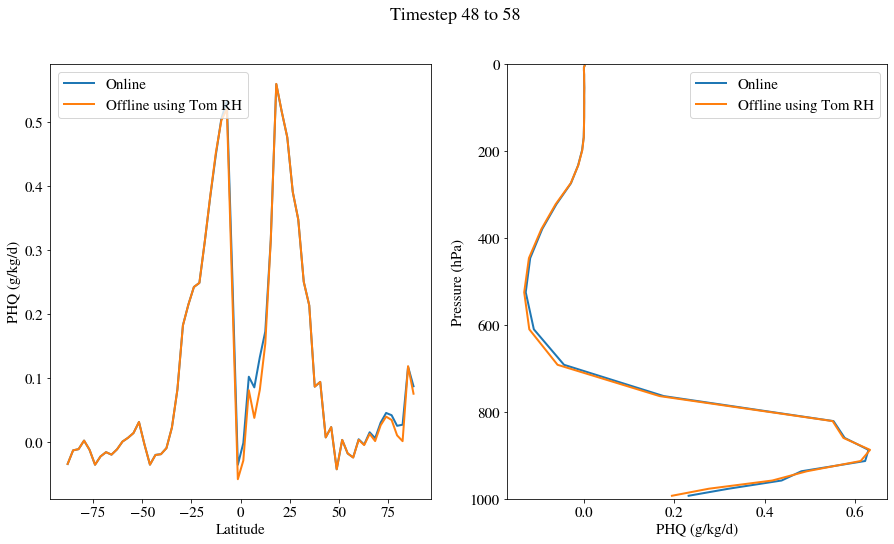

In [99]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
#ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('PHQ (g/kg/d)')

ax[1].plot(np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
#ax[1].plot(np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('PHQ (g/kg/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

Text(0.5, 0.98, 'Timestep 148 to 159')

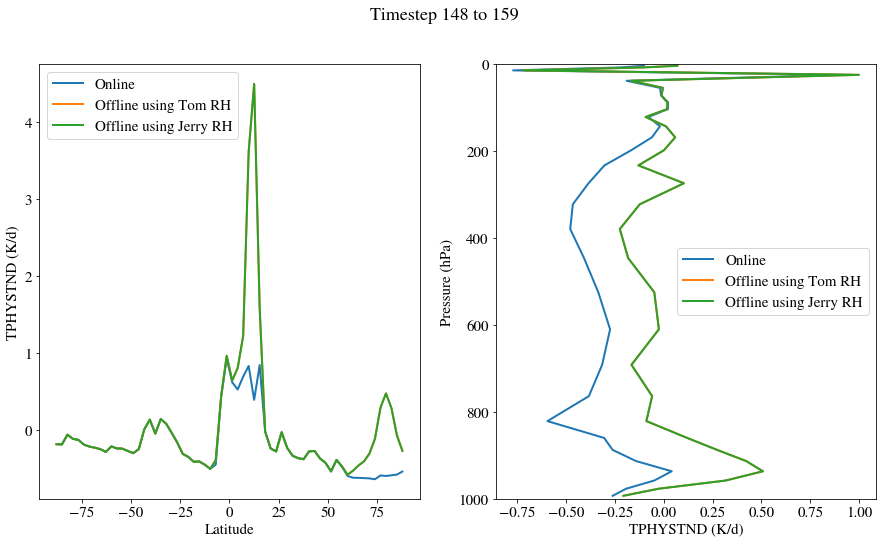

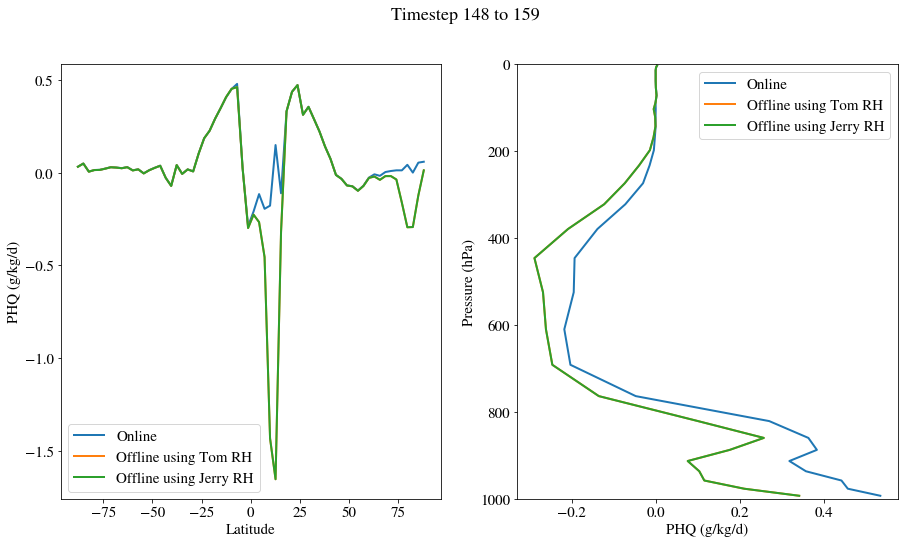

In [315]:
istart = 148
iend = 159

fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
ax[0].plot(run['lat'],np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('TPHYSTND (K/d)')

ax[1].plot(np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
ax[1].plot(np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('TPHYSTND (K/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('PHQ (g/kg/d)')

ax[1].plot(np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
ax[1].plot(np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('PHQ (g/kg/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

Text(0.5, 0.98, 'Timestep 248 to 259')

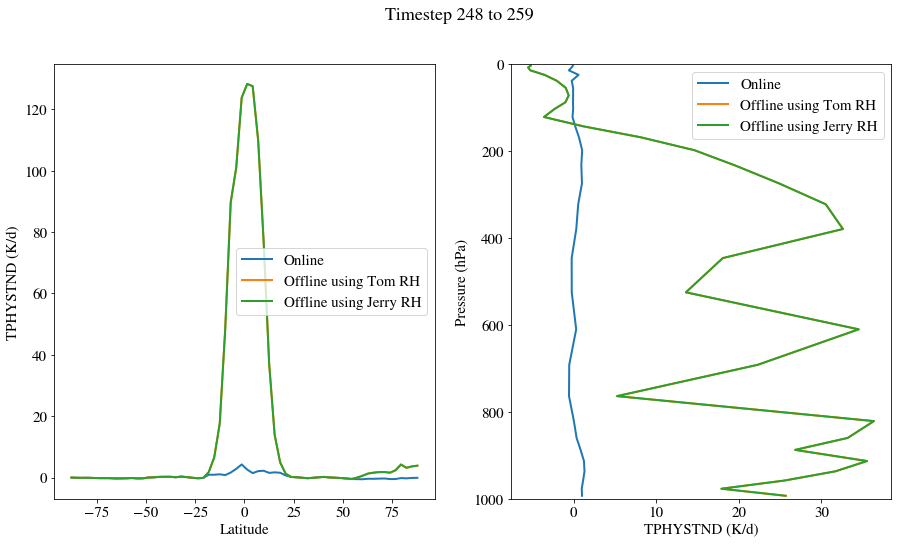

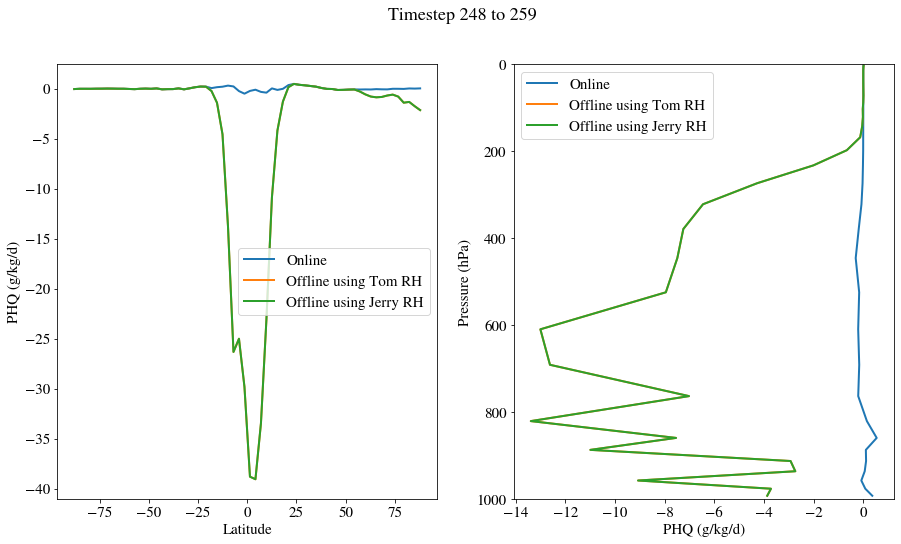

In [316]:
istart = 248
iend = 259

fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
ax[0].plot(run['lat'],np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('TPHYSTND (K/d)')

ax[1].plot(np.mean(24*3600*run['TPHYSTND'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(24*3600*dT_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
ax[1].plot(np.mean(24*3600*dT_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('TPHYSTND (K/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(run['lat'],np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,1,3)),label='Online')
ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Tom RH')
ax[0].plot(run['lat'],np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,1,3)),label='Offline using Jerry RH')
ax[0].legend()
ax[0].set_xlabel('Latitude'); 
ax[0].set_ylabel('PHQ (g/kg/d)')

ax[1].plot(np.mean(1e3*24*3600*run['PHQ'][istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Online')
ax[1].plot(np.mean(1e3*24*3600*dQ_dtom_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Tom RH')
ax[1].plot(np.mean(1e3*24*3600*dQ_dtJ_prd[istart:iend,:,:,:],axis=(0,2,3)),run['lev'],label='Offline using Jerry RH')
ax[1].set_ylim((1000,0))
ax[1].set_xlabel('PHQ (g/kg/d)'); 
ax[1].set_ylabel('Pressure (hPa)')
ax[1].legend()

fig.suptitle('Timestep '+str(istart)+' to '+str(iend))

### Investigate offline instability

In [56]:
TPHYSTND_ref = np.mean(run['TPHYSTND'][:48,:,:,:].values,axis=0)
PHQ_ref = np.mean(run['PHQ'][:48,:,:,:].values,axis=0)
T_ref = np.mean(run['NNTBP'][:48,:,:,:].values,axis=0)
Q_ref = np.mean(run['NNQBP'][:48,:,:,:].values,axis=0)

TPHYSTND_ano = run['TPHYSTND'].values-TPHYSTND_ref
PHQ_ano = run['PHQ'].values-PHQ_ref
T_ano = run['NNTBP'].values-T_ref
Q_ano = run['NNQBP'].values-Q_ref

TPHYSTND_ano_NN = dT_dtom_prd-TPHYSTND_ref
PHQ_ano_NN = dQ_dtom_prd-PHQ_ref

In [59]:
prd_len = run['TPHYSTND'].shape[0]

In [68]:
prd_len

200

In [69]:
dTdt_ano_12hr = np.zeros((prd_len//24,30))
dQdt_ano_12hr = np.zeros((prd_len//24,30))
T_ano_12hr = np.zeros((prd_len//24,30))
Q_ano_12hr = np.zeros((prd_len//24,30))
dTdt_NNano_12hr = np.zeros((prd_len//24,30))
dQdt_NNano_12hr = np.zeros((prd_len//24,30))

In [72]:
for i12hr in range(prd_len//24):
    dTdt_ano_12hr[i12hr,:] = np.mean(TPHYSTND_ano[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))
    dQdt_ano_12hr[i12hr,:] = np.mean(PHQ_ano[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))
    dTdt_NNano_12hr[i12hr,:] = np.mean(TPHYSTND_ano_NN[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))
    dQdt_NNano_12hr[i12hr,:] = np.mean(PHQ_ano_NN[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))
    T_ano_12hr[i12hr,:] = np.mean(T_ano[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))
    Q_ano_12hr[i12hr,:] = np.mean(Q_ano[24*i12hr:24*(i12hr+1),:,:,:],axis=(0,2,3))

In [73]:
lev = run['lev'].values

In [78]:
color = ['red','purple','pink','magenta','orange','darkred','b','k','g','gray','cyan']

Text(0.5, 1.0, 'Q daily-averaged online anomaly')

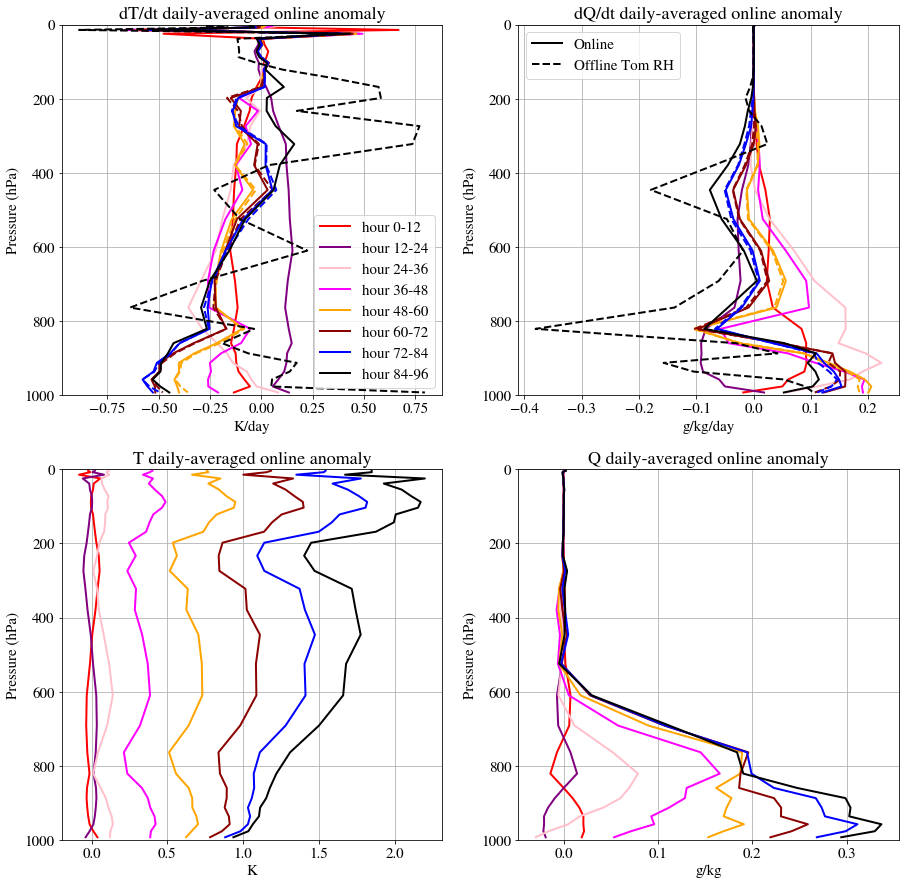

In [87]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for i12hr in range(prd_len//24):
    ax[0,0].plot(24*3600*dTdt_ano_12hr[i12hr,:],lev,label='hour '+str(12*i12hr)+'-'+str(12*(i12hr+1)),color=color[i12hr])
    if i12hr>3: ax[0,0].plot(24*3600*dTdt_NNano_12hr[i12hr,:],lev,linestyle='--',color=color[i12hr])
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for i12hr in range(prd_len//24):
    if i12hr==7: label0 = 'Online'; label1 = 'Offline Tom RH'
    else: label0 = ''; label1 = '';
    ax[0,1].plot(1e3*24*3600*dQdt_ano_12hr[i12hr,:],lev,color=color[i12hr],label=label0)
    if i12hr>3: ax[0,1].plot(1e3*24*3600*dQdt_NNano_12hr[i12hr,:],lev,linestyle='--',color=color[i12hr],label=label1)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
ax[0,1].legend()

for i12hr in range(prd_len//24):
    ax[1,0].plot(T_ano_12hr[i12hr,:],lev,label='day '+str(i12hr)+'-'+str(i12hr+1),color=color[i12hr])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
#ax[1,0].legend()

for i12hr in range(prd_len//24):
    ax[1,1].plot(1e3*Q_ano_12hr[i12hr,:],lev,label='day '+str(i12hr)+'-'+str(i12hr+1),color=color[i12hr])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
#ax[1,1].legend()

## Analysis July 29th 2022

In [60]:
path_model = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/HDF5_DATA/'
path_J01_0 = path_model+'2022_07_25_NN_BF_m4K_BF.h5'
path_J01_1 = path_model+'2022_07_25_NN_BF_CLR_m4K_BF.h5'

path_model2 = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/'
path_L1L2models = [
path_model2+'2022_07_30_NN_BF_m4K_L1_BF.hdf5',                             
path_model2+'2022_07_30_NN_BF_m4K_L1_standard_BF.hdf5',                    
path_model2+'2022_07_30_NN_BF_m4K_L2_BF.hdf5',               
path_model2+'2022_07_30_NN_BF_m4K_L2_standard_BF.hdf5',
path_model2+'2022_07_30_NN_BF_m4K_BF.hdf5'
]
    
path_norm = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/TXT_DATA/'
path_sub = path_norm+'inp_sub_Specificm4K.txt'
path_div = path_norm+'inp_div_Specificm4K.txt'
path_out = path_norm+'out_scale_Specificm4K.txt'

path_data = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
path_input_norm = path_data + '2021_01_24_NORM_O3_small.nc'
path_array = {}
path_array['cold'] = [path_data+'2021_03_18_O3_TRAIN_M4K_shuffle.nc',
                      path_data+'2021_03_18_O3_VALID_M4K.nc',
                      path_data+'2021_03_18_O3_TEST_M4K.nc']
scale_dict = pickle.load(open(path_data+'009_Wm2_scaling.pkl','rb'))

In [8]:
J01_0 = load_model(path_J01_0)
J01_1 = load_model(path_J01_0); J01_1.load_weights(path_J01_1)
### Norm in Jerry's format

DIVT = (pd.read_csv(path_div, sep=" ", header=None).values)[:,0]
SUBT = (pd.read_csv(path_sub, sep=" ", header=None).values)[:,0]
OUTT = (pd.read_csv(path_out, sep=" ", header=None).values)[:,0]

### Norm in Tom's format

def train_gen_rescaling(input_rescaling,path_norm,path_train,scale_dict):
    return DataGeneratorCI(
        data_fn = path_train,
        input_vars = input_rescaling,
        output_vars = ['TPHYSTND','PHQ'],
        norm_fn = path_norm,
        input_transform = ('mean', 'maxrs'),
        output_transform = scale_dict)

train_gen_norm = train_gen_rescaling(['TBP','QBP','PS', 'SOLIN', 'SHFLX', 'LHFLX'],
                                    path_input_norm,path_array['cold'][0],scale_dict)

sub = train_gen_norm.input_transform.sub
div = train_gen_norm.input_transform.div
subQ = sub[30:60]; divQ = div[30:60]
subT = sub[:30]; divT = div[:30]
subPS = sub[60]; divPS = div[60]
subS0 = sub[61]; divS0 = div[61]
subSHF = sub[62]; divSHF = div[62]
subLHF = sub[63]; divLHF = div[63]

In [61]:
ml1l2 = {}

In [62]:
for pl1l2 in path_L1L2models:
    print(pl1l2)
    ml1l2[pl1l2] = load_model(path_J01_0);
    ml1l2[pl1l2].load_weights(pl1l2)

/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L1_BF.hdf5
/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L1_standard_BF.hdf5
/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L2_BF.hdf5
/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L2_standard_BF.hdf5
/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_BF.hdf5


In [21]:
run = J01_0run
model = J01_0
lev = run['lev'].values
prd_len = 48*3
#prd_len = run['NNTBP'].shape[0]

In [22]:
dT_dt_prd = np.zeros((prd_len,30,64,128))
dQ_dt_prd = np.zeros((prd_len,30,64,128))
dT_dtom_prd = np.zeros((prd_len,30,64,128))
dQ_dtom_prd = np.zeros((prd_len,30,64,128))

In [63]:
dT_dt_mod = {}
dQ_dt_mod = {}

In [24]:
for it in range(prd_len):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    T_norm = (T.T-SUBT[:30])/DIVT[:30]
    Q_norm = (Q.T-SUBT[30:60])/DIVT[30:60]
    PS_norm = np.expand_dims((PS.T-SUBT[60])/DIVT[60],axis=2)
    S0_norm = np.expand_dims((S0.T-SUBT[61])/DIVT[61],axis=2)
    SHF_norm = np.expand_dims((SHF.T-SUBT[62])/DIVT[62],axis=2)
    LHF_norm = np.expand_dims((LHF.T-SUBT[63])/DIVT[63],axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dt_prd[it,:,:,:] = np.reshape((oup[:,:30]/OUTT[:30]).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dt_prd[it,:,:,:] = np.reshape((oup[:,30:60]/OUTT[30:60]).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [64]:
for pl1l2 in path_L1L2models:
    dT_dt_mod[pl1l2] = np.zeros((prd_len,30,64,128))
    dQ_dt_mod[pl1l2] = np.zeros((prd_len,30,64,128))
    
    for it in range(prd_len):
    
        print(it,'          ',end='\r')

        T = run['NNTBP'][it,:,:,:].values
        Q = run['NNQBP'][it,:,:,:].values
        PS = run['NNPS'][it,:,:].values
        S0 = run['SOLIN'][it,:,:].values
        SHF = run['NNSHF'][it,:,:].values
        LHF = run['NNLHF'][it,:,:].values

        T_norm = (T.T-SUBT[:30])/DIVT[:30]
        Q_norm = (Q.T-SUBT[30:60])/DIVT[30:60]
        PS_norm = np.expand_dims((PS.T-SUBT[60])/DIVT[60],axis=2)
        S0_norm = np.expand_dims((S0.T-SUBT[61])/DIVT[61],axis=2)
        SHF_norm = np.expand_dims((SHF.T-SUBT[62])/DIVT[62],axis=2)
        LHF_norm = np.expand_dims((LHF.T-SUBT[63])/DIVT[63],axis=2)

        inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
        inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T

        oup = ml1l2[pl1l2].predict_on_batch(inp).numpy()
        dT_dt_mod[pl1l2][it,:,:,:] = np.reshape((oup[:,:30]/OUTT[:30]).T,(30,T_norm.shape[1],T_norm.shape[0]))
        dQ_dt_mod[pl1l2][it,:,:,:] = np.reshape((oup[:,30:60]/OUTT[30:60]).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [96]:
for it in range(prd_len):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    T_norm = (T.T-subT)/divT
    Q_norm = (Q.T-subQ)/divQ
    PS_norm = np.expand_dims((PS.T-subPS)/divPS,axis=2)
    S0_norm = np.expand_dims((S0.T-subS0)/divS0,axis=2)
    SHF_norm = np.expand_dims((SHF.T-subSHF)/divSHF,axis=2)
    LHF_norm = np.expand_dims((LHF.T-subLHF)/divLHF,axis=2)
    
    inp = np.concatenate((Q_norm,T_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dtom_prd[it,:,:,:] = np.reshape((oup[:,:30]/scale_dict['TPHYSTND']).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dtom_prd[it,:,:,:] = np.reshape((oup[:,30:60]/scale_dict['PHQ']).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [38]:
TPHYSTND_ref = np.mean(run['TPHYSTND'][:48,:,:,:].values,axis=0)
PHQ_ref = np.mean(run['PHQ'][:48,:,:,:].values,axis=0)
T_ref = np.mean(run['NNTBP'][:48,:,:,:].values,axis=0)
Q_ref = np.mean(run['NNQBP'][:48,:,:,:].values,axis=0)

In [39]:
TPHYSTND_ano = run['TPHYSTND'].values-TPHYSTND_ref
PHQ_ano = run['PHQ'].values-PHQ_ref
T_ano = run['NNTBP'].values-T_ref
Q_ano = run['NNQBP'].values-Q_ref

In [40]:
TPHYSTND_ano_NN = dT_dt_prd-TPHYSTND_ref
PHQ_ano_NN = dQ_dt_prd-PHQ_ref
# TPHYSTND_ano_NNtom = dT_dtom_prd-TPHYSTND_ref
# PHQ_ano_NNtom = dQ_dtom_prd-PHQ_ref


In [65]:
dT_dt_ano = {}; dQ_dt_ano = {};

In [66]:
for pl1l2 in path_L1L2models:
    dT_dt_ano[pl1l2] = dT_dt_mod[pl1l2]-TPHYSTND_ref
    dQ_dt_ano[pl1l2] = dQ_dt_mod[pl1l2]-PHQ_ref

In [43]:
dTdt_ano_6hr = np.zeros((prd_len//12,30))
dQdt_ano_6hr = np.zeros((prd_len//12,30))
T_ano_6hr = np.zeros((prd_len//12,30))
Q_ano_6hr = np.zeros((prd_len//12,30))
dTdt_NNano_6hr = np.zeros((prd_len//12,30))
dQdt_NNano_6hr = np.zeros((prd_len//12,30))

In [67]:
dTdt_6hr = {}
dQdt_6hr = {}

In [45]:
for i6hr in range(prd_len//12):
    dTdt_ano_6hr[i6hr,:] = np.mean(TPHYSTND_ano[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
    dQdt_ano_6hr[i6hr,:] = np.mean(PHQ_ano[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
#     dTdt_NNano_6hr[i6hr,:] = np.mean(TPHYSTND_ano_NN[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
#     dQdt_NNano_6hr[i6hr,:] = np.mean(PHQ_ano_NN[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
    T_ano_6hr[i6hr,:] = np.mean(T_ano[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
    Q_ano_6hr[i6hr,:] = np.mean(Q_ano[12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))

In [68]:
for pl1l2 in path_L1L2models:
    dTdt_6hr[pl1l2] = np.zeros((prd_len//12,30))
    dQdt_6hr[pl1l2] = np.zeros((prd_len//12,30))
    for i6hr in range(prd_len//12):
        dTdt_6hr[pl1l2][i6hr,:] = np.mean(dT_dt_ano[pl1l2][12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))
        dQdt_6hr[pl1l2][i6hr,:] = np.mean(dQ_dt_ano[pl1l2][12*i6hr:12*(i6hr+1),:,:,:],axis=(0,2,3))

In [62]:
dTdt_ano_week = np.zeros((run['NNTBP'].shape[0]//(48*7),30))
dQdt_ano_week = np.zeros((run['NNTBP'].shape[0]//(48*7),30))
T_ano_week = np.zeros((run['NNTBP'].shape[0]//(48*7),30))
Q_ano_week = np.zeros((run['NNTBP'].shape[0]//(48*7),30))

In [40]:
dTdt_NNano_month = np.zeros((run['NNTBP'].shape[0]//(48*30),30))
dQdt_NNano_month = np.zeros((run['NNTBP'].shape[0]//(48*30),30))

In [41]:
for iweek in range(run['NNTBP'].shape[0]//(48*7)):
    dTdt_ano_week[iweek,:] = np.mean(TPHYSTND_ano[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))
    dQdt_ano_week[iweek,:] = np.mean(PHQ_ano[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))
#     dTdt_NNano_week[iweek,:] = np.mean(TPHYSTND_ano_NN[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))
#     dQdt_NNano_week[iweek,:] = np.mean(PHQ_ano_NN[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))
    T_ano_week[iweek,:] = np.mean(T_ano[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))
    Q_ano_week[iweek,:] = np.mean(Q_ano[48*7*iweek:48*7*(iweek+1),:,:,:],axis=(0,2,3))

Text(0.5, 1.0, 'Q daily-averaged online anomaly')

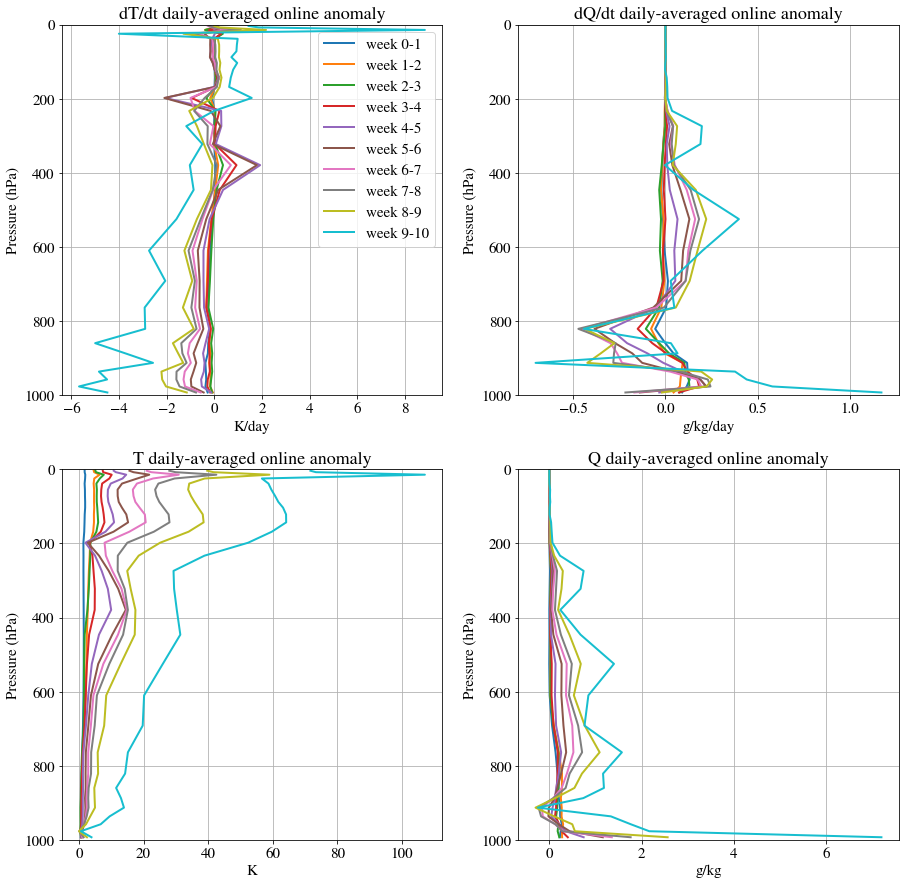

In [42]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for iweek in range(run['NNTBP'].shape[0]//(48*7)):
    ax[0,0].plot(24*3600*dTdt_ano_week[iweek,:],lev,label='week '+str(iweek)+'-'+str(iweek+1))
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for iweek in range(run['NNTBP'].shape[0]//(48*7)):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_week[iweek,:],lev)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for iweek in range(run['NNTBP'].shape[0]//(48*7)):
    ax[1,0].plot(T_ano_week[iweek,:],lev,label='day '+str(iweek)+'-'+str(iweek+1))
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
#ax[1,0].legend()

for iweek in range(run['NNTBP'].shape[0]//(48*7)):
    ax[1,1].plot(1e3*Q_ano_week[iweek,:],lev,label='day '+str(iweek)+'-'+str(iweek+1))
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
#ax[1,1].legend()

In [69]:
color = ['red','purple','pink','magenta','orange','darkred','violet','b','k','g','gray','cyan']

In [70]:
path_L1L2models

['/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L1_BF.hdf5',
 '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L1_standard_BF.hdf5',
 '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L2_BF.hdf5',
 '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L2_standard_BF.hdf5',
 '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_BF.hdf5']

In [79]:
pl1l2 = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/HDF5_DATA/2022_07_30_NN_BF_m4K_L1_standard_BF.hdf5'

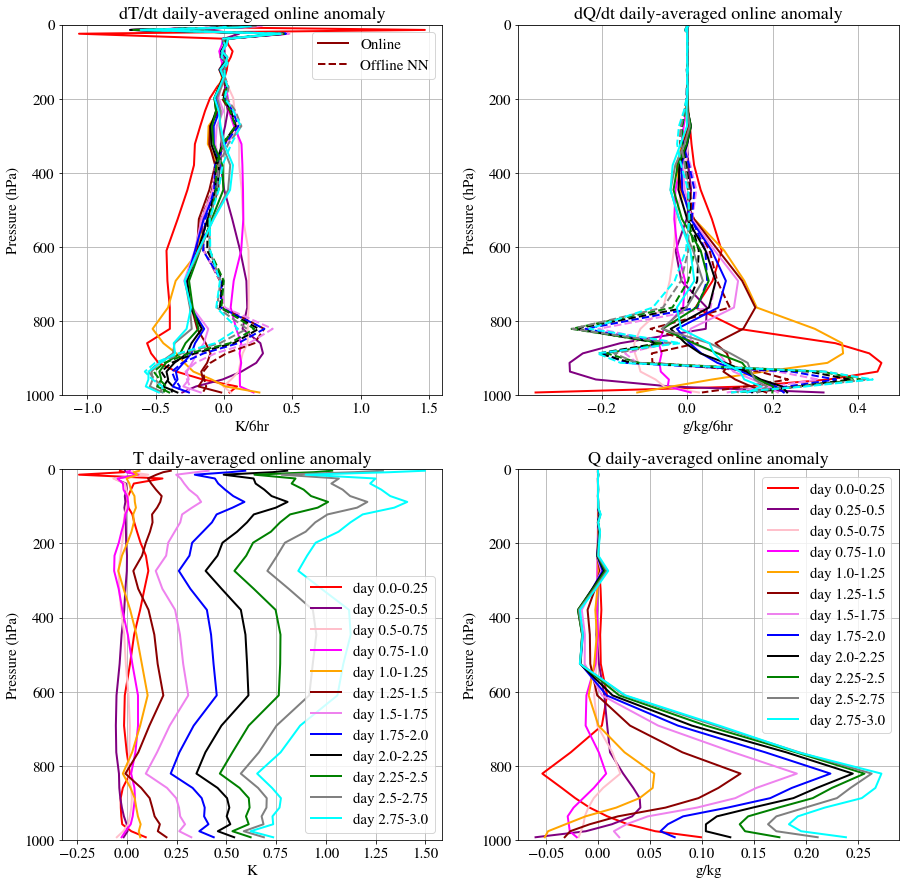

In [80]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for i6hr in range(prd_len//12):
    if i6hr!=5: label0 = ''; labelNN = '';
    else: label0 = 'Online'; labelNN = 'Offline NN'
    ax[0,0].plot(24*3600*dTdt_ano_6hr[i6hr,:],lev,color=color[i6hr],label=label0)
    if i6hr>4: 
        #ax[0,0].plot(24*3600*dTdt_NNano_6hr[i6hr,:],lev,linestyle='--',color=color[i6hr],label=labelNN)
        ax[0,0].plot(24*3600*dTdt_6hr[pl1l2][i6hr,:],lev,linestyle='--',color=color[i6hr],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/6hr')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for i6hr in range(prd_len//12):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_6hr[i6hr,:],lev,color=color[i6hr])
    if i6hr>4: 
        #ax[0,1].plot(1e3*24*3600*dQdt_NNano_6hr[i6hr,:],lev,linestyle='--',color=color[i6hr])
        ax[0,1].plot(1e3*24*3600*dQdt_6hr[pl1l2][i6hr,:],lev,linestyle='--',color=color[i6hr],label=labelNN)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/6hr')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for i6hr in range(prd_len//12):
    ax[1,0].plot(T_ano_6hr[i6hr,:],lev,label='day '+str(i6hr/4)+'-'+str(i6hr/4+1/4),color=color[i6hr])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for i6hr in range(prd_len//12):
    ax[1,1].plot(1e3*Q_ano_6hr[i6hr,:],lev,label='day '+str(i6hr/4)+'-'+str(i6hr/4+1/4),color=color[i6hr])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

Text(0.5, 1.0, 'Q daily-averaged online anomaly')

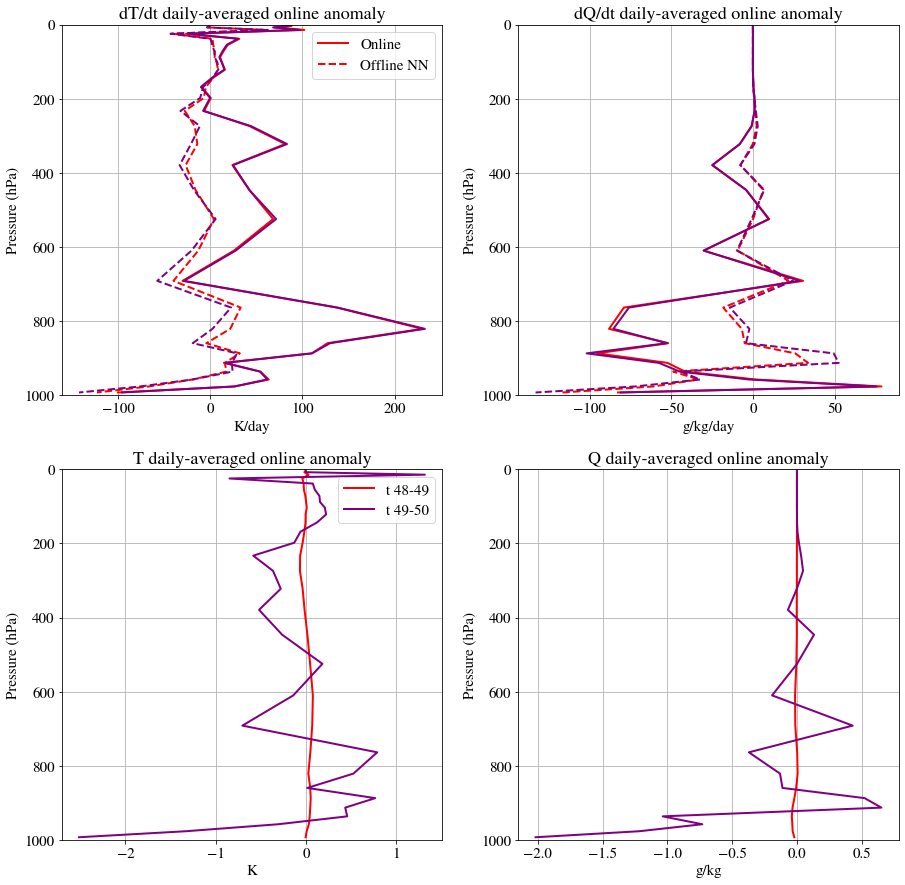

In [214]:
itmin = 48
itmax = 50

fig, ax = plt.subplots(2,2,figsize=(15,15))

for it in np.arange(itmin,itmax):
    if it==itmin: label0 = 'Online'; labelNN = 'Offline NN'
    else: label0 = ''; labelNN = '';
    #ax[0,0].plot(24*3600*TPHYSTND_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for it in np.arange(itmin,itmax):
    #ax[0,1].plot(1e3*24*3600*PHQ_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for it in np.arange(itmin,itmax):
    ax[1,0].plot(T_ano[it,:,:,:].mean(axis=(1,2)),lev,label='t '+str(it)+'-'+str(it+1),color=color[it-itmin])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for it in np.arange(itmin,itmax):
    ax[1,1].plot(1e3*Q_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
#ax[1,1].legend()

In [ ]:
TPHYSTND_ref = np.mean(run['TPHYSTND'][:48,:,:,:].values,axis=0)
PHQ_ref = np.mean(run['PHQ'][:48,:,:,:].values,axis=0)
T_ref = np.mean(run['NNTBP'][:48,:,:,:].values,axis=0)
Q_ref = np.mean(run['NNQBP'][:48,:,:,:].values,axis=0)

TPHYSTND_ano = run['TPHYSTND'].values-TPHYSTND_ref
PHQ_ano = run['PHQ'].values-PHQ_ref
TPHYSTND_ano_NN = dT_dt_prd-TPHYSTND_ref
PHQ_ano_NN = dQ_dt_prd-PHQ_ref
TPHYSTND_ano_NNtom = dT_dtom_prd-TPHYSTND_ref
PHQ_ano_NNtom = dQ_dtom_prd-PHQ_ref
T_ano = run['NNTBP'].values-T_ref
Q_ano = run['NNQBP'].values-Q_ref

dTdt_ano_day = np.zeros((10,30))
dQdt_ano_day = np.zeros((10,30))
dTdt_NNano_day = np.zeros((10,30))
dQdt_NNano_day = np.zeros((10,30))
T_ano_day = np.zeros((10,30))
Q_ano_day = np.zeros((10,30))

for ihours in range(10):
    dTdt_ano_day[ihours,:] = np.mean(TPHYSTND_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dQdt_ano_day[ihours,:] = np.mean(PHQ_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dTdt_NNano_day[ihours,:] = np.mean(TPHYSTND_ano_NN[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dQdt_NNano_day[ihours,:] = np.mean(PHQ_ano_NN[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    T_ano_day[ihours,:] = np.mean(T_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    Q_ano_day[ihours,:] = np.mean(Q_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))

fig, ax = plt.subplots(2,2,figsize=(15,15))

for ihours in range(10):
    ax[0,0].plot(24*3600*dTdt_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for ihours in range(10):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
ax[0,1].legend()

for ihours in range(10):
    ax[1,0].plot(T_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for ihours in range(10):
    ax[1,1].plot(1e3*Q_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

color = ['red','purple','pink','magenta','orange','darkred','violet','b','k','g']

fig, ax = plt.subplots(2,2,figsize=(15,15))

for ihours in range(10):
    if ihours<9: label0 = ''; labelNN = '';
    else: label0 = 'Online'; labelNN = 'Offline NN'
    ax[0,0].plot(24*3600*dTdt_ano_day[ihours,:],lev,color=color[ihours],label=label0)
    if ihours>7: ax[0,0].plot(24*3600*dTdt_NNano_day[ihours,:],lev,linestyle='--',color=color[ihours],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for ihours in range(10):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[ihours,:],lev,color=color[ihours])
    if ihours>7: ax[0,1].plot(1e3*24*3600*dQdt_NNano_day[ihours,:],lev,linestyle='--',color=color[ihours])
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for ihours in range(10):
    ax[1,0].plot(T_ano_day[ihours,:],lev,label='day '+str(ihours/4)+'-'+str(ihours/4+1/4),color=color[ihours])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for ihours in range(10):
    ax[1,1].plot(1e3*Q_ano_day[ihours,:],lev,label='day '+str(ihours/4)+'-'+str(ihours/4+1/4),color=color[ihours])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

itmin = 48
itmax = 50

fig, ax = plt.subplots(2,2,figsize=(15,15))

for it in np.arange(itmin,itmax):
    if it==itmin: label0 = 'Online'; labelNN = 'Offline NN'
    else: label0 = ''; labelNN = '';
    #ax[0,0].plot(24*3600*TPHYSTND_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for it in np.arange(itmin,itmax):
    #ax[0,1].plot(1e3*24*3600*PHQ_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for it in np.arange(itmin,itmax):
    ax[1,0].plot(T_ano[it,:,:,:].mean(axis=(1,2)),lev,label='t '+str(it)+'-'+str(it+1),color=color[it-itmin])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for it in np.arange(itmin,itmax):
    ax[1,1].plot(1e3*Q_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
#ax[1,1].legend()

## Debugging July 28th 2022

### Initialization and path names

In [189]:
dT_dt_prd = np.zeros((60,30,64,128))
dQ_dt_prd = np.zeros((60,30,64,128))
dT_dtom_prd = np.zeros((60,30,64,128))
dQ_dtom_prd = np.zeros((60,30,64,128))

In [74]:
path_model = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/HDF5_DATA/'
path_J01_0 = path_model+'2022_07_25_NN_BF_m4K_BF.h5'
path_J01_1 = path_model+'2022_07_25_NN_BF_CLR_m4K_BF.h5'

In [75]:
path_norm = '/DFS-L/DATA/pritchard/tbeucler/For_Jerry/TXT_DATA/'
path_sub = path_norm+'inp_sub_Specificm4K.txt'
path_div = path_norm+'inp_div_Specificm4K.txt'
path_out = path_norm+'out_scale_Specificm4K.txt'

In [194]:
path_data = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'
path_input_norm = path_data + '2021_01_24_NORM_O3_small.nc'
path_array = {}
path_array['cold'] = [path_data+'2021_03_18_O3_TRAIN_M4K_shuffle.nc',
                      path_data+'2021_03_18_O3_VALID_M4K.nc',
                      path_data+'2021_03_18_O3_TEST_M4K.nc']
scale_dict = pickle.load(open(path_data+'009_Wm2_scaling.pkl','rb'))

### Load models

In [153]:
J01_0 = load_model(path_J01_0)
J01_1 = load_model(path_J01_0); J01_1.load_weights(path_J01_1)

### Norm in Jerry's format

In [154]:
DIVT = (pd.read_csv(path_div, sep=" ", header=None).values)[:,0]
SUBT = (pd.read_csv(path_sub, sep=" ", header=None).values)[:,0]
OUTT = (pd.read_csv(path_out, sep=" ", header=None).values)[:,0]

### Norm in Tom's format

In [197]:
def train_gen_rescaling(input_rescaling,path_norm,path_train,scale_dict):
    return DataGeneratorCI(
        data_fn = path_train,
        input_vars = input_rescaling,
        output_vars = ['TPHYSTND','PHQ'],
        norm_fn = path_norm,
        input_transform = ('mean', 'maxrs'),
        output_transform = scale_dict)

In [198]:
train_gen_norm = train_gen_rescaling(['TBP','QBP','PS', 'SOLIN', 'SHFLX', 'LHFLX'],
                                    path_input_norm,path_array['cold'][0],scale_dict)

In [199]:
sub = train_gen_norm.input_transform.sub
div = train_gen_norm.input_transform.div
subQ = sub[30:60]; divQ = div[30:60]
subT = sub[:30]; divT = div[:30]
subPS = sub[60]; divPS = div[60]
subS0 = sub[61]; divS0 = div[61]
subSHF = sub[62]; divSHF = div[62]
subLHF = sub[63]; divLHF = div[63]

In [221]:
divT-DIVT[:30]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.10542736e-15,  0.00000000e+00,
        7.10542736e-15,  0.00000000e+00,  7.10542736e-15,  7.10542736e-15,
        7.10542736e-15,  0.00000000e+00,  0.00000000e+00,  7.10542736e-15,
        0.00000000e+00,  2.07624494e-02,  7.84281737e-01,  1.24174023e+00,
        1.53071118e+00,  1.47864819e+00])

In [223]:
DIVT[:30]

array([87.63551331, 76.18765259, 65.79351807, 65.45681763, 57.68539429,
       50.41566467, 53.59614563, 54.45565796, 45.3656311 , 41.59051514,
       44.08135986, 37.1541748 , 36.20344543, 35.77377319, 38.14976501,
       42.43537903, 48.12763977, 46.0743103 , 45.03309631, 42.38977051,
       41.0191803 , 38.66893005, 37.63214111, 35.84140015, 34.25683594,
       32.28463745, 31.52111816, 31.06365967, 30.77468872, 30.82675171])

In [222]:
divT

array([87.63551331, 76.18765259, 65.79351807, 65.45681763, 57.68539429,
       50.41566467, 53.59614563, 54.45565796, 45.3656311 , 41.59051514,
       44.08135986, 37.1541748 , 36.20344543, 35.77377319, 38.14976501,
       42.43537903, 48.12763977, 46.0743103 , 45.03309631, 42.38977051,
       41.0191803 , 38.66893005, 37.63214111, 35.84140015, 34.25683594,
       32.3053999 , 32.3053999 , 32.3053999 , 32.3053999 , 32.3053999 ])

### Choose model and run here

In [200]:
run = J01_0run
model = J01_0
lev = run['lev'].values

### Make global predictions

In [201]:
for it in range(run['NNTBP'].shape[0]):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    T_norm = (T.T-SUBT[:30])/DIVT[:30]
    Q_norm = (Q.T-SUBT[30:60])/DIVT[30:60]
    PS_norm = np.expand_dims((PS.T-SUBT[60])/DIVT[60],axis=2)
    S0_norm = np.expand_dims((S0.T-SUBT[61])/DIVT[61],axis=2)
    SHF_norm = np.expand_dims((SHF.T-SUBT[62])/DIVT[62],axis=2)
    LHF_norm = np.expand_dims((LHF.T-SUBT[63])/DIVT[63],axis=2)
    
    inp = np.concatenate((T_norm,Q_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dt_prd[it,:,:,:] = np.reshape((oup[:,:30]/OUTT[:30]).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dt_prd[it,:,:,:] = np.reshape((oup[:,30:60]/OUTT[30:60]).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [205]:
for it in range(run['NNTBP'].shape[0]):
    
    print(it,'          ',end='\r')
    
    T = run['NNTBP'][it,:,:,:].values
    Q = run['NNQBP'][it,:,:,:].values
    PS = run['NNPS'][it,:,:].values
    S0 = run['SOLIN'][it,:,:].values
    SHF = run['NNSHF'][it,:,:].values
    LHF = run['NNLHF'][it,:,:].values
    
    T_norm = (T.T-subT)/divT
    Q_norm = (Q.T-subQ)/divQ
    PS_norm = np.expand_dims((PS.T-subPS)/divPS,axis=2)
    S0_norm = np.expand_dims((S0.T-subS0)/divS0,axis=2)
    SHF_norm = np.expand_dims((SHF.T-subSHF)/divSHF,axis=2)
    LHF_norm = np.expand_dims((LHF.T-subLHF)/divLHF,axis=2)
    
    inp = np.concatenate((Q_norm,T_norm,PS_norm,S0_norm,SHF_norm,LHF_norm),axis=2).T
    inp = np.reshape(inp,(inp.shape[0],inp.shape[1]*inp.shape[2])).T
    
    oup = model.predict_on_batch(inp).numpy()
    dT_dtom_prd[it,:,:,:] = np.reshape((oup[:,:30]/scale_dict['TPHYSTND']).T,(30,T_norm.shape[1],T_norm.shape[0]))
    dQ_dtom_prd[it,:,:,:] = np.reshape((oup[:,30:60]/scale_dict['PHQ']).T,(30,Q_norm.shape[1],Q_norm.shape[0]))

In [157]:
vmin0 = -1e-7
vmax0 = 1e-7
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

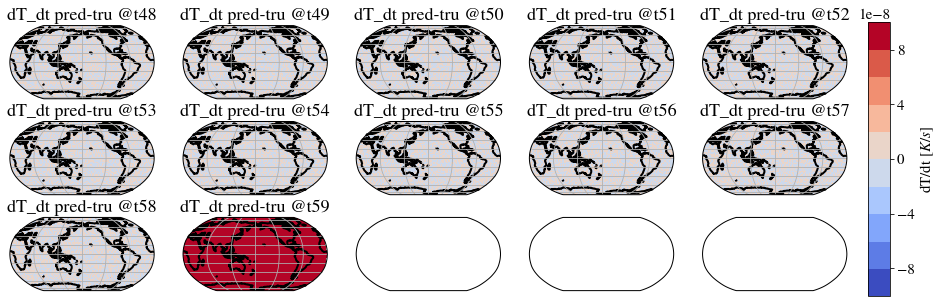

In [158]:
fig, ax = plt.subplots(3,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,5))

for iplot in range(run['NNTBP'].shape[0]-48):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = dT_dt_prd[iplot+48,-1,:,:]-run['TPHYSTND'][iplot+48,-1,:,:].values
    imag = ax[irow,icol].pcolormesh(run['lon'],run['lat'],toplot,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('dT_dt pred-tru @t'+str(iplot+48),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="dT/dt "+r'$\left[K/s\right]$', cax=cbar_ax)

In [159]:
vmin0 = -1e-5
vmax0 = 1e-5
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
cmap = plb.cm.coolwarm
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(vmin0, vmax0, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

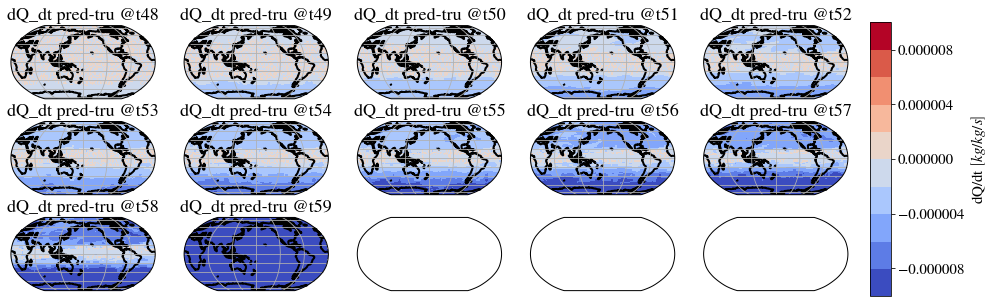

In [160]:
fig, ax = plt.subplots(3,5,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},
                       figsize=(15,5))

for iplot in range(run['NNTBP'].shape[0]-48):
    #toplot = Refrun['NNTBP'][iplot,-1,:,:].values
    icol = iplot%5
    irow = int(np.floor(iplot/5))
    toplot = dQ_dt_prd[iplot+48,-1,:,:]-run['PHQ'][iplot+48,-1,:,:].values
    imag = ax[irow,icol].pcolormesh(run['lon'],run['lat'],toplot,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm)
    ax[irow,icol].gridlines()
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title('dQ_dt pred-tru @t'+str(iplot+48),loc='center')
    
    # Colorbar
    if iplot==0:
        cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
        fig.colorbar(imag, label="dQ/dt "+r'$\left[kg/kg/s\right]$', cax=cbar_ax)

In [161]:
TPHYSTND_ref = np.mean(run['TPHYSTND'][:48,:,:,:].values,axis=0)
PHQ_ref = np.mean(run['PHQ'][:48,:,:,:].values,axis=0)
T_ref = np.mean(run['NNTBP'][:48,:,:,:].values,axis=0)
Q_ref = np.mean(run['NNQBP'][:48,:,:,:].values,axis=0)

In [211]:
TPHYSTND_ano = run['TPHYSTND'].values-TPHYSTND_ref
PHQ_ano = run['PHQ'].values-PHQ_ref
TPHYSTND_ano_NN = dT_dt_prd-TPHYSTND_ref
PHQ_ano_NN = dQ_dt_prd-PHQ_ref
TPHYSTND_ano_NNtom = dT_dtom_prd-TPHYSTND_ref
PHQ_ano_NNtom = dQ_dtom_prd-PHQ_ref
T_ano = run['NNTBP'].values-T_ref
Q_ano = run['NNQBP'].values-Q_ref

In [163]:
dTdt_ano_day = np.zeros((10,30))
dQdt_ano_day = np.zeros((10,30))
dTdt_NNano_day = np.zeros((10,30))
dQdt_NNano_day = np.zeros((10,30))
T_ano_day = np.zeros((10,30))
Q_ano_day = np.zeros((10,30))

In [164]:
for ihours in range(10):
    dTdt_ano_day[ihours,:] = np.mean(TPHYSTND_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dQdt_ano_day[ihours,:] = np.mean(PHQ_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dTdt_NNano_day[ihours,:] = np.mean(TPHYSTND_ano_NN[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    dQdt_NNano_day[ihours,:] = np.mean(PHQ_ano_NN[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    T_ano_day[ihours,:] = np.mean(T_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))
    Q_ano_day[ihours,:] = np.mean(Q_ano[6*ihours:6*(ihours+1),:,:,:],axis=(0,2,3))

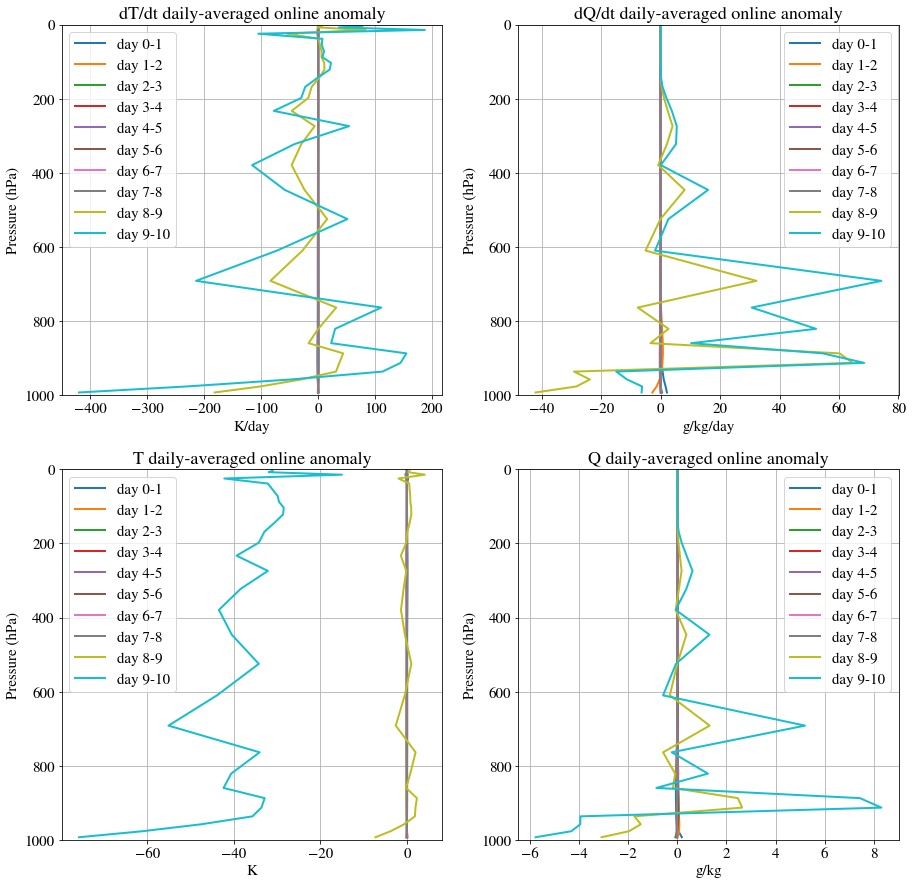

In [165]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for ihours in range(10):
    ax[0,0].plot(24*3600*dTdt_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for ihours in range(10):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
ax[0,1].legend()

for ihours in range(10):
    ax[1,0].plot(T_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for ihours in range(10):
    ax[1,1].plot(1e3*Q_ano_day[ihours,:],lev,label='day '+str(ihours)+'-'+str(ihours+1))
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

In [166]:
color = ['red','purple','pink','magenta','orange','darkred','violet','b','k','g']

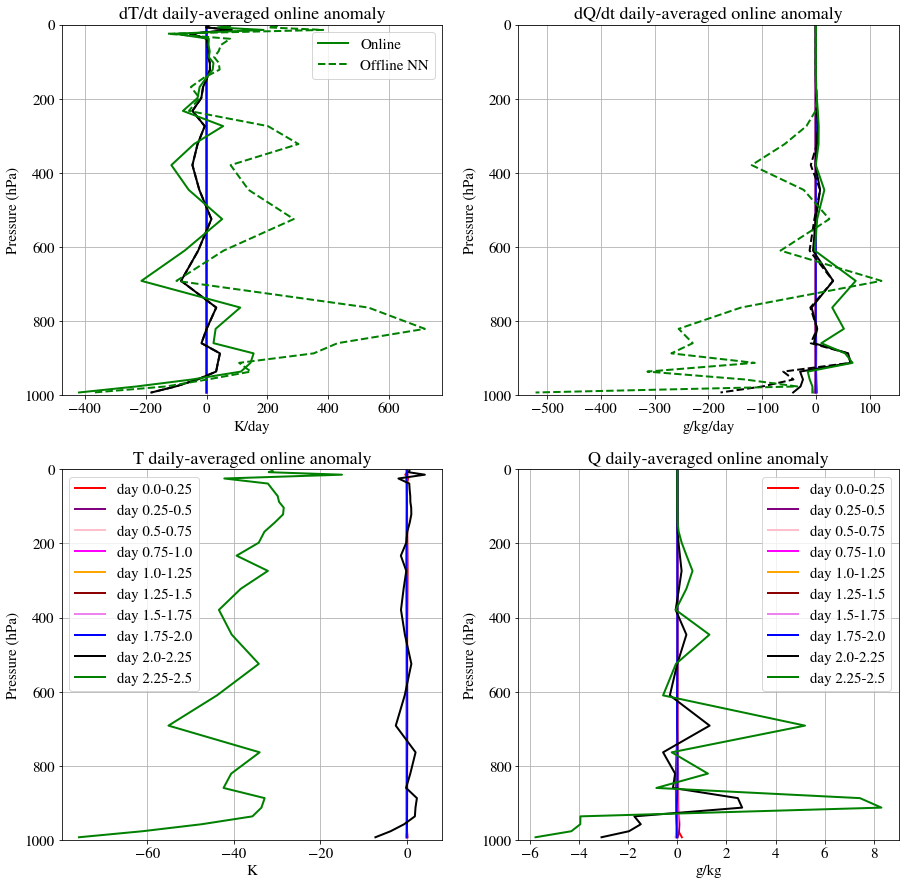

In [167]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

for ihours in range(10):
    if ihours<9: label0 = ''; labelNN = '';
    else: label0 = 'Online'; labelNN = 'Offline NN'
    ax[0,0].plot(24*3600*dTdt_ano_day[ihours,:],lev,color=color[ihours],label=label0)
    if ihours>7: ax[0,0].plot(24*3600*dTdt_NNano_day[ihours,:],lev,linestyle='--',color=color[ihours],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for ihours in range(10):
    ax[0,1].plot(1e3*24*3600*dQdt_ano_day[ihours,:],lev,color=color[ihours])
    if ihours>7: ax[0,1].plot(1e3*24*3600*dQdt_NNano_day[ihours,:],lev,linestyle='--',color=color[ihours])
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for ihours in range(10):
    ax[1,0].plot(T_ano_day[ihours,:],lev,label='day '+str(ihours/4)+'-'+str(ihours/4+1/4),color=color[ihours])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for ihours in range(10):
    ax[1,1].plot(1e3*Q_ano_day[ihours,:],lev,label='day '+str(ihours/4)+'-'+str(ihours/4+1/4),color=color[ihours])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
ax[1,1].legend()

Text(0.5, 1.0, 'Q daily-averaged online anomaly')

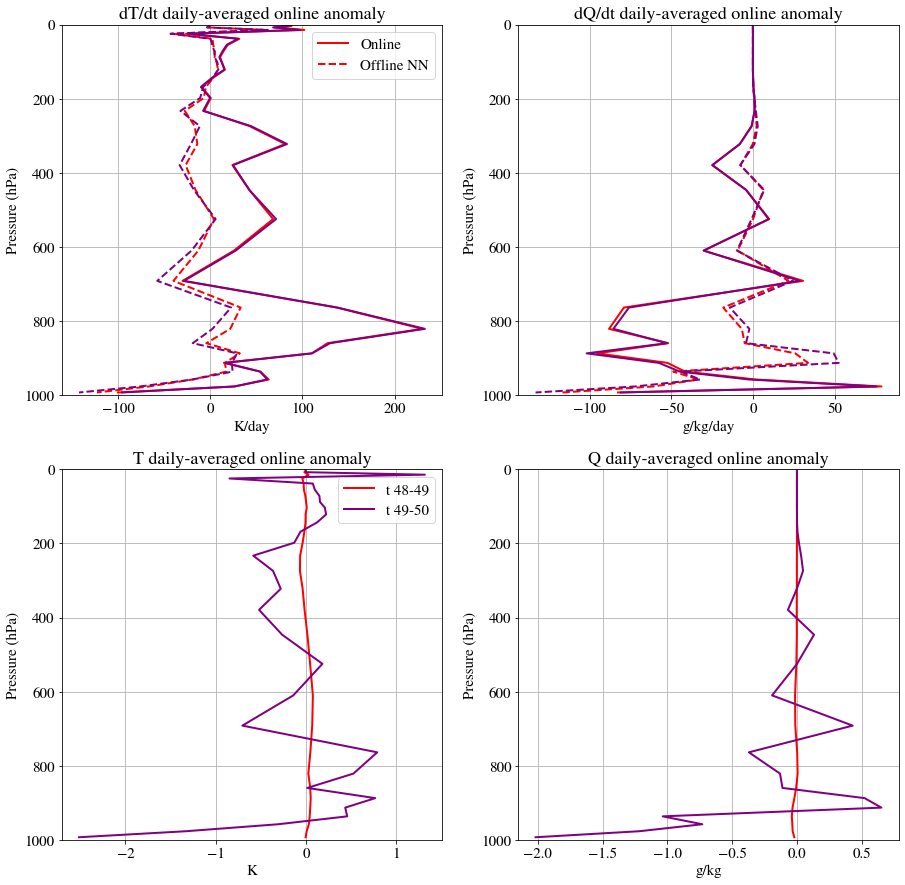

In [214]:
itmin = 48
itmax = 50

fig, ax = plt.subplots(2,2,figsize=(15,15))

for it in np.arange(itmin,itmax):
    if it==itmin: label0 = 'Online'; labelNN = 'Offline NN'
    else: label0 = ''; labelNN = '';
    #ax[0,0].plot(24*3600*TPHYSTND_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,0].plot(24*3600*TPHYSTND_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,0].set_ylim((1000,0))
ax[0,0].grid()
ax[0,0].set_xlabel('K/day')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].set_title('dT/dt daily-averaged online anomaly')
ax[0,0].legend()

for it in np.arange(itmin,itmax):
    #ax[0,1].plot(1e3*24*3600*PHQ_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NNtom[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin],label=label0)
    ax[0,1].plot(1e3*24*3600*PHQ_ano_NN[it,:,:,:].mean(axis=(1,2)),lev,linestyle='--',color=color[it-itmin],label=labelNN)
ax[0,1].set_ylim((1000,0))
ax[0,1].grid()
ax[0,1].set_xlabel('g/kg/day')
ax[0,1].set_ylabel('Pressure (hPa)')
ax[0,1].set_title('dQ/dt daily-averaged online anomaly')
#ax[0,1].legend()

for it in np.arange(itmin,itmax):
    ax[1,0].plot(T_ano[it,:,:,:].mean(axis=(1,2)),lev,label='t '+str(it)+'-'+str(it+1),color=color[it-itmin])
ax[1,0].set_ylim((1000,0))
ax[1,0].grid()
ax[1,0].set_xlabel('K')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].set_title('T daily-averaged online anomaly')
ax[1,0].legend()

for it in np.arange(itmin,itmax):
    ax[1,1].plot(1e3*Q_ano[it,:,:,:].mean(axis=(1,2)),lev,color=color[it-itmin])
ax[1,1].set_ylim((1000,0))
ax[1,1].grid()
ax[1,1].set_xlabel('g/kg')
ax[1,1].set_ylabel('Pressure (hPa)')
ax[1,1].set_title('Q daily-averaged online anomaly')
#ax[1,1].legend()